In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
df = pd.read_csv('arquivos\dadosalunos-limpo.csv')

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\1396285713.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('arquivos\dadosalunos-limpo.csv')


In [193]:
colunas_selecionadas = ['CD_ALUNO',
                      'CD_CURSO',
                      'CD_TURNO',
                      'DH_MATRICULA',
                      'DH_SITUACAO',
                      'DT_ANO_INGRES',
                      'DT_NASC_ALUNO',
                      'LT_ESTADO_CIVIL',
                      'LT_RACA',
                      'F_NU_SEMESTRE2_VEST',
                      'TP_INGRES_CURSO',
                      'SG_SEXO_ALUNO',
                      'F_NM_PAIS_NASC',
                      'F_SG_UF_NASC_ALUNO',
                      'F_SG_UF_FERIAS',
                      'BOOL_TRANCADO',
                      'BOOL_ST_ALUNO',
                      'MULTI_ST_ALUNO',
                      'BOOL_DEFIC_INEP',
                      'F_TP_ESCOLA',
                      'F_TP_OPCAO_COTAS',
                      'BOOL_COTAS',
                      'IDADE_MATRICULA',
                      'ANO_NASCIMENTO',
                      'MESES_ATE_ULTIMA_SITUACAO',
                      'LOCAL_FERIAS',
                      'LOCAL_NASC',
                      'NM_CURSO',
                      'TP_HABILITACAO',
                      'SG_CENTRO',
                      'NM_CAMPUS',
                      'MAX_ANOS',
                      'GERACAO_COMPLETA',
                      'NUMERO_GERACAO',
                      'BOOL_SEDE']

df_selecionado = df[colunas_selecionadas].copy()

In [194]:
df_selecionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66820 entries, 0 to 66819
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CD_ALUNO                   66820 non-null  int64  
 1   CD_CURSO                   66820 non-null  int64  
 2   CD_TURNO                   66820 non-null  object 
 3   DH_MATRICULA               66820 non-null  object 
 4   DH_SITUACAO                66820 non-null  object 
 5   DT_ANO_INGRES              66820 non-null  int64  
 6   DT_NASC_ALUNO              66820 non-null  object 
 7   LT_ESTADO_CIVIL            66820 non-null  float64
 8   LT_RACA                    66820 non-null  int64  
 9   F_NU_SEMESTRE2_VEST        66820 non-null  object 
 10  TP_INGRES_CURSO            66820 non-null  int64  
 11  SG_SEXO_ALUNO              66820 non-null  object 
 12  F_NM_PAIS_NASC             66820 non-null  object 
 13  F_SG_UF_NASC_ALUNO         66820 non-null  obj

### Juntando vagas remanescentes

In [195]:
df_selecionado['FORMA_INGRESSO'] = df_selecionado['F_NU_SEMESTRE2_VEST'].copy().replace({'E': 'R', 'G':'R'})

In [196]:
df_selecionado['FORMA_INGRESSO'].unique()

array(['I', 'V', 'T', 'P', 'S', 'A', 'C', 'R'], dtype=object)

### Alteração nos tipos das colunas

In [197]:
df_selecionado['CD_TURNO'] = df_selecionado['CD_TURNO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['LT_ESTADO_CIVIL'] = df_selecionado['LT_ESTADO_CIVIL'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['LT_RACA'] = df_selecionado['LT_RACA'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['F_NU_SEMESTRE2_VEST'] = df_selecionado['F_NU_SEMESTRE2_VEST'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['FORMA_INGRESSO'] = df_selecionado['FORMA_INGRESSO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['TP_INGRES_CURSO'] = df_selecionado['TP_INGRES_CURSO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['SG_SEXO_ALUNO'] = df_selecionado['SG_SEXO_ALUNO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['BOOL_TRANCADO'] = df_selecionado['BOOL_TRANCADO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['BOOL_ST_ALUNO'] = df_selecionado['BOOL_ST_ALUNO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['MULTI_ST_ALUNO'] = df_selecionado['MULTI_ST_ALUNO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['BOOL_DEFIC_INEP'] = df_selecionado['BOOL_DEFIC_INEP'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['F_TP_ESCOLA'] = df_selecionado['F_TP_ESCOLA'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['F_TP_OPCAO_COTAS'] = df_selecionado['F_TP_OPCAO_COTAS'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['BOOL_COTAS'] = df_selecionado['BOOL_COTAS'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['IDADE_MATRICULA'] = df_selecionado['IDADE_MATRICULA'].astype(dtype='int64')
df_selecionado['MESES_ATE_ULTIMA_SITUACAO'] = df_selecionado['MESES_ATE_ULTIMA_SITUACAO'].astype(dtype='int64')
df_selecionado['LOCAL_FERIAS'] = df_selecionado['LOCAL_FERIAS'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['LOCAL_NASC'] = df_selecionado['LOCAL_NASC'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['LOCAL_NASC'] = df_selecionado['LOCAL_NASC'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['TP_HABILITACAO'] = df_selecionado['TP_HABILITACAO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['SG_CENTRO'] = df_selecionado['SG_CENTRO'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['NM_CAMPUS'] = df_selecionado['NM_CAMPUS'].astype(dtype=pd.CategoricalDtype(ordered=True))
df_selecionado['GERACAO_COMPLETA'] = df_selecionado['GERACAO_COMPLETA'].astype(dtype='bool')
df_selecionado['NUMERO_GERACAO'] = df_selecionado['NUMERO_GERACAO'].astype(dtype='int64')

In [198]:
df_selecionado['SG_CENTRO'].cat.categories

Index(['CCA', 'CCB', 'CCE', 'CCH', 'CCS', 'CSA', 'CTC'], dtype='object')

In [199]:
df_selecionado['CD_TURNO'] = df_selecionado['CD_TURNO'].cat.rename_categories({'I':'INTEGRAL', 
                                                                               'M':'MATUTINO', 
                                                                               'N':'NOTURNO', 
                                                                               'V':'VESPERTINO', 
                                                                               'W':'VESPERTINO/NOTURNO', 
                                                                               'Y':'MANHA/TARDE/NOITE'})

df_selecionado['LT_ESTADO_CIVIL'] = df_selecionado['LT_ESTADO_CIVIL'].cat.rename_categories({0.0: 'NAO INFORMADO', 
                                                                                             1.0:"SOLTEIRO", 
                                                                                             2.0:"CASADO", 
                                                                                             3.0:"SEPARADO", 
                                                                                             4.0:"DIVORCIADO", 
                                                                                             5.0:"VIUVO", 
                                                                                             6.0:"OUTROS"})

df_selecionado['LT_RACA'] = df_selecionado['LT_RACA'].cat.rename_categories({0: "NAO DECLARADA", 
                                                                             1: "AMARELO", 
                                                                             2: "BRANCO", 
                                                                             3: "INDIGENA", 
                                                                             4: "NEGRO", 
                                                                             5: "PARDO/MULATO"})

df_selecionado['F_NU_SEMESTRE2_VEST'] = df_selecionado['F_NU_SEMESTRE2_VEST'].cat.rename_categories({
    "I": "Vestibular de Inverno",
    "V": "Vestibular de Verao",
    "A": "PAS",
    "R": "Vagas Remanescentes Vestibular",
    "E": "Vagas Remanescentes ENEM",
    "G": "Vagas Remanescentes  Refugiados / Imigrantes em Vulnerabilidade",
    "S": "SiSU",
    "C": "Conveino Cultural",
    "P": "Portador de Diploma",
    "T": "Transferencia"})

df_selecionado['FORMA_INGRESSO'] = df_selecionado['FORMA_INGRESSO'].cat.rename_categories({
    "I": "Vestibular de Inverno",
    "V": "Vestibular de Verao",
    "A": "PAS",
    "R": "Vagas Remanescentes",
    "S": "SiSU",
    "C": "Conveino Cultural",
    "P": "Portador de Diploma",
    "T": "Transferencia"})

df_selecionado['SG_SEXO_ALUNO'] = df_selecionado['SG_SEXO_ALUNO'].cat.rename_categories({"F": "Feminino", "M": "Masculino"})

df_selecionado['BOOL_TRANCADO'] = df_selecionado['BOOL_TRANCADO'].cat.rename_categories({False: "NAO TRANCADO", True: "TRANCADO"})

df_selecionado['BOOL_ST_ALUNO'] = df_selecionado['BOOL_ST_ALUNO'].cat.rename_categories({False: "NAO EVADIDO", True: "EVADIDO"}).cat.reorder_categories(['EVADIDO', 'NAO EVADIDO'], ordered=True)

df_selecionado['BOOL_DEFIC_INEP'] = df_selecionado['BOOL_DEFIC_INEP'].cat.rename_categories({False: "Não Portador de Deficiência", True: "Portador de Deficiência"})

df_selecionado['F_TP_ESCOLA'] = df_selecionado['F_TP_ESCOLA'].cat.rename_categories({
    "EX": "Exterior",
    "G": "Municipal/Estadual/Federal",
    "GI": "Escola Pública Integralmente",
    "GP": "Escola Pública Parcialmente",
    "P": "Escola Privada Integralmente",
    "SG": "Supletivo Público",
    "SP": "Supletivo Particular"
})

df_selecionado['F_TP_OPCAO_COTAS'] = df_selecionado['F_TP_OPCAO_COTAS'].cat.rename_categories({
    "N": "Universal",
    "S": "Cotas Sociais",
    "O": "Cotas Sociais para Negros",
    "G": "Cotas para Negros",
    "F": "Cotas para PcD",
})

df_selecionado['BOOL_COTAS'] = df_selecionado['BOOL_COTAS'].cat.rename_categories({False: "Não Cotista", True: "Cotista"})

df_selecionado['LOCAL_FERIAS'] = df_selecionado['LOCAL_FERIAS'].cat.rename_categories({
    1.0: "Na cidade do campus",
    2.0: "Outras cidades do Paraná",
    3.0: "Estado de São Paulo",
    4.0: "Outros estados"
})

df_selecionado['LOCAL_NASC'] = df_selecionado['LOCAL_NASC'].cat.rename_categories({
    1.0: "Na cidade do campus",
    2.0: "Outras cidades do Paraná",
    3.0: "Estado de São Paulo",
    4.0: "Outros estados",
    5.0: "Exterior"
})

df_selecionado['SG_CENTRO'] = df_selecionado['SG_CENTRO'].cat.rename_categories(
    {'CCH  ': 'CCH', 
    'CCE  ': 'CCE', 
    'CSA  ': 'CSA', 
    'CTC  ': 'CTC', 
    'CCS  ': 'CCS', 
    'CCA  ': 'CCA', 
    'CCB  ': 'CCB'}
)


In [200]:
df_selecionado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66820 entries, 0 to 66819
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   CD_ALUNO                   66820 non-null  int64   
 1   CD_CURSO                   66820 non-null  int64   
 2   CD_TURNO                   66820 non-null  category
 3   DH_MATRICULA               66820 non-null  object  
 4   DH_SITUACAO                66820 non-null  object  
 5   DT_ANO_INGRES              66820 non-null  int64   
 6   DT_NASC_ALUNO              66820 non-null  object  
 7   LT_ESTADO_CIVIL            66820 non-null  category
 8   LT_RACA                    66820 non-null  category
 9   F_NU_SEMESTRE2_VEST        66820 non-null  category
 10  TP_INGRES_CURSO            66820 non-null  category
 11  SG_SEXO_ALUNO              66820 non-null  category
 12  F_NM_PAIS_NASC             66820 non-null  object  
 13  F_SG_UF_NASC_ALUNO         6682

In [201]:
# df_selecionado.to_csv('arquivos/dadosalunos-vis.csv', index=False)
# df_selecionado.to_excel('arquivos/dadosalunos-vis.xlsx', index=False)

### Detalhamento df_selecionado

In [12]:
df_selecionado.shape[0]

66820

# Visualizações

In [13]:
sns.set_theme(style='darkgrid', rc={'figure.dpi': 147},              
              font_scale=0.7)
sns.set_color_codes("pastel")

In [14]:
print(sns.color_palette().as_hex())

['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#937860', '#da8bc3', '#8c8c8c', '#ccb974', '#64b5cd']


In [15]:
# df.hist(figsize=(15, 15))

In [16]:
df_evadidos = df_selecionado[df_selecionado['BOOL_ST_ALUNO'] == 'EVADIDO']

### Funções

In [17]:
def get_ano_ultima_geracao(df: pd.DataFrame):
    return int(df[df['NUMERO_GERACAO'] == df['NUMERO_GERACAO'].max()]['DT_ANO_INGRES'].unique()[0])

In [18]:
def get_df_geracoes_completas(df: pd.DataFrame):
    return df[df['GERACAO_COMPLETA'] == True]

def get_df_geracoes_incompletas(df: pd.DataFrame):
    return df[df['GERACAO_COMPLETA'] == False]

def get_df_sem_matriculados(df: pd.DataFrame):
    return df[df['MULTI_ST_ALUNO'] != 'MATRICULADO']

def get_df_cancelados(df: pd.DataFrame):
    return df[df['MULTI_ST_ALUNO'] == 'CANCELAMENTO']

def get_df_evadidos(df: pd.DataFrame):
    return df[df['BOOL_ST_ALUNO'] == 'EVADIDO']

In [19]:
def get_pct_evasao(df: pd.DataFrame):
    return (df['BOOL_ST_ALUNO'].value_counts(normalize=True), 
            get_df_geracoes_completas(df)['BOOL_ST_ALUNO'].value_counts(normalize=True), 
            get_df_geracoes_incompletas(df)['BOOL_ST_ALUNO'].value_counts(normalize=True))

def get_pct_situacao_multiclasse(df: pd.DataFrame):
    return (df['MULTI_ST_ALUNO'].value_counts(normalize=True), 
            get_df_geracoes_completas(df)['MULTI_ST_ALUNO'].value_counts(normalize=True), 
            get_df_geracoes_incompletas(df)['MULTI_ST_ALUNO'].value_counts(normalize=True))

In [20]:
def vis_evadidos_x_nao_evadidos(df: pd.DataFrame):
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))

    count_bool_st = sns.countplot(data=df, x='BOOL_ST_ALUNO', ax=ax[0], width=0.5)
    count_bool_st.bar_label(count_bool_st.containers[0], fontsize=8)
    ax[0].set_title('Total')
    y_min, y_max = ax[0].get_ylim()
    ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)

    count_bool_st = sns.countplot(data=get_df_geracoes_completas(df), x='BOOL_ST_ALUNO', ax=ax[1], width=0.5)
    count_bool_st.bar_label(count_bool_st.containers[0], fontsize=8)
    ax[1].set_title('Gerações Completas')
    ax[1].set_ylim(y_min, y_max)
    ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)


    count_bool_st = sns.countplot(data=get_df_geracoes_incompletas(df), x='BOOL_ST_ALUNO', ax=ax[2], width=0.5)
    count_bool_st.bar_label(count_bool_st.containers[0], fontsize=8)
    ax[2].set_title('Gerações Incompletas')
    ax[2].set_ylim(y_min, y_max)
    ax[2].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)

    plt.tight_layout()


def vis_filtro_evadidos_x_nao_evadidos(df: pd.DataFrame, filtro: str, overlap:bool=False, figsize:tuple[int, int]=(14, 4)):
    fig, ax = plt.subplots(1, 3, figsize=figsize)

    count_bool_st = sns.countplot(data=df, x=filtro, hue='BOOL_ST_ALUNO', ax=ax[0])
    for container in count_bool_st.containers:
        count_bool_st.bar_label(container, fontsize=8)
    ax[0].set_title('Total')
    y_min, y_max = ax[0].get_ylim()
    ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)

    count_bool_st = sns.countplot(data=get_df_geracoes_completas(df), x=filtro, hue='BOOL_ST_ALUNO', ax=ax[1])
    for container in count_bool_st.containers:
        count_bool_st.bar_label(container, fontsize=8)
    ax[1].set_title('Gerações Completas')
    ax[1].set_ylim(y_min, y_max)
    
    ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)

    count_bool_st = sns.countplot(data=get_df_geracoes_incompletas(df), x=filtro, hue='BOOL_ST_ALUNO', ax=ax[2])
    for container in count_bool_st.containers:
        count_bool_st.bar_label(container, fontsize=8)
    ax[2].set_title('Gerações Incompletas')
    ax[2].set_ylim(y_min, y_max)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)

    if overlap:
        for grafico in ax:
            grafico.tick_params(axis='x', rotation=45)
            grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')

    plt.tight_layout()

In [21]:
def vis_situacao_multiclasse(df: pd.DataFrame):
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))

    count_multi_st = sns.countplot(data=df, x='MULTI_ST_ALUNO', ax=ax[0])
    count_multi_st.bar_label(count_multi_st.containers[0], fontsize=8)
    ax[0].set_title('Total')
    y_min, y_max = ax[0].get_ylim()
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')

    count_multi_st = sns.countplot(data=get_df_geracoes_completas(df), x='MULTI_ST_ALUNO', ax=ax[1])
    count_multi_st.bar_label(count_multi_st.containers[0], fontsize=8)
    ax[1].set_title('Gerações Completas')
    ax[1].set_ylim(y_min, y_max)
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')

    count_multi_st = sns.countplot(data=get_df_geracoes_incompletas(df), x='MULTI_ST_ALUNO', ax=ax[2])
    count_multi_st.bar_label(count_multi_st.containers[0], fontsize=8)
    ax[2].set_title('Gerações Incompletas')
    ax[2].set_ylim(y_min, y_max)
    ax[2].tick_params(axis='x', rotation=45)
    ax[2].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')

    plt.tight_layout()

def vis_filtro_situacao_multiclasse(df: pd.DataFrame, filtro: str, overlap:bool=False):
    fig, ax = plt.subplots(1, 3, figsize=(14, 4))

    count_bool_st = sns.countplot(data=df, x=filtro, hue='MULTI_ST_ALUNO', ax=ax[0])
    for container in count_bool_st.containers:
        count_bool_st.bar_label(container, fontsize=8)
    ax[0].set_title('Total')
    y_min, y_max = ax[0].get_ylim()

    count_bool_st = sns.countplot(data=get_df_geracoes_completas(df), x=filtro, hue='MULTI_ST_ALUNO', ax=ax[1])
    for container in count_bool_st.containers:
        count_bool_st.bar_label(container, fontsize=8)
    ax[1].set_title('Gerações Completas')
    ax[1].set_ylim(y_min, y_max)

    count_bool_st = sns.countplot(data=get_df_geracoes_incompletas(df), x=filtro, hue='MULTI_ST_ALUNO', ax=ax[2])
    for container in count_bool_st.containers:
        count_bool_st.bar_label(container, fontsize=8)
    ax[2].set_title('Gerações Incompletas')
    ax[2].set_ylim(y_min, y_max)

    for grafico in ax:
        if overlap:
                grafico.tick_params(axis='x', rotation=45)
                grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')

    plt.tight_layout()

In [22]:
def vis_tempo_cursado(df: pd.DataFrame):
    fig, ax = plt.subplots(2, 2, figsize=(15, 9))

    hist_meses = sns.histplot(df['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[0, 0])
    ax[0, 0].set_title('Total')
    for container in hist_meses.containers:
        hist_meses.bar_label(container)
    y_min, y_max = ax[0, 0].get_ylim()

    hist_meses = sns.histplot(get_df_evadidos(df)['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[0, 1])
    for container in hist_meses.containers:
        hist_meses.bar_label(container)
    ax[0, 1].set_title('Apenas Evadidos')
    ax[0, 1].set_ylim(y_min, y_max)

    hist_meses = sns.histplot(get_df_geracoes_completas(df)['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[1, 0])
    for container in hist_meses.containers:
        hist_meses.bar_label(container)
    ax[1, 0].set_title('Gerações Completas')
    ax[1, 0].set_ylim(y_min, y_max)

    hist_meses = sns.histplot(get_df_geracoes_incompletas(df)['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[1, 1])
    for container in hist_meses.containers:
        hist_meses.bar_label(container)
    ax[1, 1].set_title('Gerações Incompletas')
    ax[1, 1].set_ylim(y_min, y_max)

    plt.tight_layout()

### Jubilados de gerações incompletas

In [23]:
df_jubilados_geracoes_incompletas = get_df_geracoes_incompletas(df_selecionado)
ids_jubilados_gerações_incompletas = df_jubilados_geracoes_incompletas[df_jubilados_geracoes_incompletas['MULTI_ST_ALUNO'] == 'JUBILADO']['CD_ALUNO'].value_counts()
ids_jubilados_gerações_incompletas = ids_jubilados_gerações_incompletas.reset_index().drop(columns='count')
# ids_jubilados_gerações_incompletas.to_csv('arquivos/ids_jubilados_geracoes_incompletas.csv', index=False)

### Geral

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)


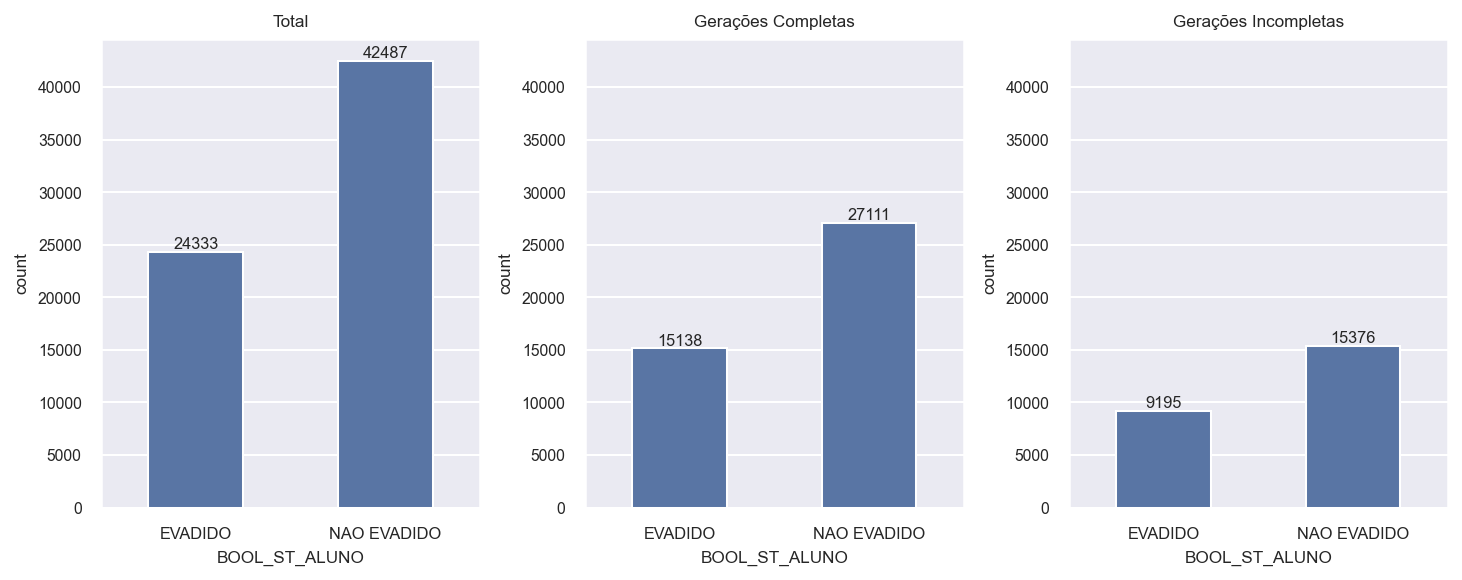

In [24]:
vis_evadidos_x_nao_evadidos(df_selecionado)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')


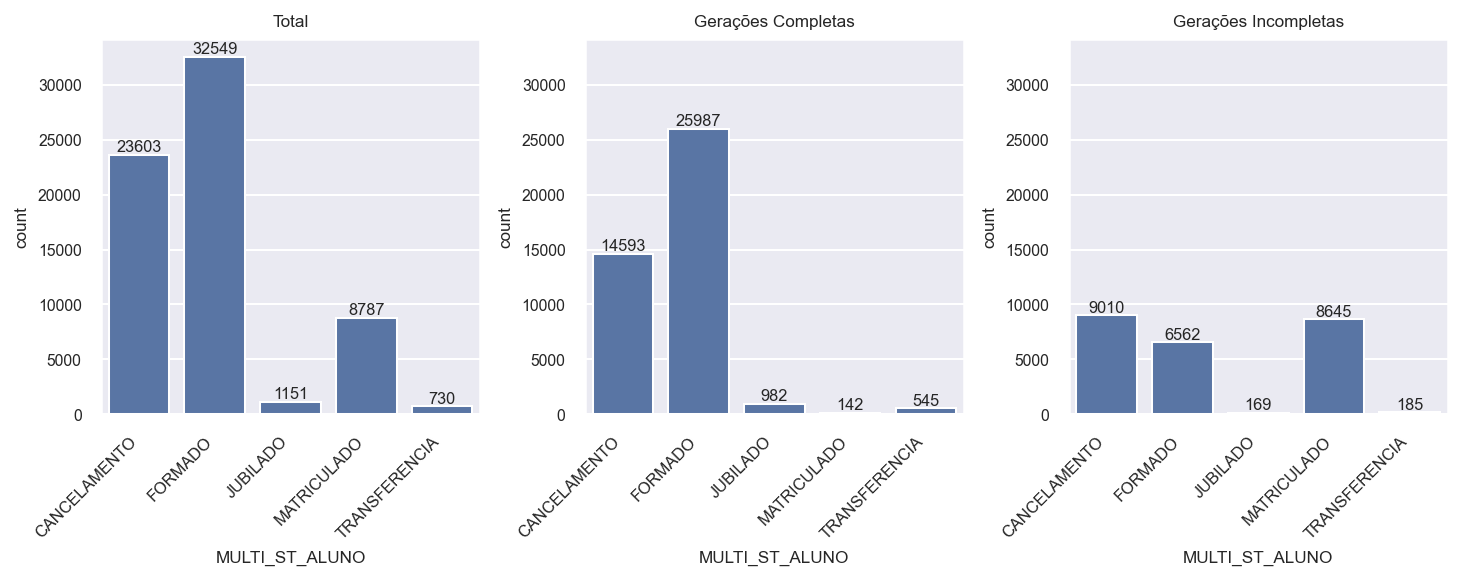

In [25]:
vis_situacao_multiclasse(df_selecionado)

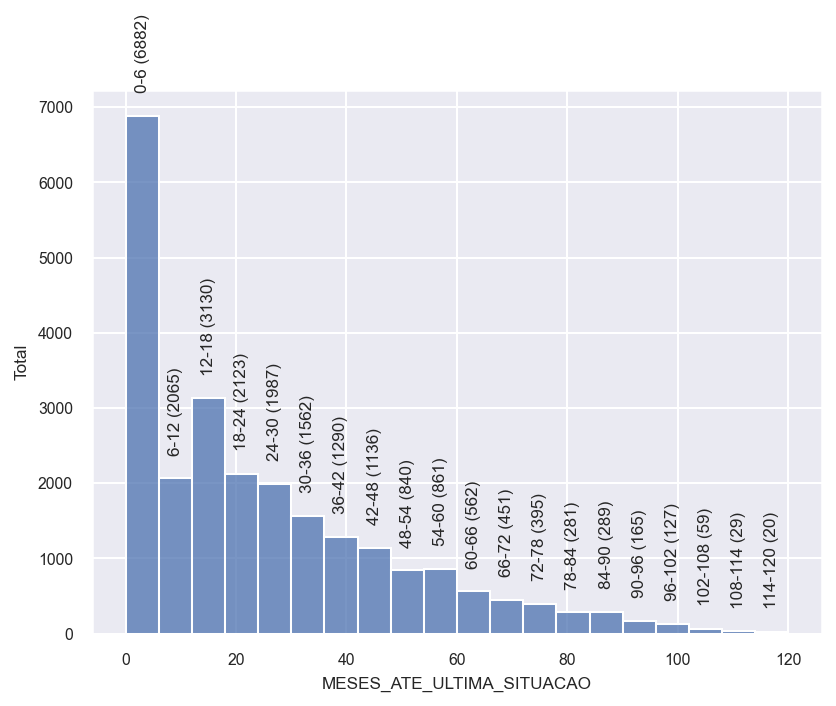

In [26]:
hist_meses = sns.histplot(df_evadidos['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)])

counts, bin_edges = np.histogram(df_evadidos['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)])

for i in range(len(bin_edges)-1):
    x_position = (bin_edges[i] + bin_edges[i+1]) / 2
    y_position = counts[i] + counts.max() * 0.05
    plt.text(x_position, y_position, f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f} ({counts[i]})', ha='center', rotation=90)

plt.ylabel('Total')
plt.show()

In [27]:
df_evadidos['MULTI_ST_ALUNO'].value_counts()

MULTI_ST_ALUNO
CANCELAMENTO     23603
TRANSFERENCIA      730
FORMADO              0
JUBILADO             0
MATRICULADO          0
Name: count, dtype: int64

In [28]:
df_evadidos[df_evadidos['MESES_ATE_ULTIMA_SITUACAO'] <= 6]['MULTI_ST_ALUNO'].value_counts()

MULTI_ST_ALUNO
CANCELAMENTO     7463
TRANSFERENCIA     175
FORMADO             0
JUBILADO            0
MATRICULADO         0
Name: count, dtype: int64

In [29]:
get_pct_evasao(df_selecionado)

(BOOL_ST_ALUNO
 NAO EVADIDO    0.635843
 EVADIDO        0.364157
 Name: proportion, dtype: float64,
 BOOL_ST_ALUNO
 NAO EVADIDO    0.641696
 EVADIDO        0.358304
 Name: proportion, dtype: float64,
 BOOL_ST_ALUNO
 NAO EVADIDO    0.625778
 EVADIDO        0.374222
 Name: proportion, dtype: float64)

In [30]:
get_pct_situacao_multiclasse(df_selecionado)

(MULTI_ST_ALUNO
 FORMADO          0.487115
 CANCELAMENTO     0.353233
 MATRICULADO      0.131503
 JUBILADO         0.017225
 TRANSFERENCIA    0.010925
 Name: proportion, dtype: float64,
 MULTI_ST_ALUNO
 FORMADO          0.615091
 CANCELAMENTO     0.345405
 JUBILADO         0.023243
 TRANSFERENCIA    0.012900
 MATRICULADO      0.003361
 Name: proportion, dtype: float64,
 MULTI_ST_ALUNO
 CANCELAMENTO     0.366692
 MATRICULADO      0.351838
 FORMADO          0.267063
 TRANSFERENCIA    0.007529
 JUBILADO         0.006878
 Name: proportion, dtype: float64)

In [31]:
df_selecionado['NM_CAMPUS'].value_counts().sum()

66820

### Computação

In [32]:
df_computacao = df_selecionado[df_selecionado['CD_CURSO'] == 26]
df_computacao_sem_matriculados = df_computacao[df_computacao['MULTI_ST_ALUNO'] != 'MATRICULADO']
df_computacao_geracoes_completas = df_computacao[df_computacao['GERACAO_COMPLETA'] == 1]
df_computacao_geracoes_incompletas = df_computacao[df_computacao['GERACAO_COMPLETA'] == 0]

In [33]:
df_computacao.shape[0]

985

In [34]:
get_ano_ultima_geracao(df_computacao)

2015

#### Evadidos x não evadidos

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)


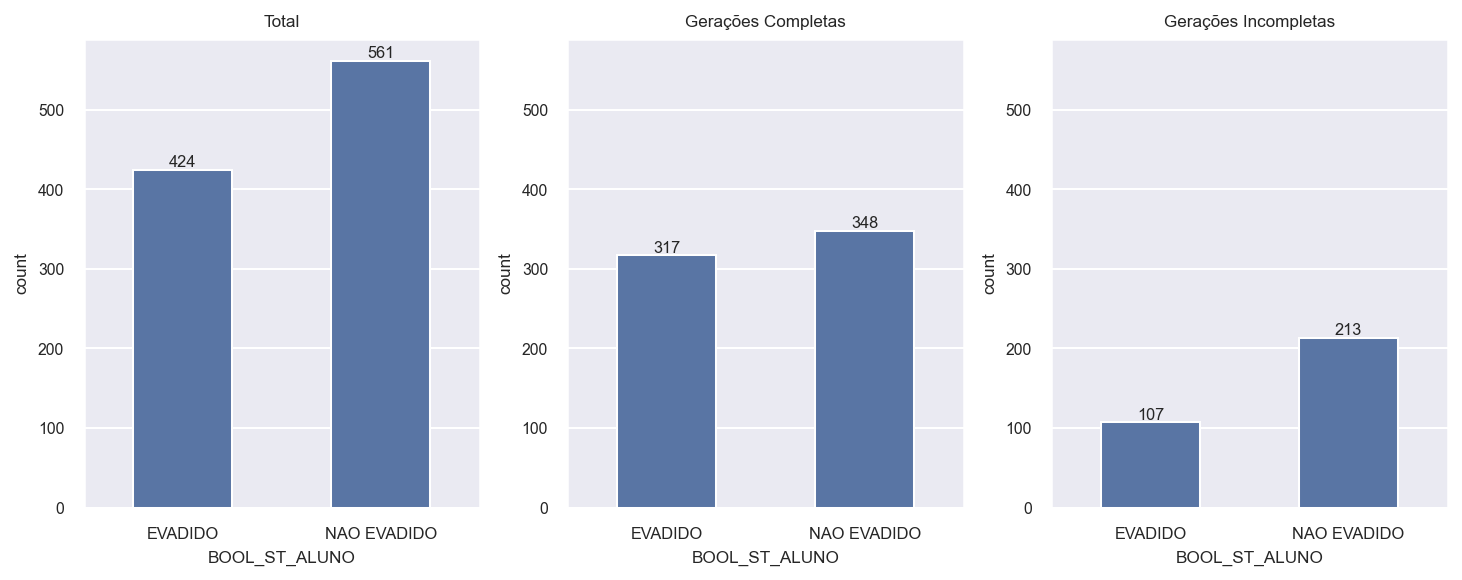

In [35]:
vis_evadidos_x_nao_evadidos(df_computacao)

In [36]:
get_pct_evasao(df_computacao)

(BOOL_ST_ALUNO
 NAO EVADIDO    0.569543
 EVADIDO        0.430457
 Name: proportion, dtype: float64,
 BOOL_ST_ALUNO
 NAO EVADIDO    0.523308
 EVADIDO        0.476692
 Name: proportion, dtype: float64,
 BOOL_ST_ALUNO
 NAO EVADIDO    0.665625
 EVADIDO        0.334375
 Name: proportion, dtype: float64)

#### Situação multiclasse

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')


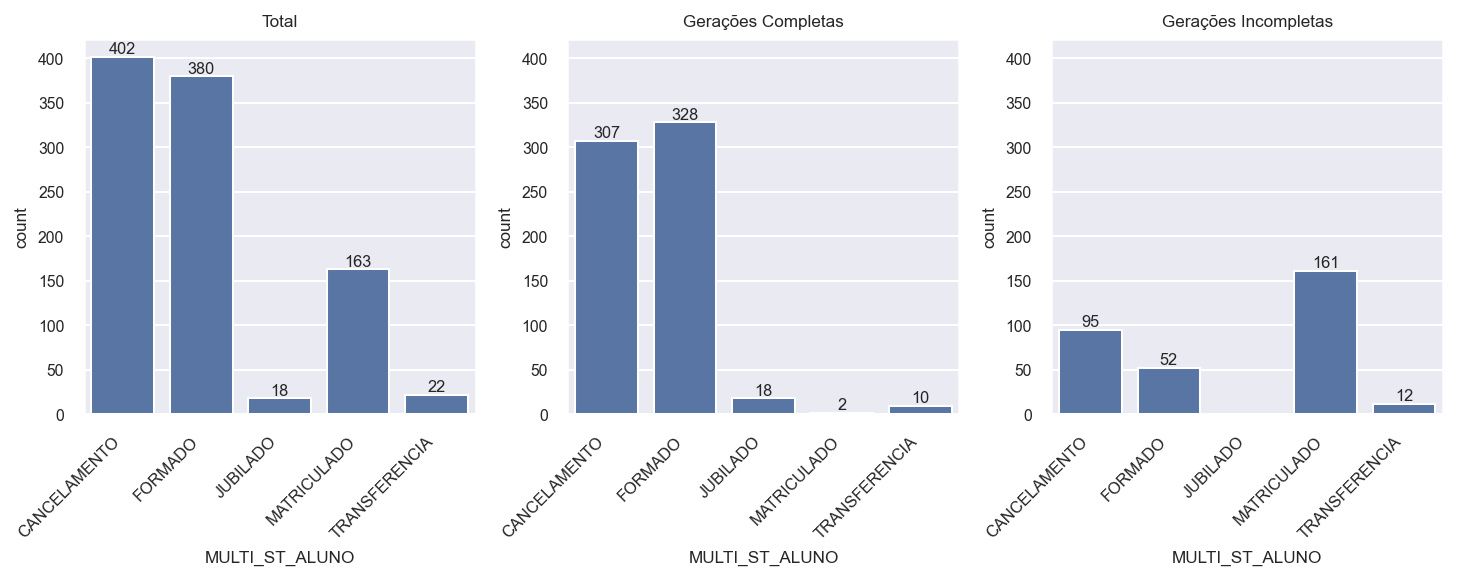

In [37]:
vis_situacao_multiclasse(df_computacao)

#### Tempo até última Situação

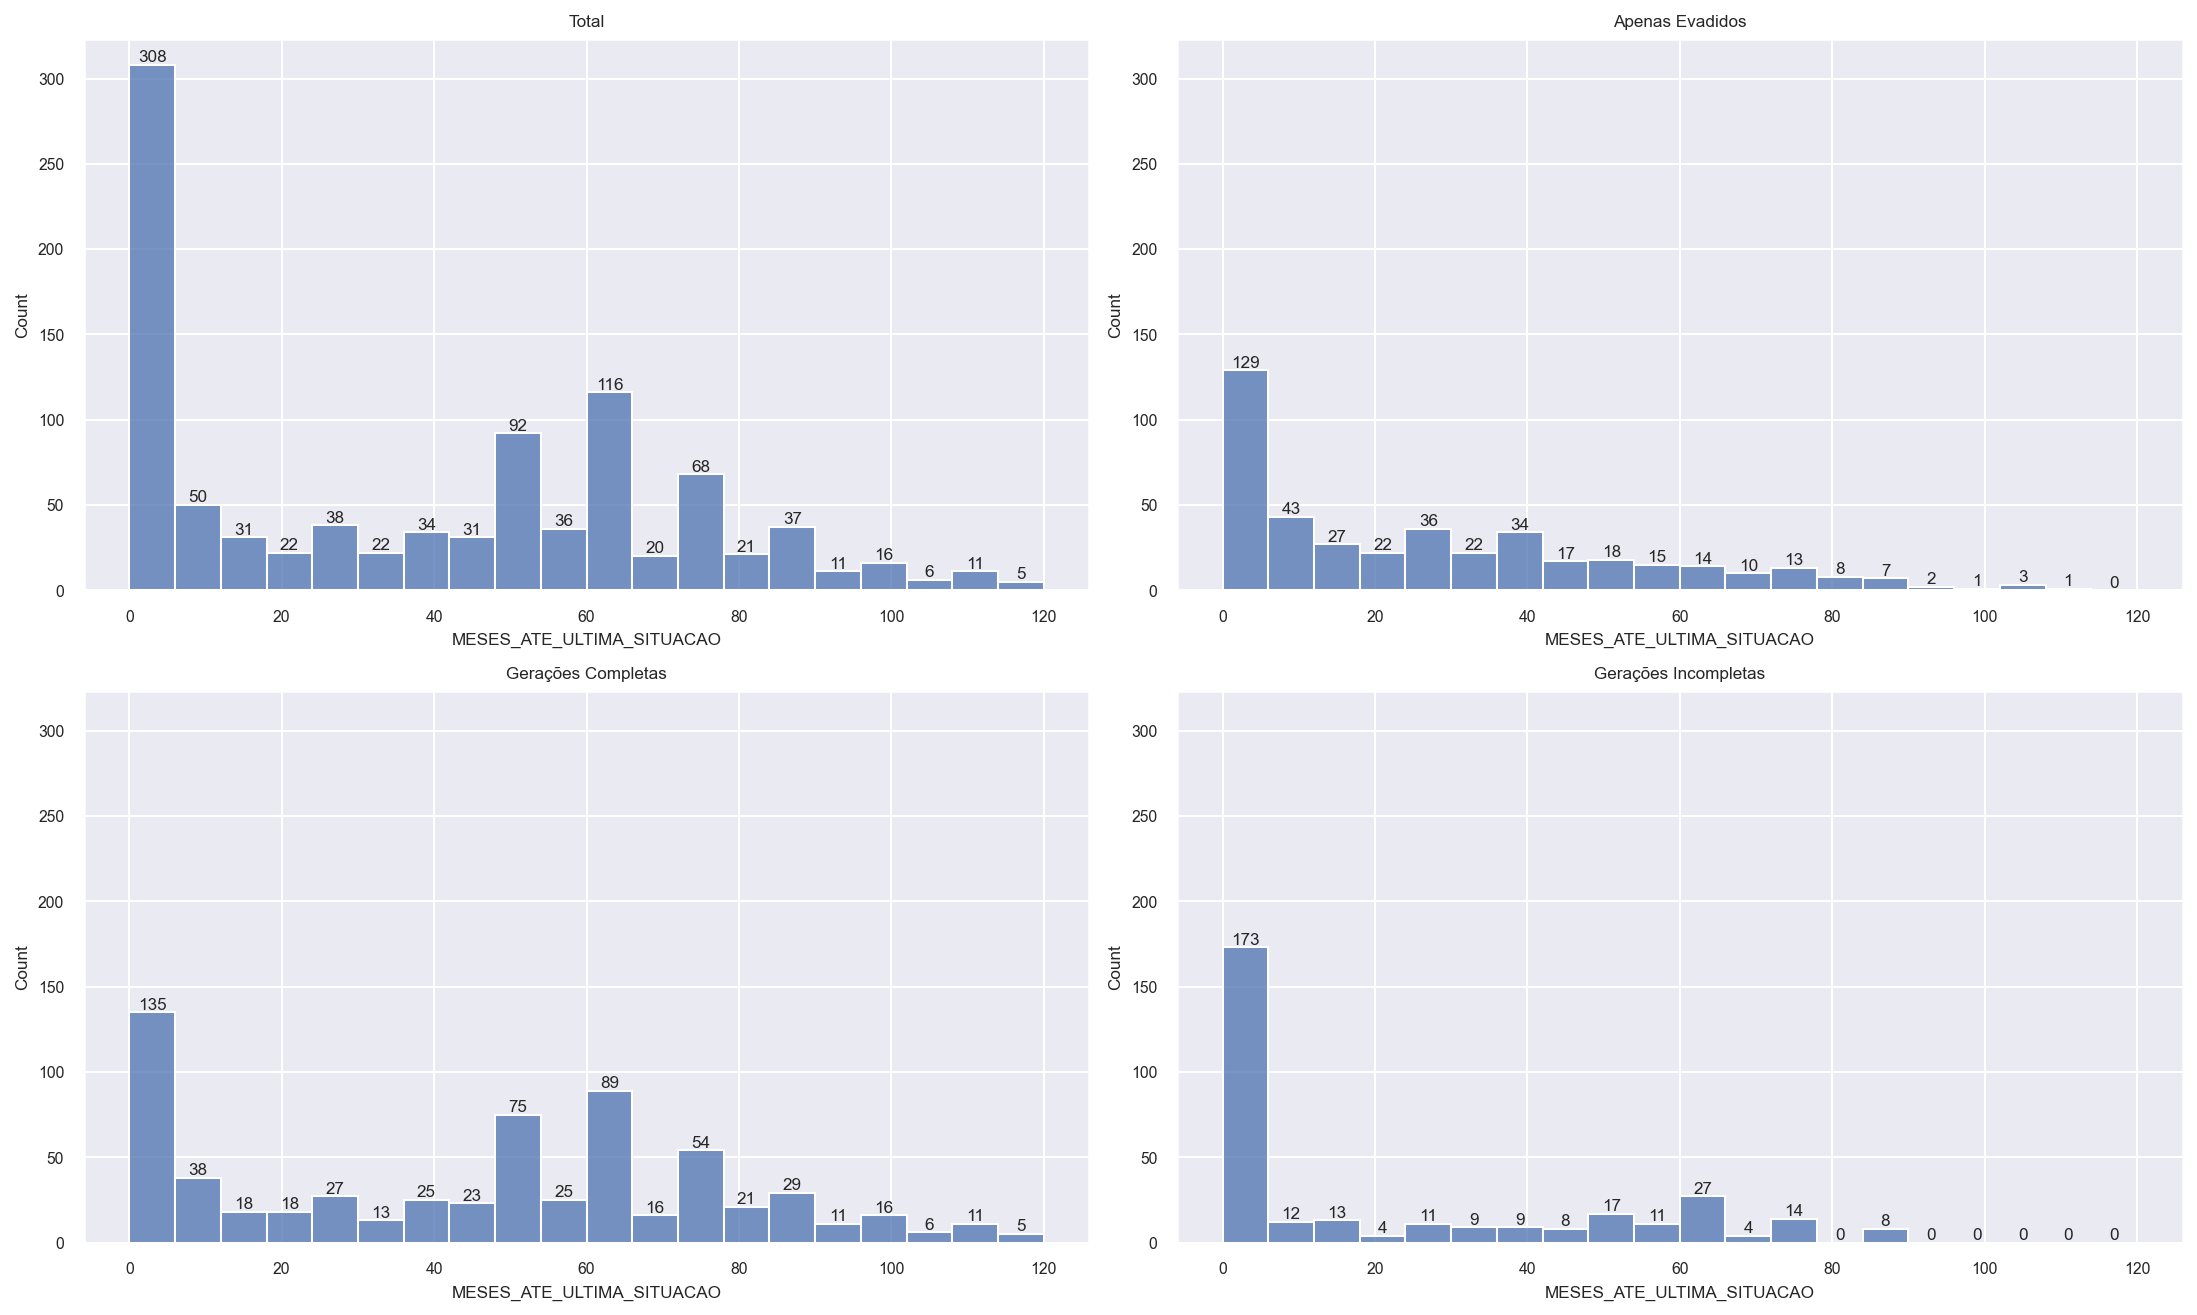

In [38]:
vis_tempo_cursado(df_computacao)

In [39]:
# a = df_computacao['MESES_ATE_ULTIMA_SITUACAO'].value_counts().sort_index()
# b = df_computacao_geracoes_completas['MESES_ATE_ULTIMA_SITUACAO'].value_counts().sort_index()
# c = df_computacao_geracoes_incompletas['MESES_ATE_ULTIMA_SITUACAO'].value_counts().sort_index()
# sns.lineplot(x=a.index, y=a.values)
# sns.lineplot(x=b.index, y=b.values)
# sns.lineplot(x=c.index, y=c.values)

### Por centro

In [40]:
df_selecionado['SG_CENTRO'].value_counts()

SG_CENTRO
CTC    15813
CCH    15789
CSA    13202
CCS     7449
CCA     6376
CCE     6229
CCB     1962
Name: count, dtype: int64

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)


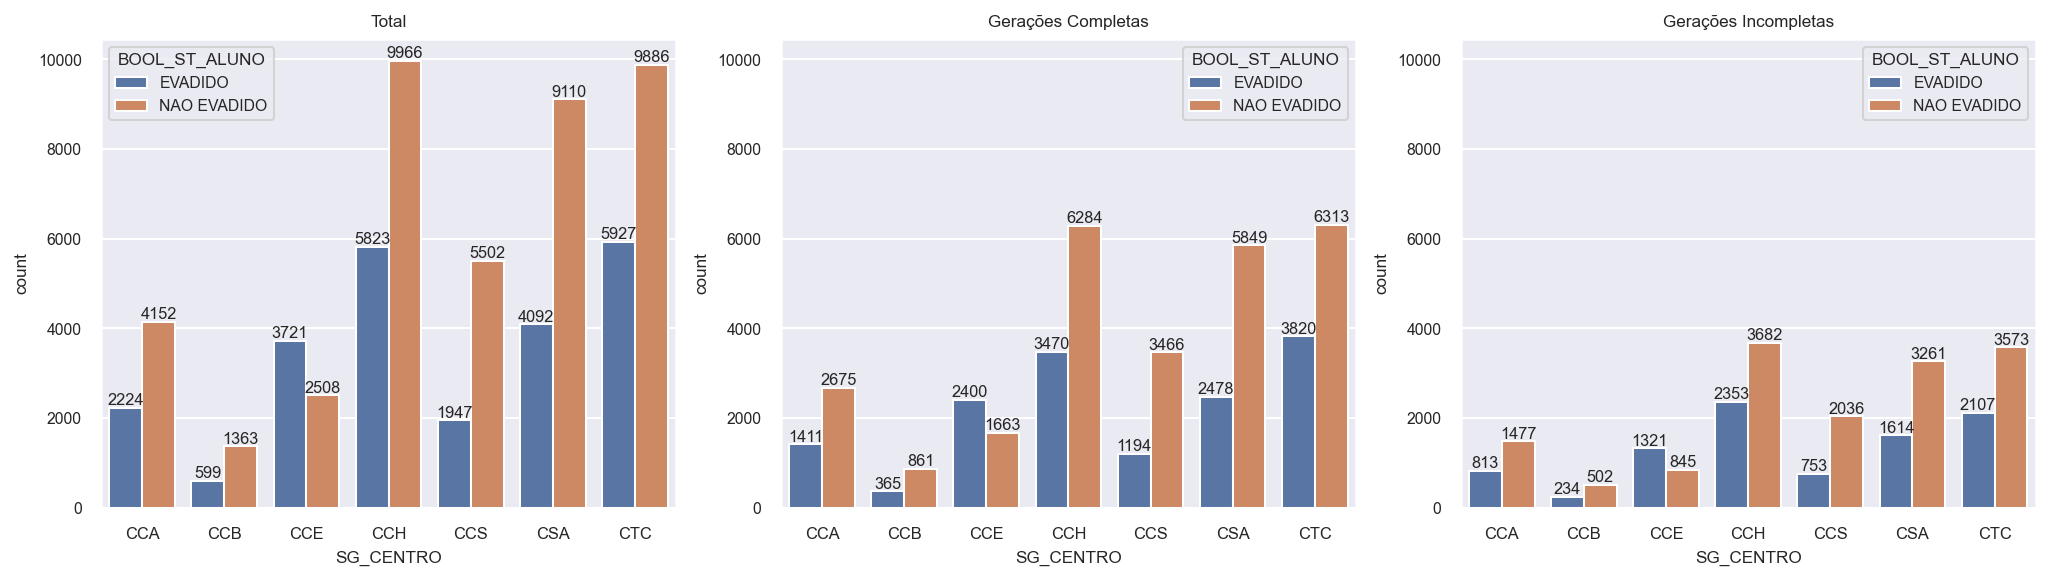

In [41]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, filtro='SG_CENTRO')

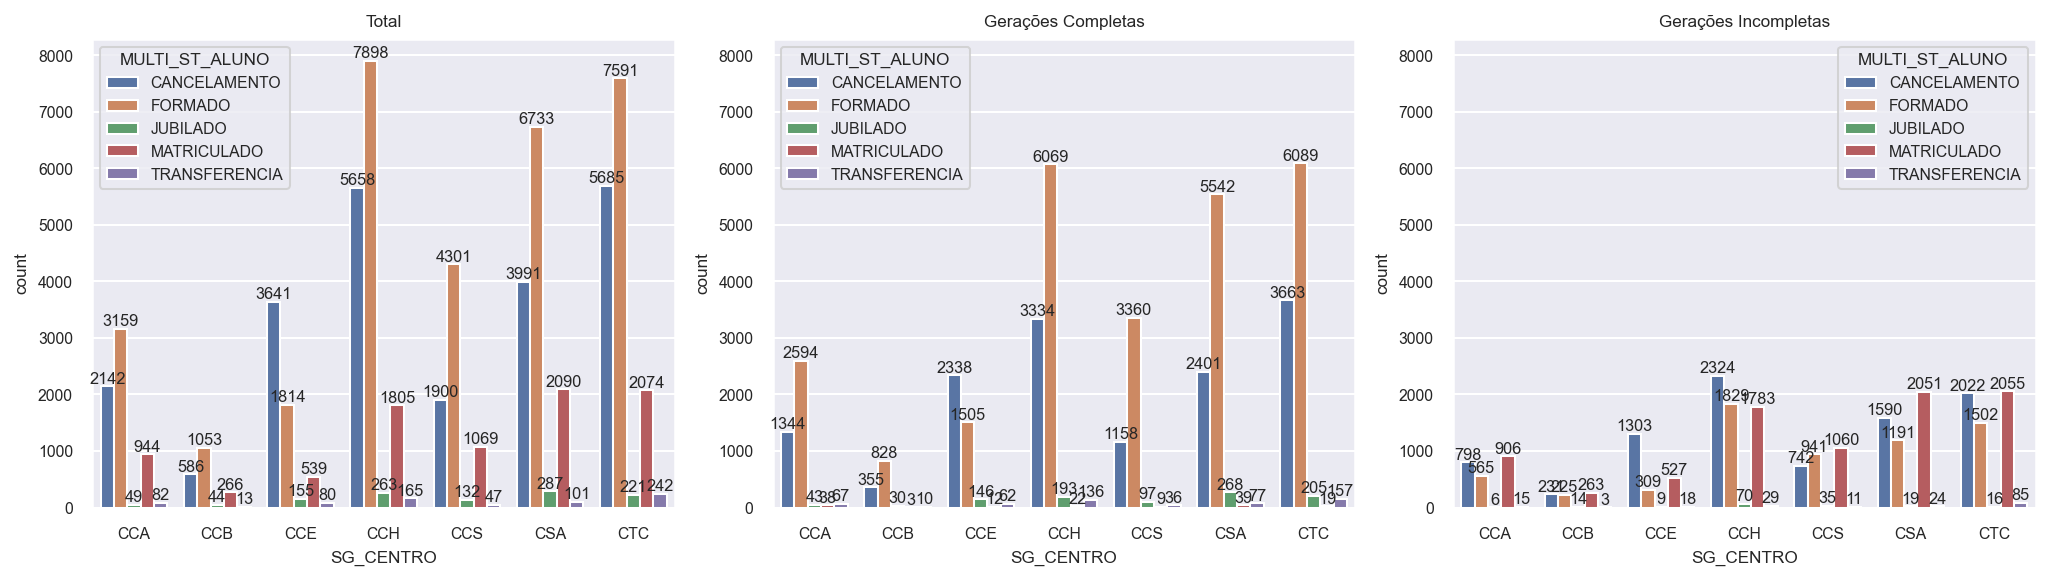

In [42]:
vis_filtro_situacao_multiclasse(df_selecionado, filtro='SG_CENTRO')

In [43]:
df_selecionado.groupby('SG_CENTRO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2158496396.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('SG_CENTRO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()


SG_CENTRO  BOOL_ST_ALUNO
CCA        EVADIDO          0.348808
           NAO EVADIDO      0.651192
CCB        EVADIDO          0.305301
           NAO EVADIDO      0.694699
CCE        EVADIDO          0.597367
           NAO EVADIDO      0.402633
CCH        EVADIDO          0.368801
           NAO EVADIDO      0.631199
CCS        EVADIDO          0.261377
           NAO EVADIDO      0.738623
CSA        EVADIDO          0.309953
           NAO EVADIDO      0.690047
CTC        EVADIDO          0.374818
           NAO EVADIDO      0.625182
Name: proportion, dtype: float64

In [44]:
df_selecionado.groupby('SG_CENTRO')['MULTI_ST_ALUNO'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\3391110553.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('SG_CENTRO')['MULTI_ST_ALUNO'].value_counts(normalize=True).sort_index()


SG_CENTRO  MULTI_ST_ALUNO
CCA        CANCELAMENTO      0.335947
           FORMADO           0.495452
           JUBILADO          0.007685
           MATRICULADO       0.148055
           TRANSFERENCIA     0.012861
CCB        CANCELAMENTO      0.298675
           FORMADO           0.536697
           JUBILADO          0.022426
           MATRICULADO       0.135576
           TRANSFERENCIA     0.006626
CCE        CANCELAMENTO      0.584524
           FORMADO           0.291218
           JUBILADO          0.024884
           MATRICULADO       0.086531
           TRANSFERENCIA     0.012843
CCH        CANCELAMENTO      0.358351
           FORMADO           0.500222
           JUBILADO          0.016657
           MATRICULADO       0.114320
           TRANSFERENCIA     0.010450
CCS        CANCELAMENTO      0.255068
           FORMADO           0.577393
           JUBILADO          0.017720
           MATRICULADO       0.143509
           TRANSFERENCIA     0.006310
CSA        CANCELAMENTO 

#### Ciências Exatas

In [45]:
df_cce = df_selecionado[df_selecionado['SG_CENTRO'] == 'CCE']

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[0].get_xticklabels(), fontsize=8, ha='right')


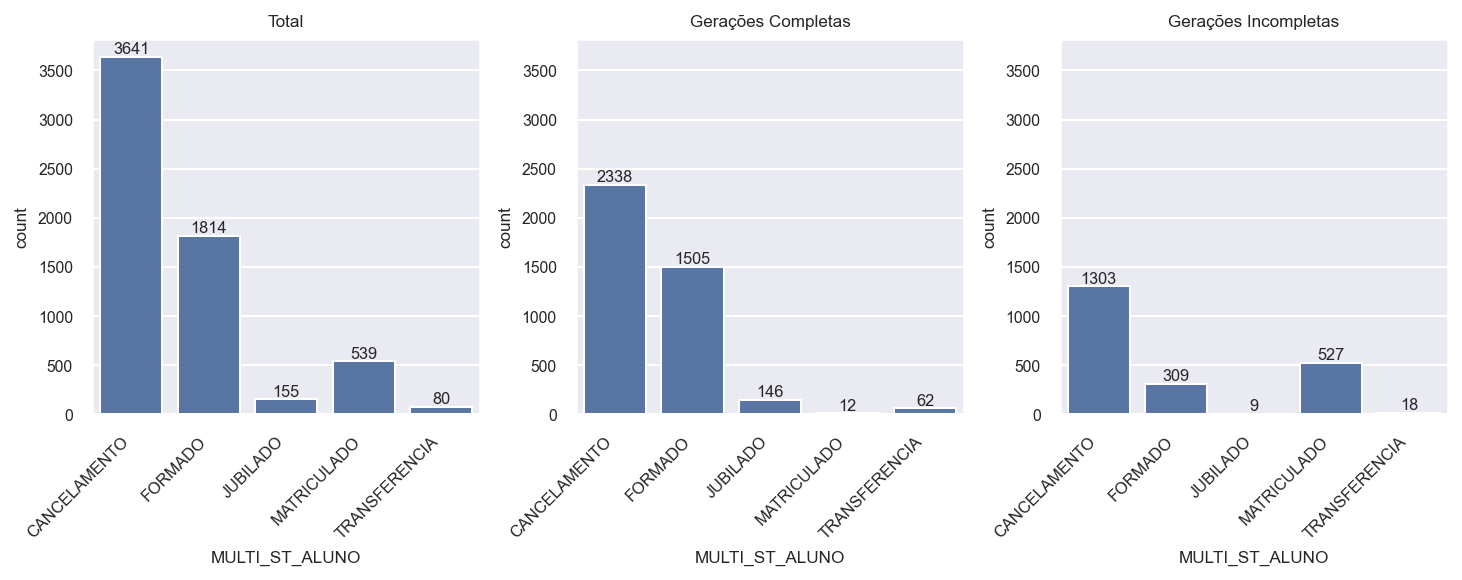

In [46]:
vis_situacao_multiclasse(df_cce)

In [47]:
# df_cce_evadidos = df_selecionado[(df_selecionado['SG_CENTRO'] == 'CCE') & (df_selecionado['BOOL_ST_ALUNO'] == 'EVADIDO')]
# hist_meses = sns.histplot(df_cce_evadidos['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)])

# counts, bin_edges = np.histogram(df_cce_evadidos['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)])

# for i in range(len(bin_edges)-1):
#     x_position = (bin_edges[i] + bin_edges[i+1]) / 2
#     y_position = counts[i] + counts.max() * 0.05
#     plt.text(x_position, y_position, f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f} ({counts[i]})', ha='center', rotation=90)

# plt.ylabel('Total')
# plt.show()

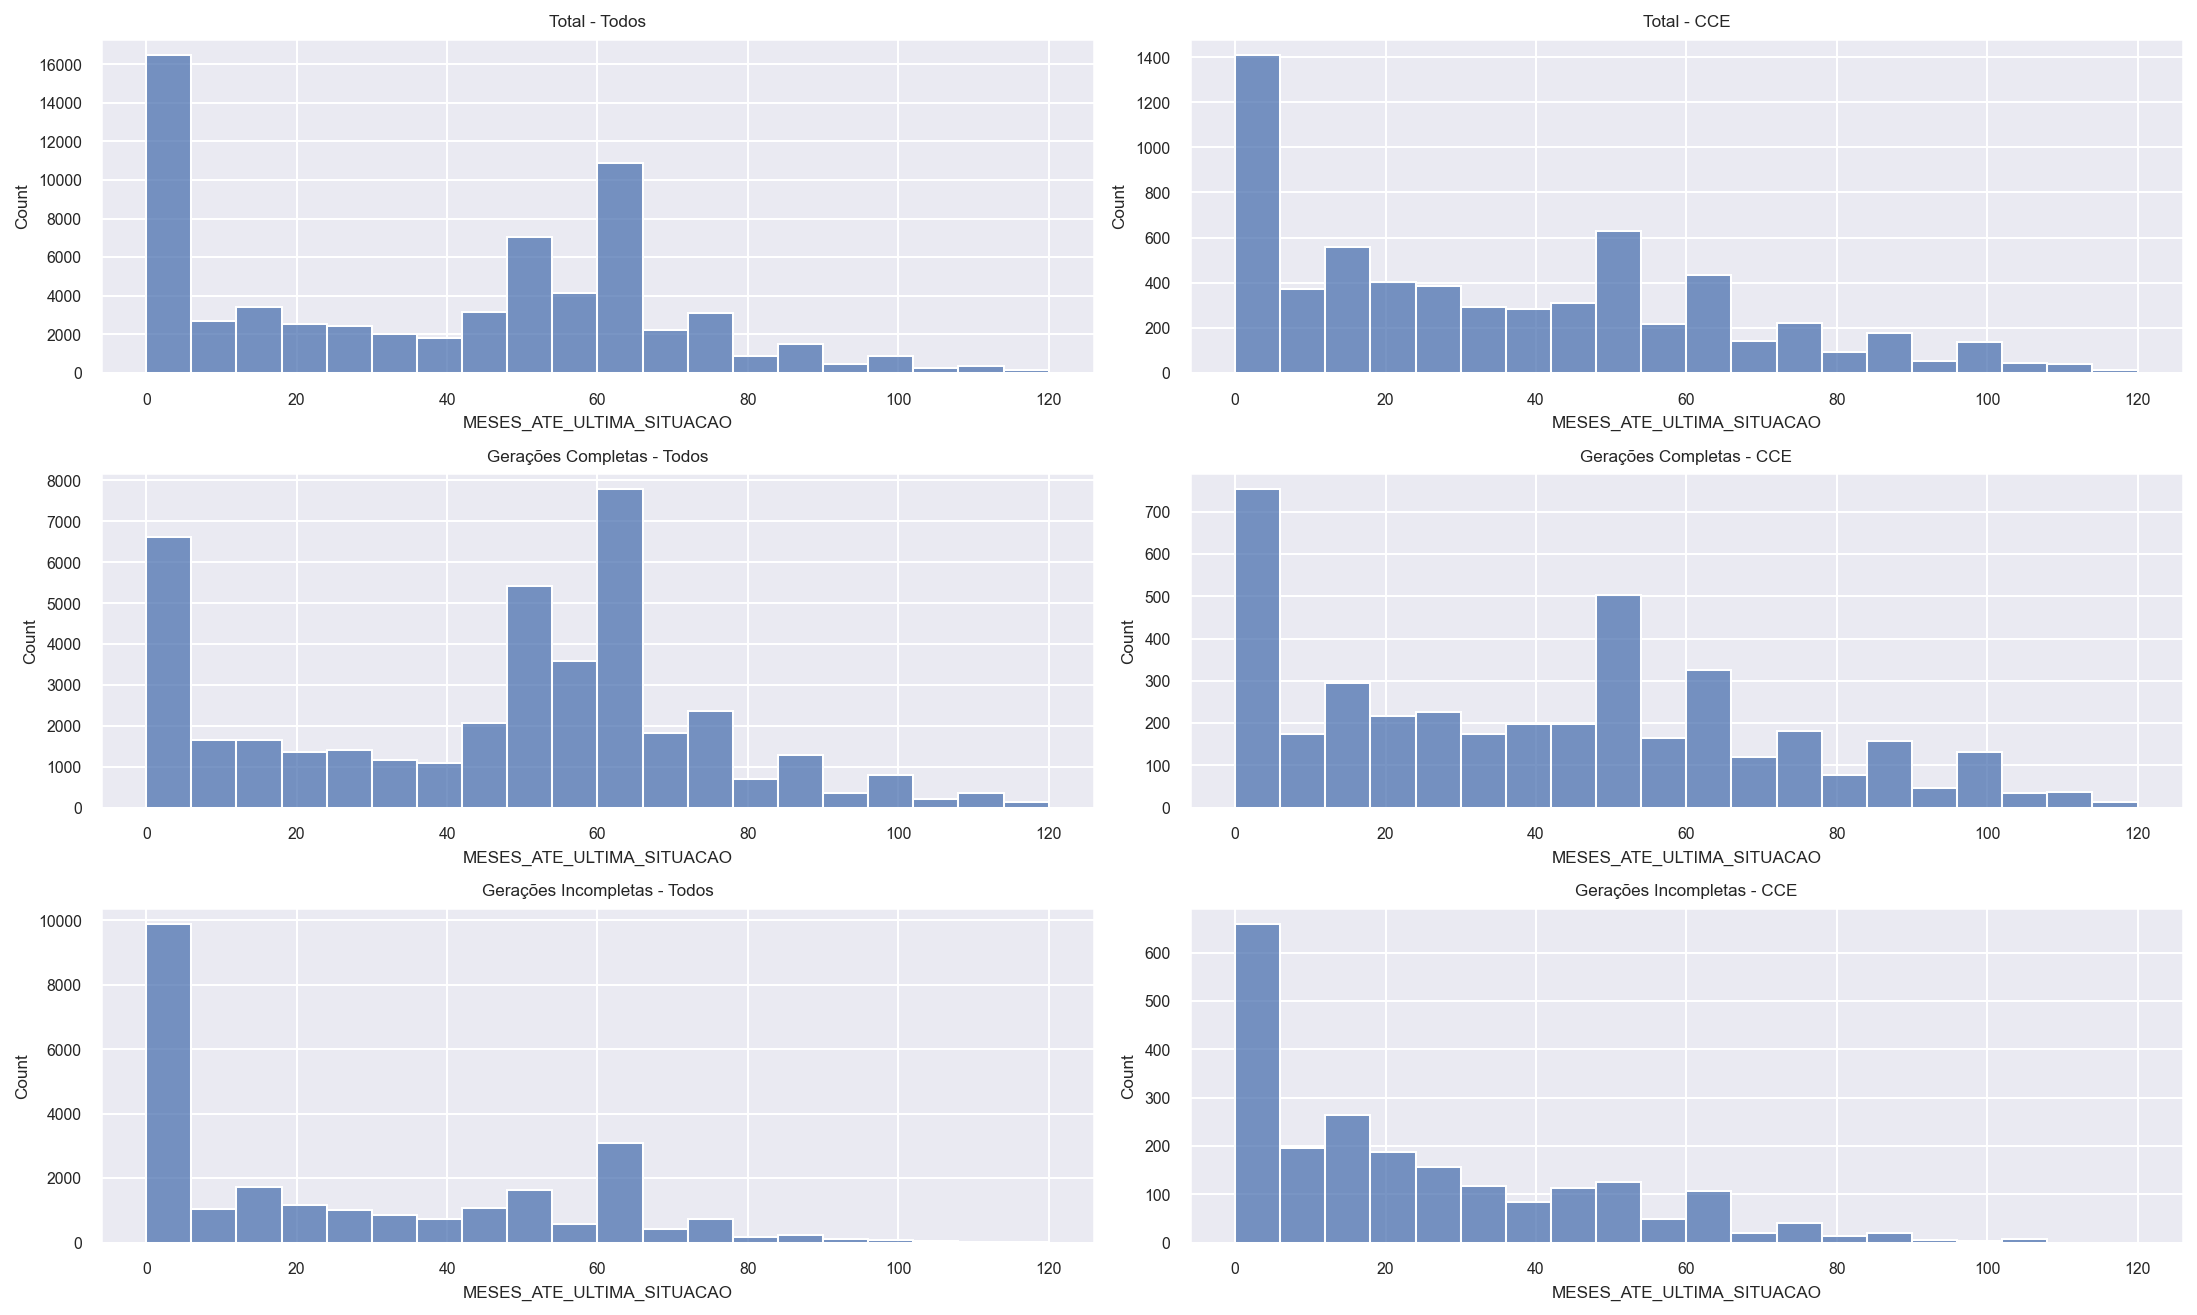

In [48]:
fig, ax = plt.subplots(3, 2, figsize=(15, 9))

hist_meses = sns.histplot(df_selecionado['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[0, 0])
ax[0, 0].set_title('Total - Todos')

hist_meses = sns.histplot(df_cce['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[0, 1])
ax[0, 1].set_title('Total - CCE')

hist_meses = sns.histplot(df_selecionado[df_selecionado['GERACAO_COMPLETA'] == 1]['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[1, 0])
ax[1, 0].set_title('Gerações Completas - Todos')

hist_meses = sns.histplot(df_cce[df_cce['GERACAO_COMPLETA'] == 1]['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[1, 1])
ax[1, 1].set_title('Gerações Completas - CCE')

hist_meses = sns.histplot(df_selecionado[df_selecionado['GERACAO_COMPLETA'] == 0]['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[2, 0])
ax[2, 0].set_title('Gerações Incompletas - Todos')

hist_meses = sns.histplot(df_cce[df_cce['GERACAO_COMPLETA'] == 0]['MESES_ATE_ULTIMA_SITUACAO'], bins=[i for i in range(0, 125, 6)], ax=ax[2, 1])
ax[2, 1].set_title('Gerações Incompletas - CCE')

plt.tight_layout()
plt.show()

### Por forma de ingresso

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

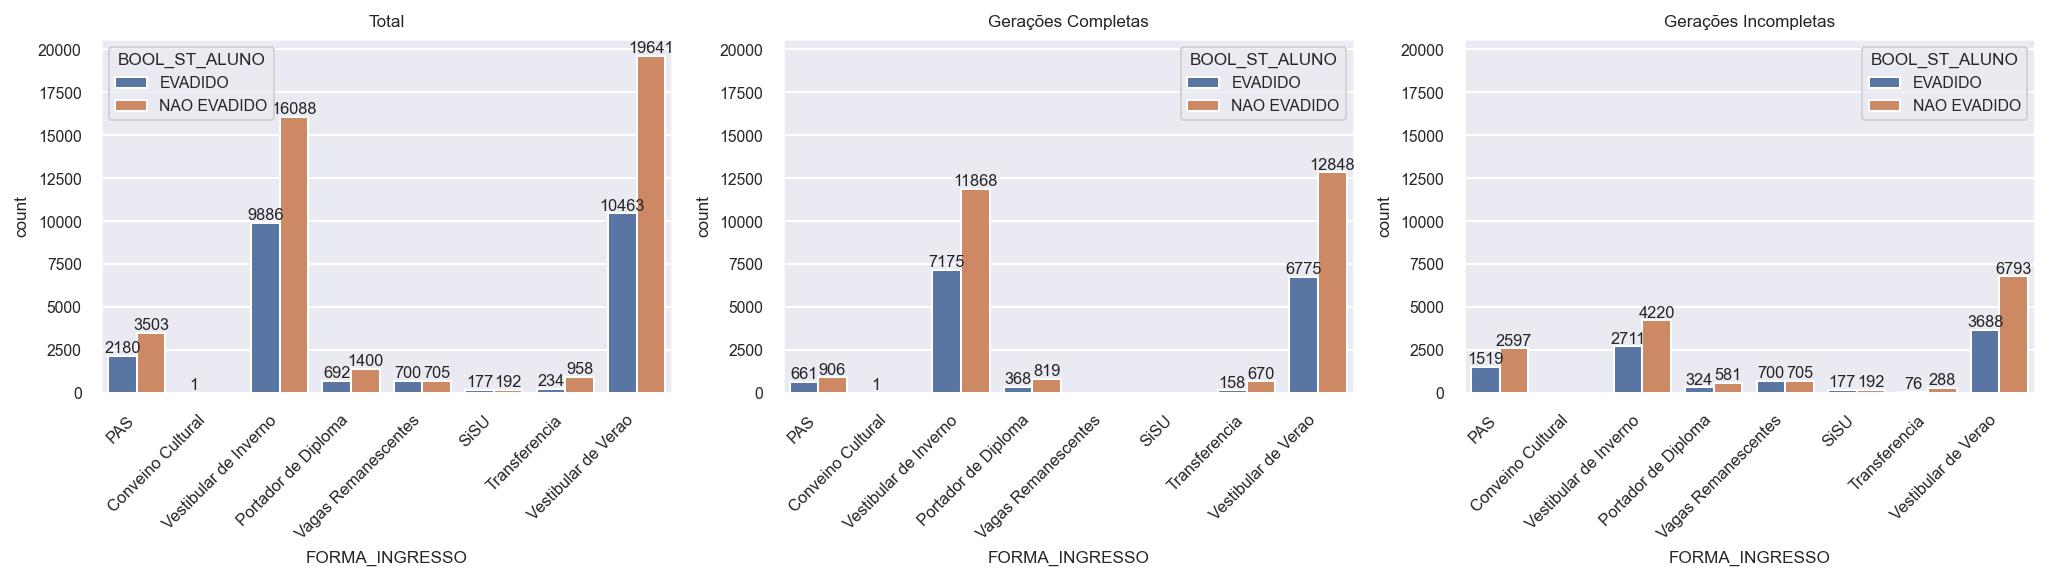

In [215]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, filtro='FORMA_INGRESSO', overlap=True, figsize=(14, 4))

In [218]:
df_selecionado['FORMA_INGRESSO'].value_counts()

FORMA_INGRESSO
Vestibular de Verao      30104
Vestibular de Inverno    25974
PAS                       5683
Portador de Diploma       2092
Vagas Remanescentes       1405
Transferencia             1192
SiSU                       369
Conveino Cultural            1
Name: count, dtype: int64

In [219]:
df_selecionado.groupby('FORMA_INGRESSO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\3230437507.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('FORMA_INGRESSO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()


FORMA_INGRESSO         BOOL_ST_ALUNO
PAS                    EVADIDO          0.383600
                       NAO EVADIDO      0.616400
Conveino Cultural      EVADIDO          1.000000
                       NAO EVADIDO      0.000000
Vestibular de Inverno  EVADIDO          0.380611
                       NAO EVADIDO      0.619389
Portador de Diploma    EVADIDO          0.330784
                       NAO EVADIDO      0.669216
Vagas Remanescentes    EVADIDO          0.498221
                       NAO EVADIDO      0.501779
SiSU                   EVADIDO          0.479675
                       NAO EVADIDO      0.520325
Transferencia          EVADIDO          0.196309
                       NAO EVADIDO      0.803691
Vestibular de Verao    EVADIDO          0.347562
                       NAO EVADIDO      0.652438
Name: proportion, dtype: float64

#### Explorando mais

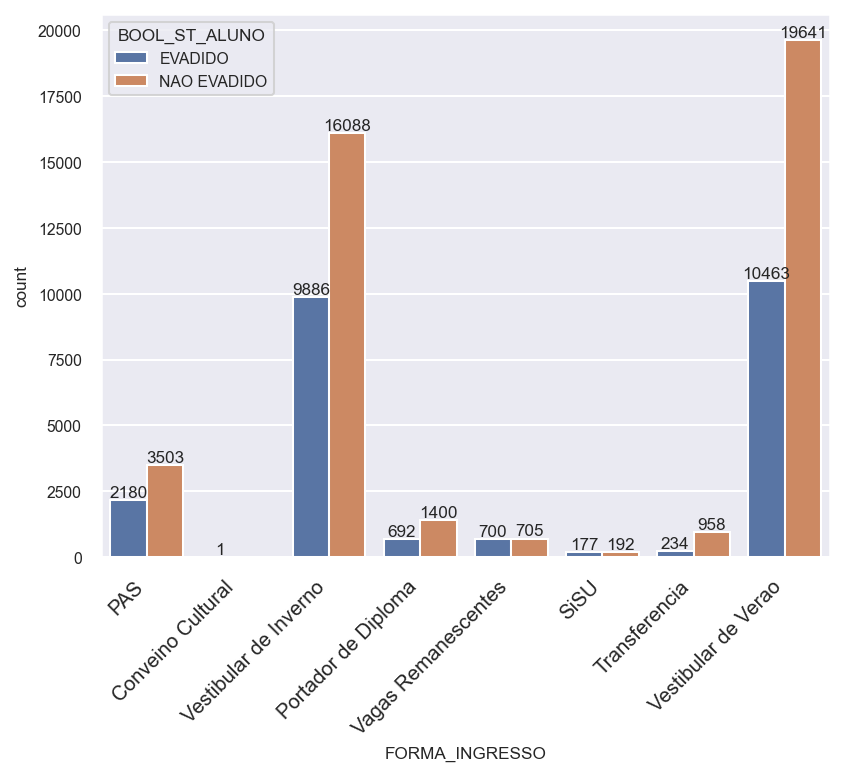

In [216]:
# plt.figure(figsize=(10, 4))
vis = sns.countplot(x='FORMA_INGRESSO', hue='BOOL_ST_ALUNO', data=df_selecionado)
for container in vis.containers:
        vis.bar_label(container)
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.show()

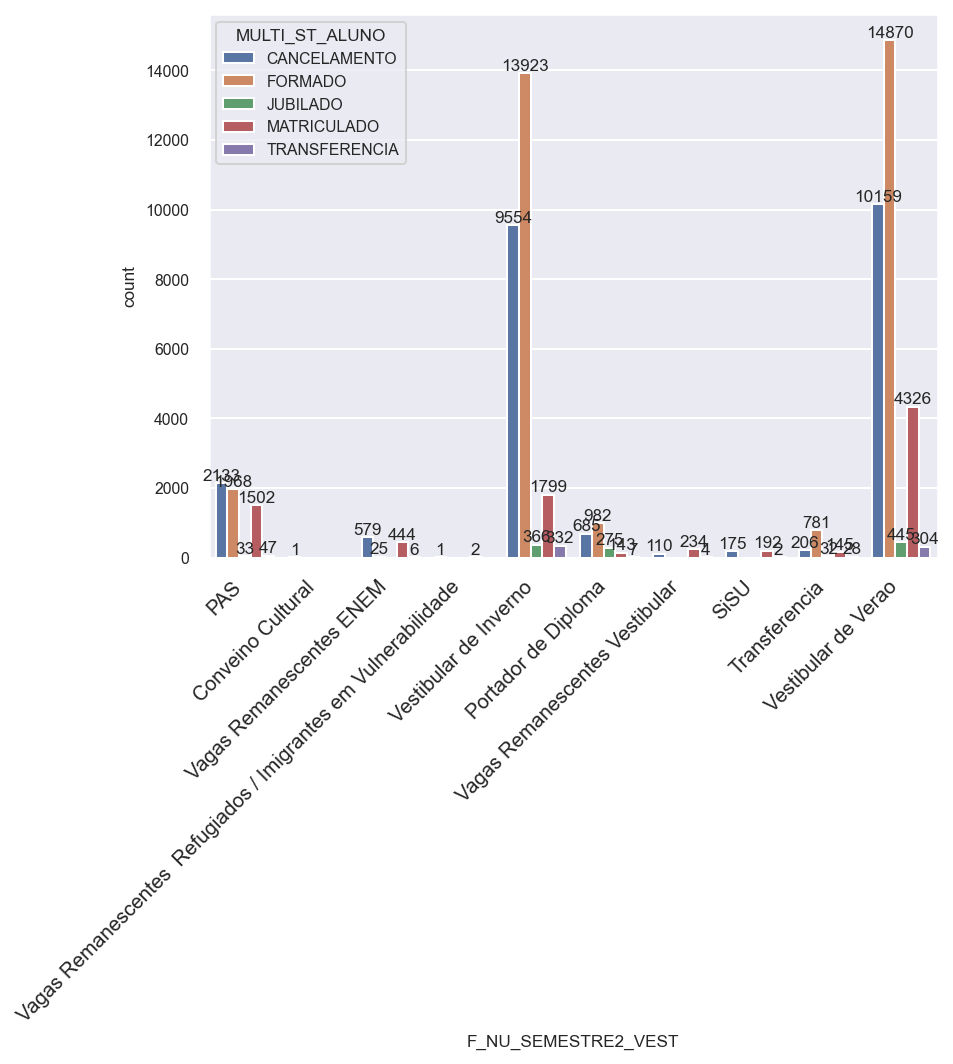

In [217]:
vis = sns.countplot(x='F_NU_SEMESTRE2_VEST', hue='MULTI_ST_ALUNO', data=df_selecionado)
for container in vis.containers:
        vis.bar_label(container)
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.show()

In [52]:
df_vr_enem = df_selecionado[df_selecionado['F_NU_SEMESTRE2_VEST'] == 'Vagas Remanescentes ENEM']

In [53]:
df_vr_enem['DT_ANO_INGRES'].value_counts().sort_index()

DT_ANO_INGRES
2018     81
2019     53
2020    154
2021    296
2022    470
Name: count, dtype: int64

In [54]:
df_vr_enem.groupby('DT_ANO_INGRES')['BOOL_ST_ALUNO'].value_counts(normalize=True)

DT_ANO_INGRES  BOOL_ST_ALUNO
2018           EVADIDO          0.716049
               NAO EVADIDO      0.283951
2019           EVADIDO          0.584906
               NAO EVADIDO      0.415094
2020           EVADIDO          0.629870
               NAO EVADIDO      0.370130
2021           EVADIDO          0.641892
               NAO EVADIDO      0.358108
2022           NAO EVADIDO      0.555319
               EVADIDO          0.444681
Name: proportion, dtype: float64

In [55]:
df_vr_enem[df_vr_enem['BOOL_ST_ALUNO'] == True][['DT_ANO_INGRES', 'MESES_ATE_ULTIMA_SITUACAO']].value_counts().sort_index()

Series([], Name: count, dtype: int64)

Ver ano da última situação

Ver local férias

### Por período

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

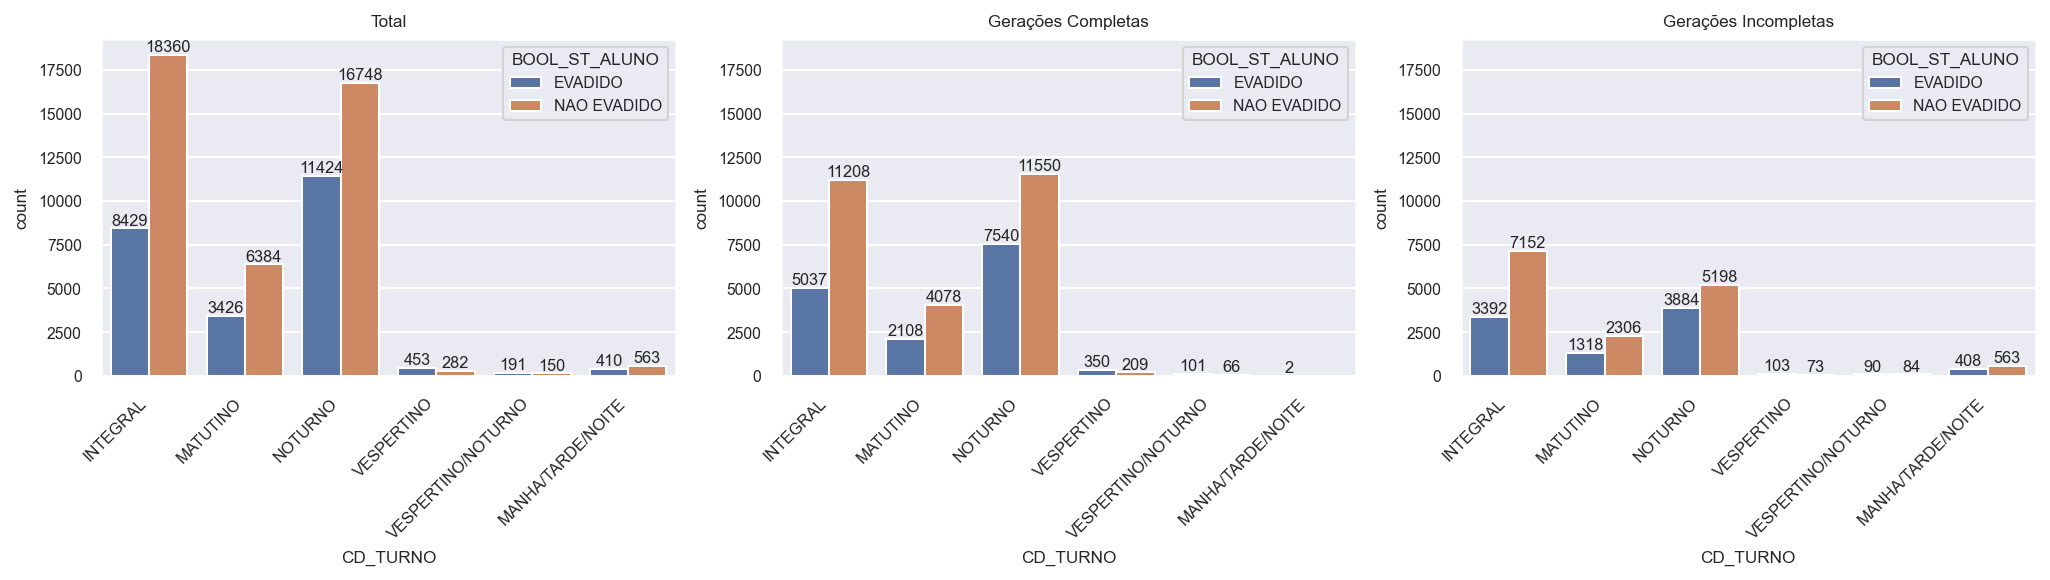

In [56]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, 'CD_TURNO', overlap=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')


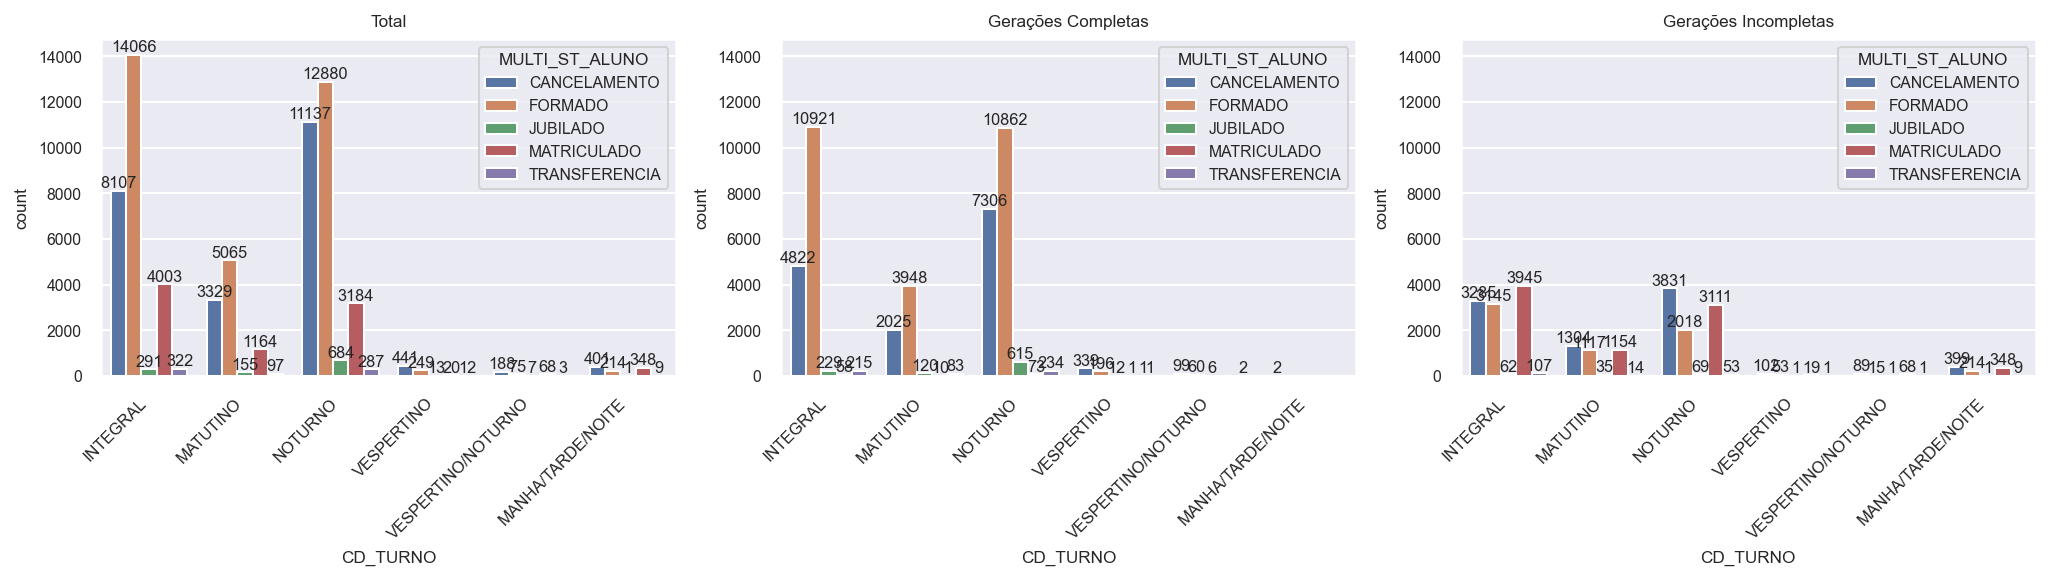

In [57]:
vis_filtro_situacao_multiclasse(df_selecionado, 'CD_TURNO', overlap=True)

In [105]:
df_selecionado['CD_TURNO'].value_counts()

CD_TURNO
NOTURNO               28172
INTEGRAL              26789
MATUTINO               9810
MANHA/TARDE/NOITE       973
VESPERTINO              735
VESPERTINO/NOTURNO      341
Name: count, dtype: int64

In [106]:
df_selecionado['CD_TURNO'].value_counts(normalize=True)

CD_TURNO
NOTURNO               0.421610
INTEGRAL              0.400913
MATUTINO              0.146812
MANHA/TARDE/NOITE     0.014562
VESPERTINO            0.011000
VESPERTINO/NOTURNO    0.005103
Name: proportion, dtype: float64

In [108]:
df_selecionado[df_selecionado['CD_TURNO'] == 'VESPERTINO']['NM_CURSO'].value_counts()

NM_CURSO
Filosofia              684
Engenharia Mecânica     33
Estatística             17
Pedagogia                1
Name: count, dtype: int64

In [59]:
df_selecionado[df_selecionado['CD_TURNO'] == 'MANHA/TARDE/NOITE']['NM_CURSO'].value_counts()

NM_CURSO
Engenharia de Produção    973
Name: count, dtype: int64

In [111]:
df_selecionado[df_selecionado['NM_CURSO'] == 'Engenharia de Produção']['CD_TURNO'].value_counts()

CD_TURNO
NOTURNO               1654
MANHA/TARDE/NOITE      973
INTEGRAL                62
MATUTINO                 0
VESPERTINO               0
VESPERTINO/NOTURNO       0
Name: count, dtype: int64

In [114]:
df_selecionado[df_selecionado['NM_CURSO'] == 'Engenharia de Produção'].groupby('CD_TURNO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2458925944.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado[df_selecionado['NM_CURSO'] == 'Engenharia de Produção'].groupby('CD_TURNO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()


CD_TURNO            BOOL_ST_ALUNO
INTEGRAL            EVADIDO          0.177419
                    NAO EVADIDO      0.822581
MATUTINO            EVADIDO          0.000000
                    NAO EVADIDO      0.000000
NOTURNO             EVADIDO          0.343410
                    NAO EVADIDO      0.656590
VESPERTINO          EVADIDO          0.000000
                    NAO EVADIDO      0.000000
VESPERTINO/NOTURNO  EVADIDO          0.000000
                    NAO EVADIDO      0.000000
MANHA/TARDE/NOITE   EVADIDO          0.421377
                    NAO EVADIDO      0.578623
Name: proportion, dtype: float64

In [103]:
df_selecionado[df_selecionado['NM_CURSO'] == 'Filosofia']['CD_TURNO'].value_counts()

CD_TURNO
VESPERTINO            684
NOTURNO               122
MATUTINO                1
VESPERTINO/NOTURNO      1
INTEGRAL                0
MANHA/TARDE/NOITE       0
Name: count, dtype: int64

In [109]:
df_selecionado[df_selecionado['NM_CURSO'] == 'Filosofia'].groupby('CD_TURNO')['BOOL_ST_ALUNO'].value_counts(normalize=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\3338981437.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado[df_selecionado['NM_CURSO'] == 'Filosofia'].groupby('CD_TURNO')['BOOL_ST_ALUNO'].value_counts(normalize=True)


CD_TURNO            BOOL_ST_ALUNO
INTEGRAL            EVADIDO          0.000000
                    NAO EVADIDO      0.000000
MATUTINO            EVADIDO          1.000000
                    NAO EVADIDO      0.000000
NOTURNO             EVADIDO          0.598361
                    NAO EVADIDO      0.401639
VESPERTINO          EVADIDO          0.597953
                    NAO EVADIDO      0.402047
VESPERTINO/NOTURNO  EVADIDO          1.000000
                    NAO EVADIDO      0.000000
MANHA/TARDE/NOITE   EVADIDO          0.000000
                    NAO EVADIDO      0.000000
Name: proportion, dtype: float64

In [60]:
df_selecionado[df_selecionado['CD_TURNO'] == 'VESPERTINO/NOTURNO']['NM_CURSO'].value_counts()

NM_CURSO
Matemática     142
Estatística    109
Física          89
Filosofia        1
Name: count, dtype: int64

In [61]:
df_selecionado.groupby('CD_TURNO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\3610003465.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('CD_TURNO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()


CD_TURNO            BOOL_ST_ALUNO
INTEGRAL            EVADIDO          0.314644
                    NAO EVADIDO      0.685356
MATUTINO            EVADIDO          0.349235
                    NAO EVADIDO      0.650765
NOTURNO             EVADIDO          0.405509
                    NAO EVADIDO      0.594491
VESPERTINO          EVADIDO          0.616327
                    NAO EVADIDO      0.383673
VESPERTINO/NOTURNO  EVADIDO          0.560117
                    NAO EVADIDO      0.439883
MANHA/TARDE/NOITE   EVADIDO          0.421377
                    NAO EVADIDO      0.578623
Name: proportion, dtype: float64

In [100]:
df_selecionado.groupby('CD_TURNO')['BOOL_COTAS'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\3617802081.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('CD_TURNO')['BOOL_COTAS'].value_counts(normalize=True).sort_index()


CD_TURNO            BOOL_COTAS 
INTEGRAL            Não Cotista    0.900743
                    Cotista        0.099257
MATUTINO            Não Cotista    0.920285
                    Cotista        0.079715
NOTURNO             Não Cotista    0.915199
                    Cotista        0.084801
VESPERTINO          Não Cotista    0.937415
                    Cotista        0.062585
VESPERTINO/NOTURNO  Não Cotista    0.944282
                    Cotista        0.055718
MANHA/TARDE/NOITE   Não Cotista    0.912641
                    Cotista        0.087359
Name: proportion, dtype: float64

In [101]:
df_selecionado.groupby('CD_TURNO')['LOCAL_FERIAS'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\1565333509.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('CD_TURNO')['LOCAL_FERIAS'].value_counts(normalize=True).sort_index()


CD_TURNO            LOCAL_FERIAS            
INTEGRAL            Na cidade do campus         0.408339
                    Outras cidades do Paraná    0.390757
                    Estado de São Paulo         0.164881
                    Outros estados              0.036022
MATUTINO            Na cidade do campus         0.510092
                    Outras cidades do Paraná    0.297859
                    Estado de São Paulo         0.166972
                    Outros estados              0.025076
NOTURNO             Na cidade do campus         0.513595
                    Outras cidades do Paraná    0.368202
                    Estado de São Paulo         0.104217
                    Outros estados              0.013986
VESPERTINO          Na cidade do campus         0.454422
                    Outras cidades do Paraná    0.368707
                    Estado de São Paulo         0.148299
                    Outros estados              0.028571
VESPERTINO/NOTURNO  Na cidade do campus    

### Por ano de ingresso

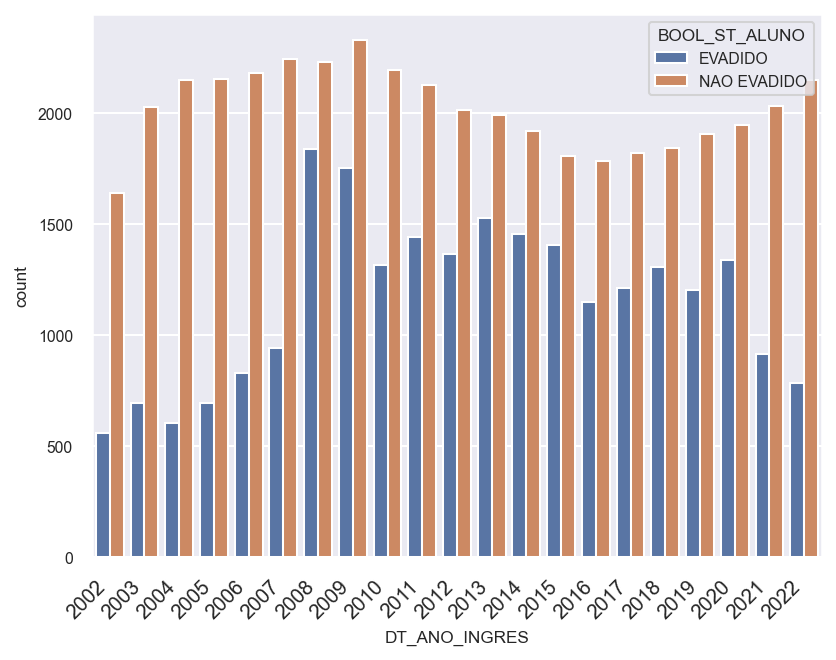

In [62]:
vis = sns.countplot(x='DT_ANO_INGRES', hue='BOOL_ST_ALUNO', data=df_selecionado)
# for container in vis.containers:
#         vis.bar_label(container)
plt.xticks(rotation=45, ha="right", fontsize=10)

plt.show()

<Axes: xlabel='DT_ANO_INGRES'>

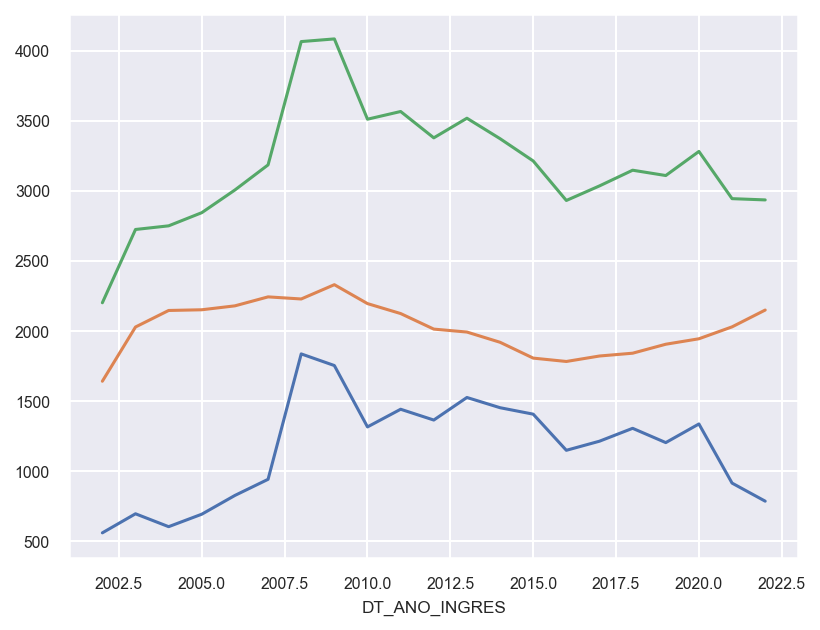

In [63]:
evadidos = df_selecionado[df_selecionado['BOOL_ST_ALUNO'] == 'EVADIDO']['DT_ANO_INGRES'].value_counts().sort_index()
nao_evadidos = df_selecionado[df_selecionado['BOOL_ST_ALUNO'] == 'NAO EVADIDO']['DT_ANO_INGRES'].value_counts().sort_index()
sns.lineplot(x=evadidos.index, y=evadidos.values)
sns.lineplot(x=nao_evadidos.index, y=nao_evadidos.values)
sns.lineplot(x=nao_evadidos.index, y=nao_evadidos.values+evadidos.values)

In [227]:
df_selecionado.columns

Index(['CD_ALUNO', 'CD_CURSO', 'CD_TURNO', 'DH_MATRICULA', 'DH_SITUACAO',
       'DT_ANO_INGRES', 'DT_NASC_ALUNO', 'LT_ESTADO_CIVIL', 'LT_RACA',
       'F_NU_SEMESTRE2_VEST', 'TP_INGRES_CURSO', 'SG_SEXO_ALUNO',
       'F_NM_PAIS_NASC', 'F_SG_UF_NASC_ALUNO', 'F_SG_UF_FERIAS',
       'BOOL_TRANCADO', 'BOOL_ST_ALUNO', 'MULTI_ST_ALUNO', 'BOOL_DEFIC_INEP',
       'F_TP_ESCOLA', 'F_TP_OPCAO_COTAS', 'BOOL_COTAS', 'IDADE_MATRICULA',
       'ANO_NASCIMENTO', 'MESES_ATE_ULTIMA_SITUACAO', 'LOCAL_FERIAS',
       'LOCAL_NASC', 'NM_CURSO', 'TP_HABILITACAO', 'SG_CENTRO', 'NM_CAMPUS',
       'MAX_ANOS', 'GERACAO_COMPLETA', 'NUMERO_GERACAO', 'BOOL_SEDE',
       'FORMA_INGRESSO'],
      dtype='object')

In [233]:
np.sort(df_selecionado['DT_ANO_INGRES'].unique())

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

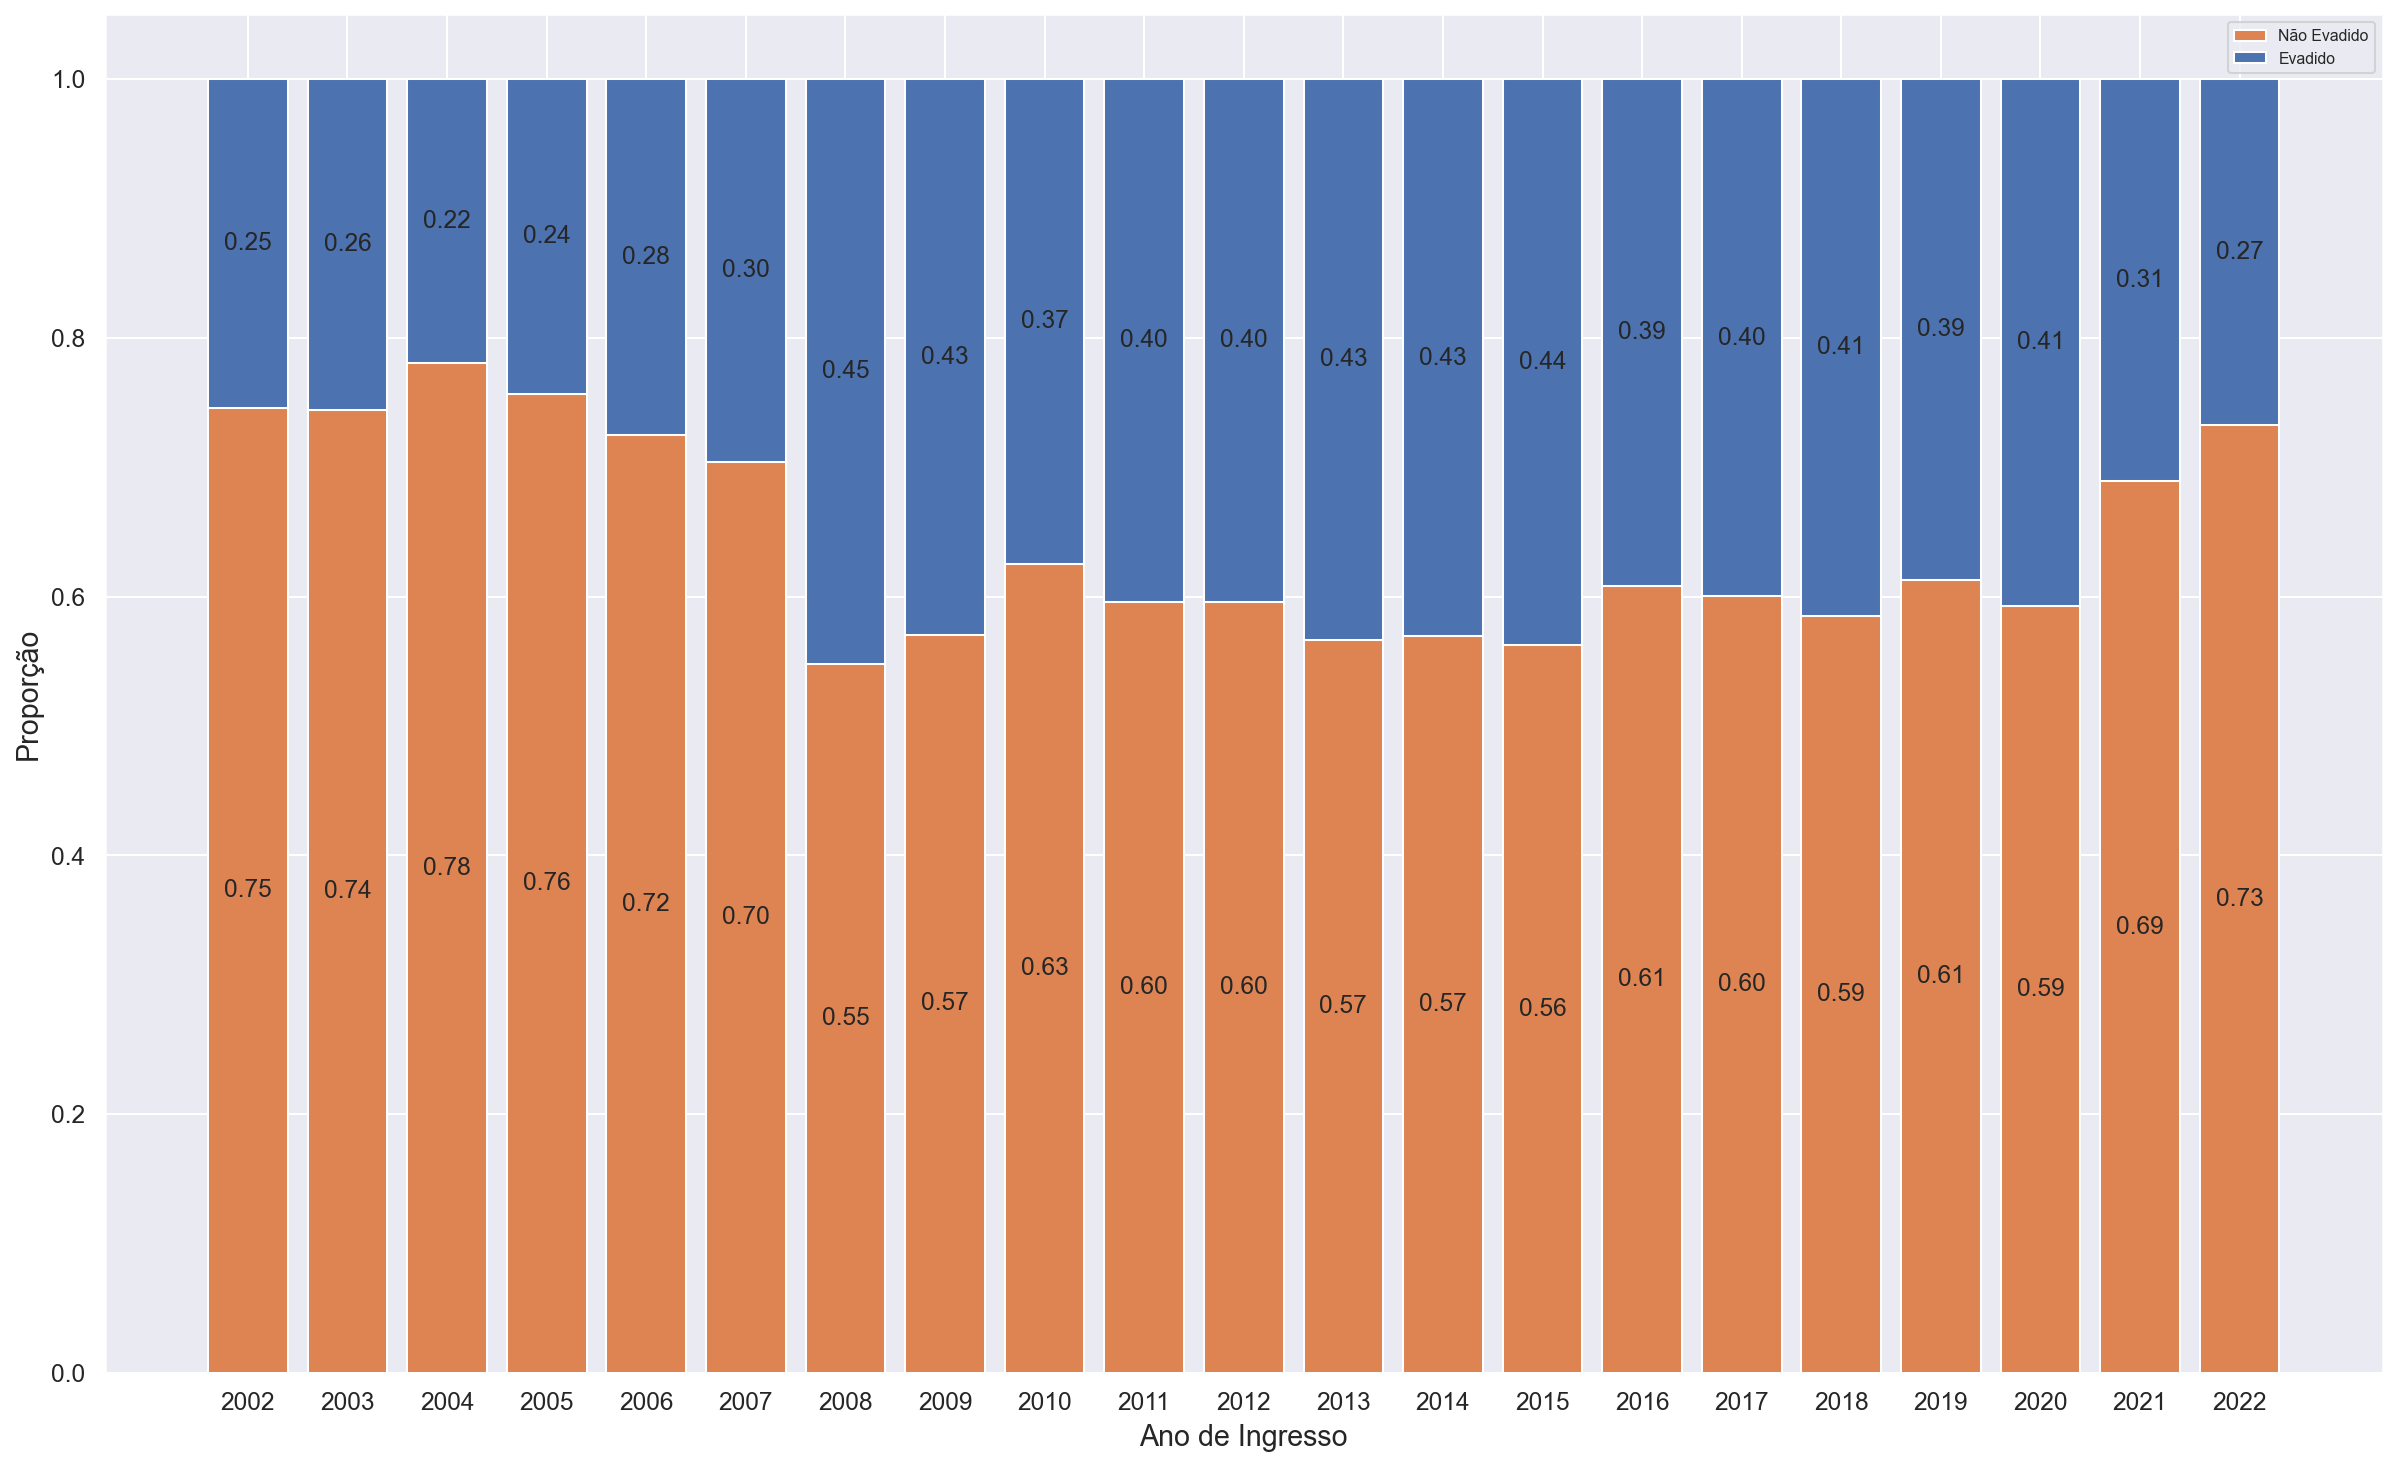

In [241]:
df_ano_ingresso_pct = df_selecionado.groupby('DT_ANO_INGRES')['BOOL_ST_ALUNO'].value_counts(normalize=True).reset_index().rename(columns={'proportion': 'Proporcao'})
df_ano_ingresso_pct_2 = df_ano_ingresso_pct.pivot_table(index='DT_ANO_INGRES', columns='BOOL_ST_ALUNO', values='Proporcao').reset_index()

# Ordenar o DataFrame com base nos valores de 'NAO EVADIDO' em ordem decrescente
df_ano_ingresso_pct_2 = df_ano_ingresso_pct_2.sort_values(by='NAO EVADIDO', ascending=False)

# Plotar o gráfico com os dados já ordenados
plt.figure(figsize=(20, 12))

bar1 = plt.bar(df_ano_ingresso_pct_2['DT_ANO_INGRES'], df_ano_ingresso_pct_2['NAO EVADIDO'], 
               label='Não Evadido', color='#dd8452')

bar2 = plt.bar(df_ano_ingresso_pct_2['DT_ANO_INGRES'], df_ano_ingresso_pct_2['EVADIDO'], 
               bottom=df_ano_ingresso_pct_2['NAO EVADIDO'], label='Evadido', color='#4c72b0')

# Adicionar os valores nas barras
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, 
             rect.get_y() + height / 2.0, f'{height:.2f}', 
             ha='center', va='center', fontsize=12)

# Ajustar as labels no eixo X
plt.xticks(np.sort(df_selecionado['DT_ANO_INGRES'].unique()), fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Ano de Ingresso', fontsize=14)
plt.ylabel('Proporção', fontsize=14)

# Exibir a legenda e o gráfico
plt.legend()
plt.show()

In [242]:
get_df_geracoes_completas(df_selecionado)['DT_ANO_INGRES'].value_counts().sort_index()

DT_ANO_INGRES
2002    2202
2003    2725
2004    2751
2005    2845
2006    3007
2007    3186
2008    4066
2009    4085
2010    3512
2011    3567
2012    3379
2013    3519
2014    2666
2015     621
2016      65
2017      53
Name: count, dtype: int64

### Por idade no ingresso

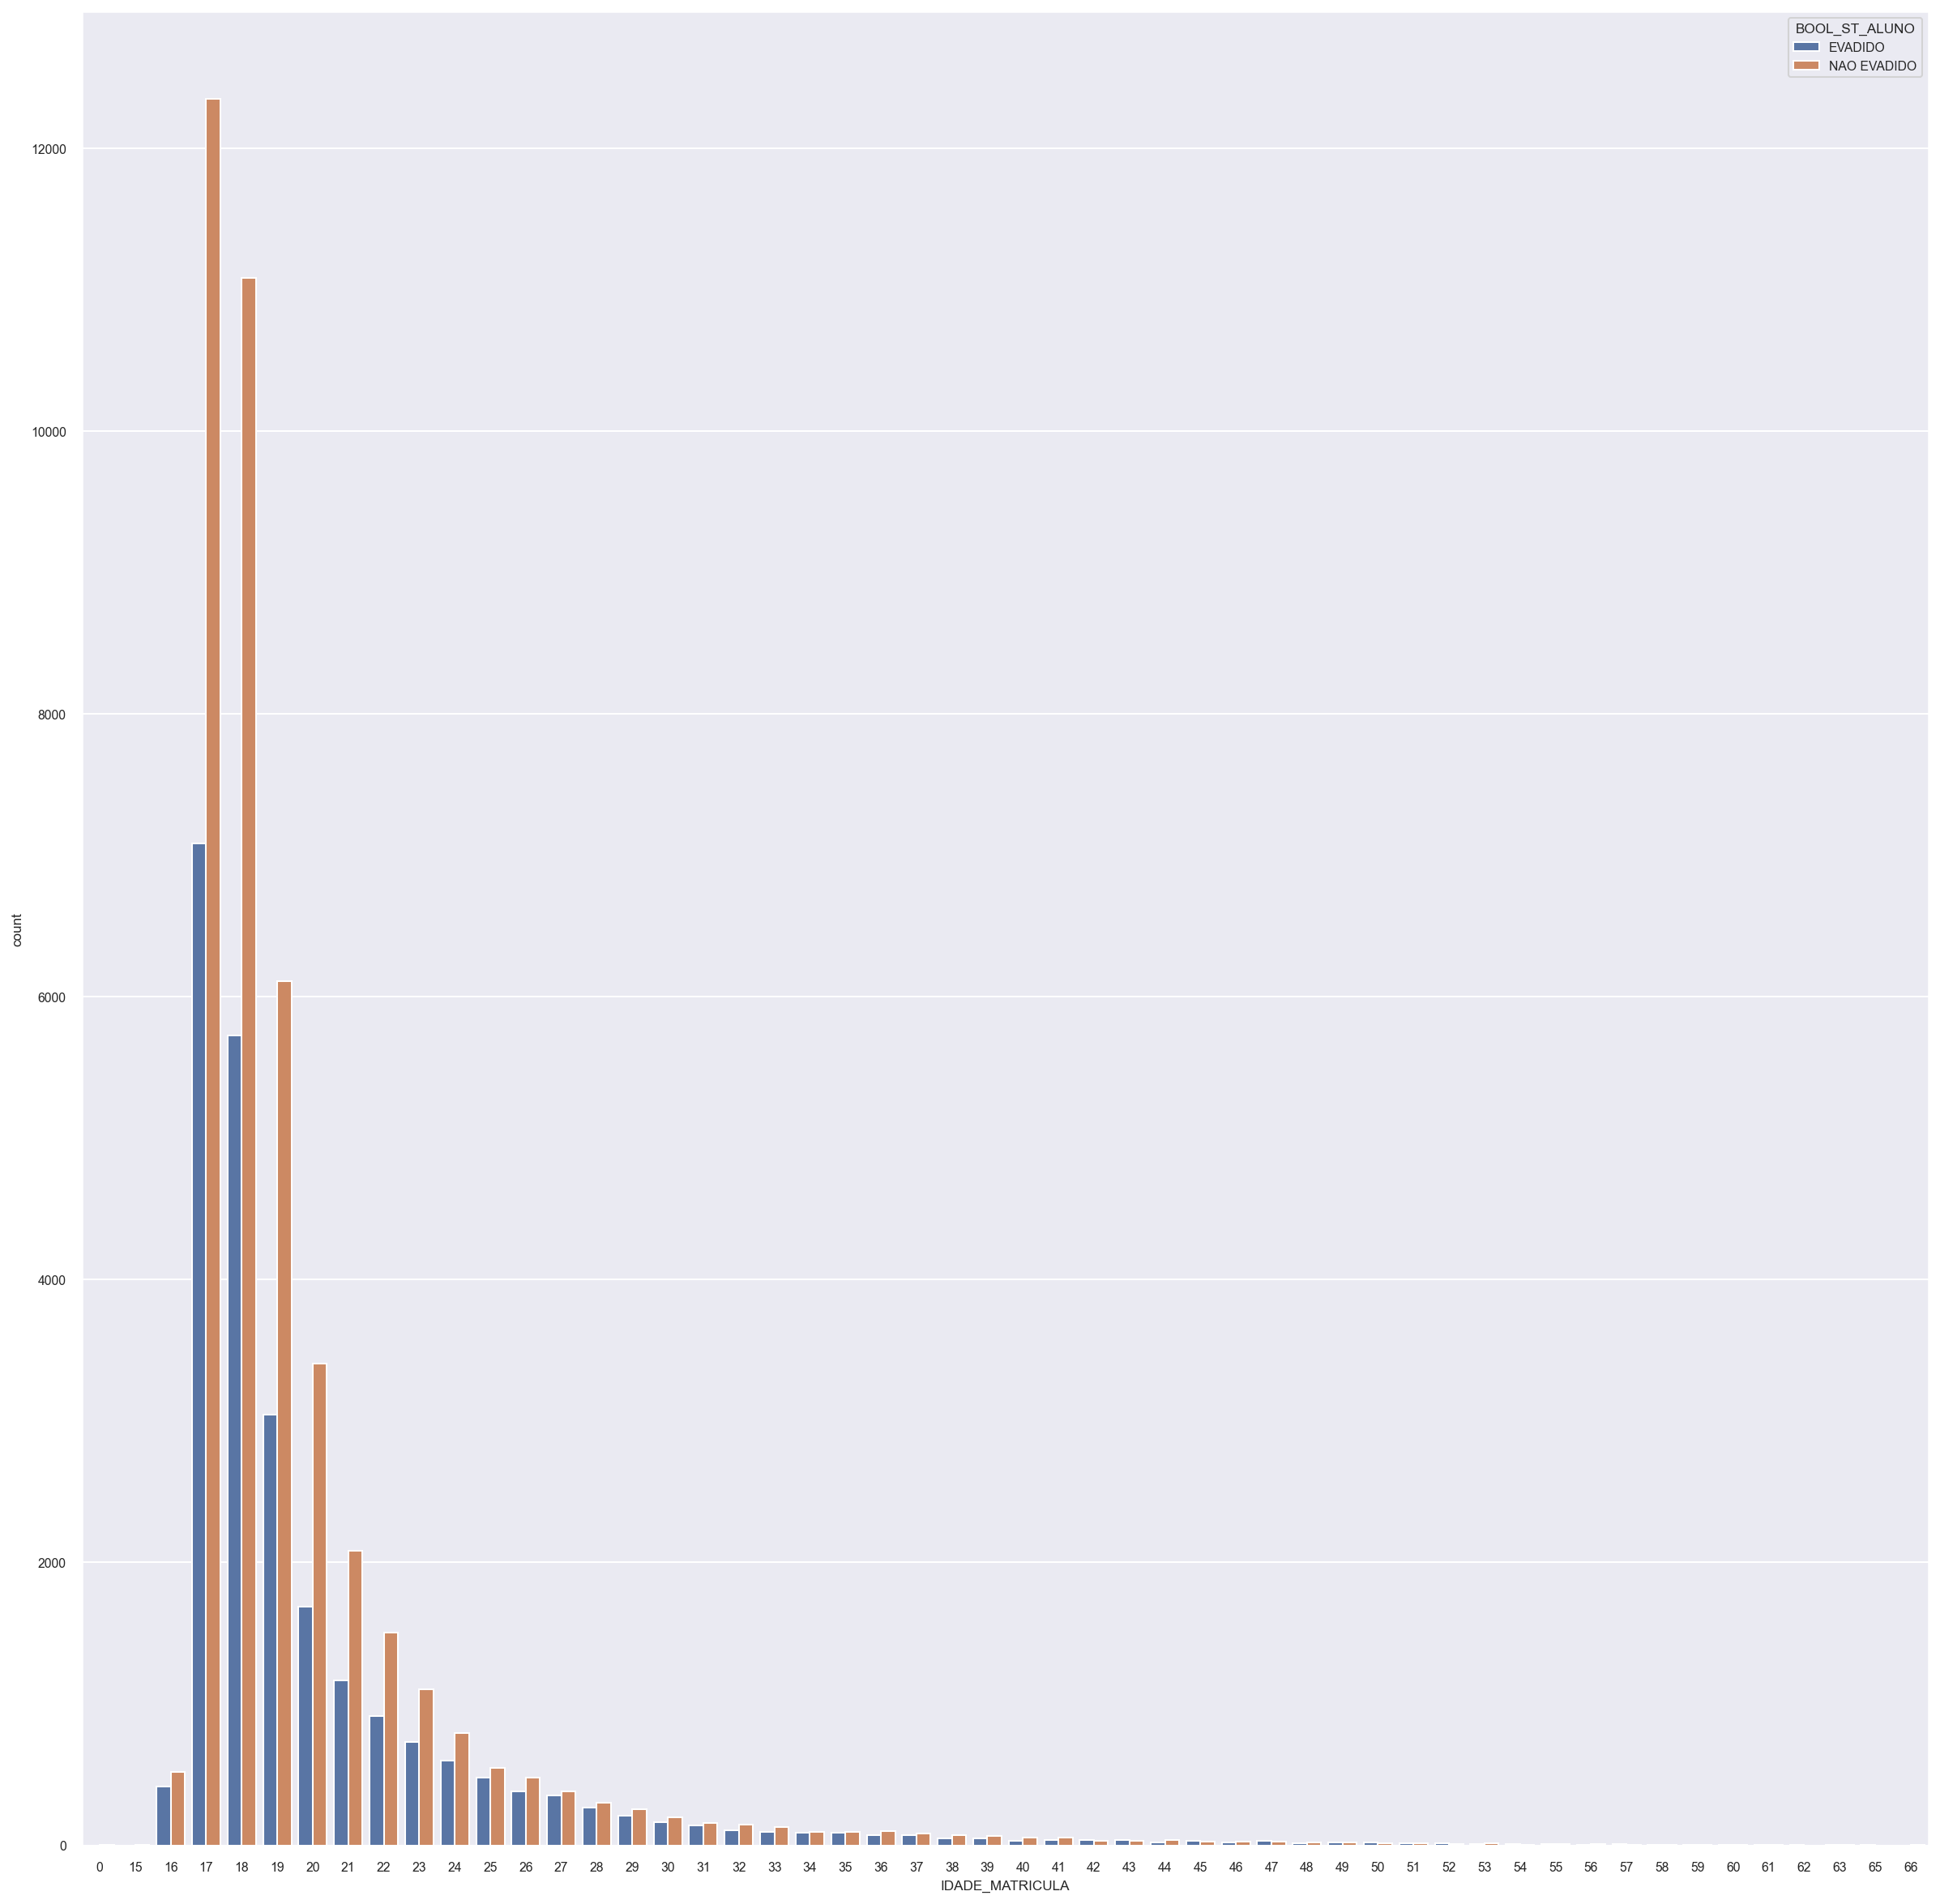

In [64]:
plt.figure(figsize=(20, 20))
vis = sns.countplot(x='IDADE_MATRICULA', hue='BOOL_ST_ALUNO', data=df_selecionado)
# for container in vis.containers:
#         vis.bar_label(container)
plt.show()

### Por Campus

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)


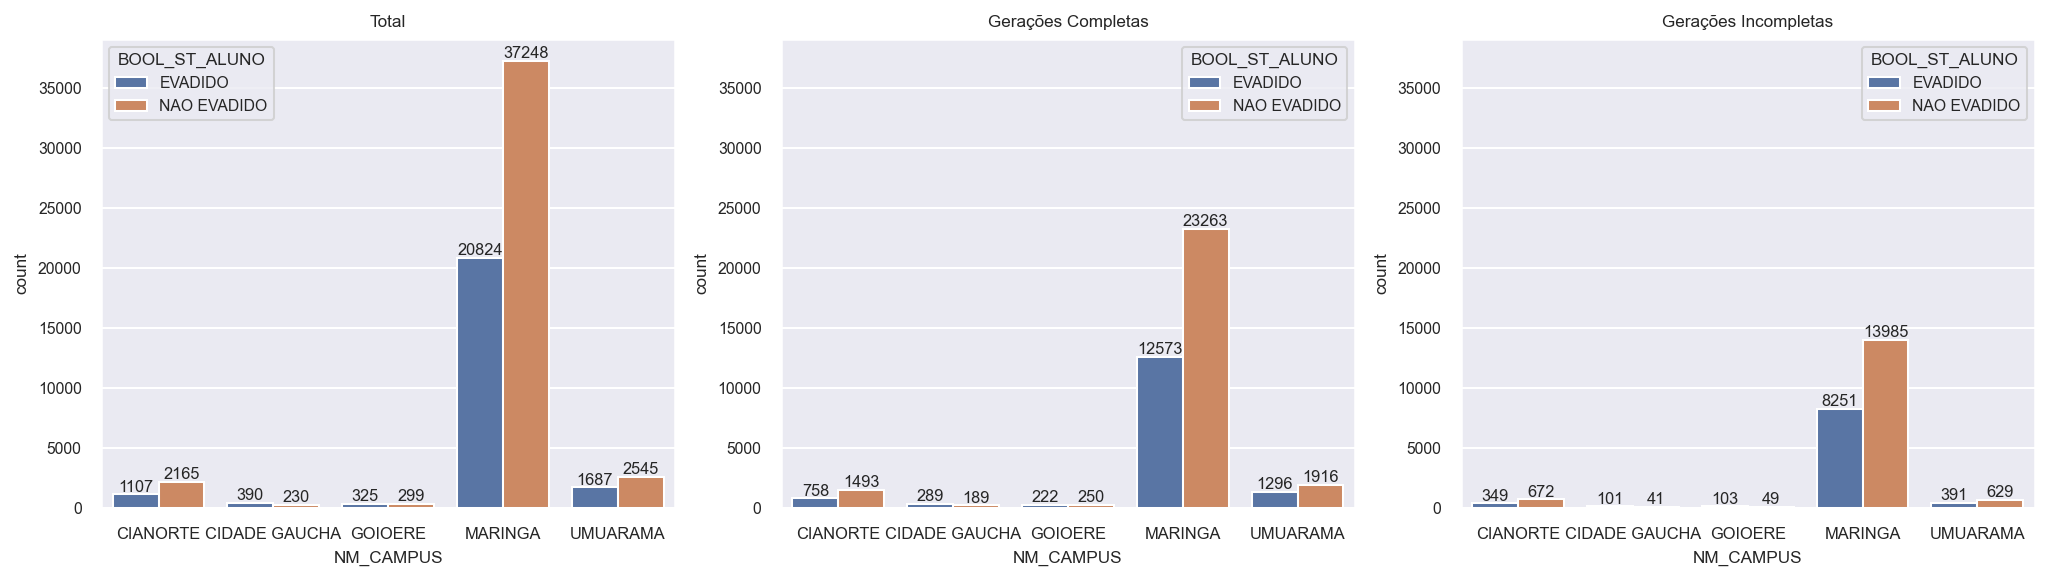

In [65]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, 'NM_CAMPUS')

In [66]:
# vis = sns.countplot(x='NM_CAMPUS', hue='BOOL_ST_ALUNO', data=df_selecionado)
# for container in vis.containers:
#         vis.bar_label(container)
# plt.show()

In [67]:
df_selecionado[df_selecionado['MULTI_ST_ALUNO'] == 'TRANSFERENCIA']['NM_CAMPUS'].value_counts().sort_index(), df_selecionado['NM_CAMPUS'].value_counts().sort_index()

(NM_CAMPUS
 CIANORTE          43
 CIDADE GAUCHA     27
 GOIOERE           20
 MARINGA          599
 UMUARAMA          41
 Name: count, dtype: int64,
 NM_CAMPUS
 CIANORTE          3272
 CIDADE GAUCHA      620
 GOIOERE            624
 MARINGA          58072
 UMUARAMA          4232
 Name: count, dtype: int64)

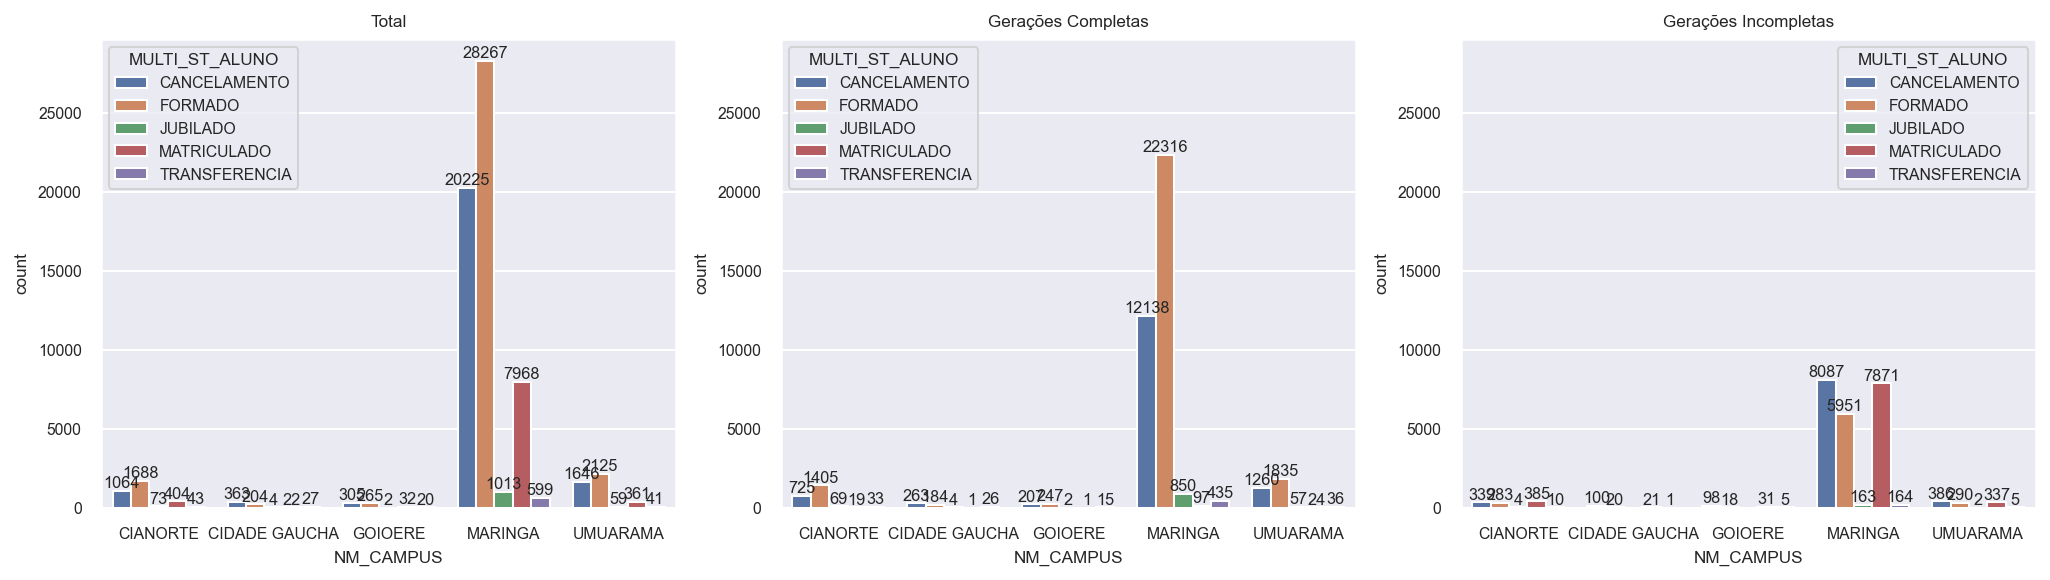

In [68]:
vis_filtro_situacao_multiclasse(df_selecionado, 'NM_CAMPUS')

In [69]:
# vis = sns.countplot(x='NM_CAMPUS', hue='MULTI_ST_ALUNO', data=df_selecionado)
# for container in vis.containers:
#         vis.bar_label(container)
# plt.show()

### Por local de férias

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

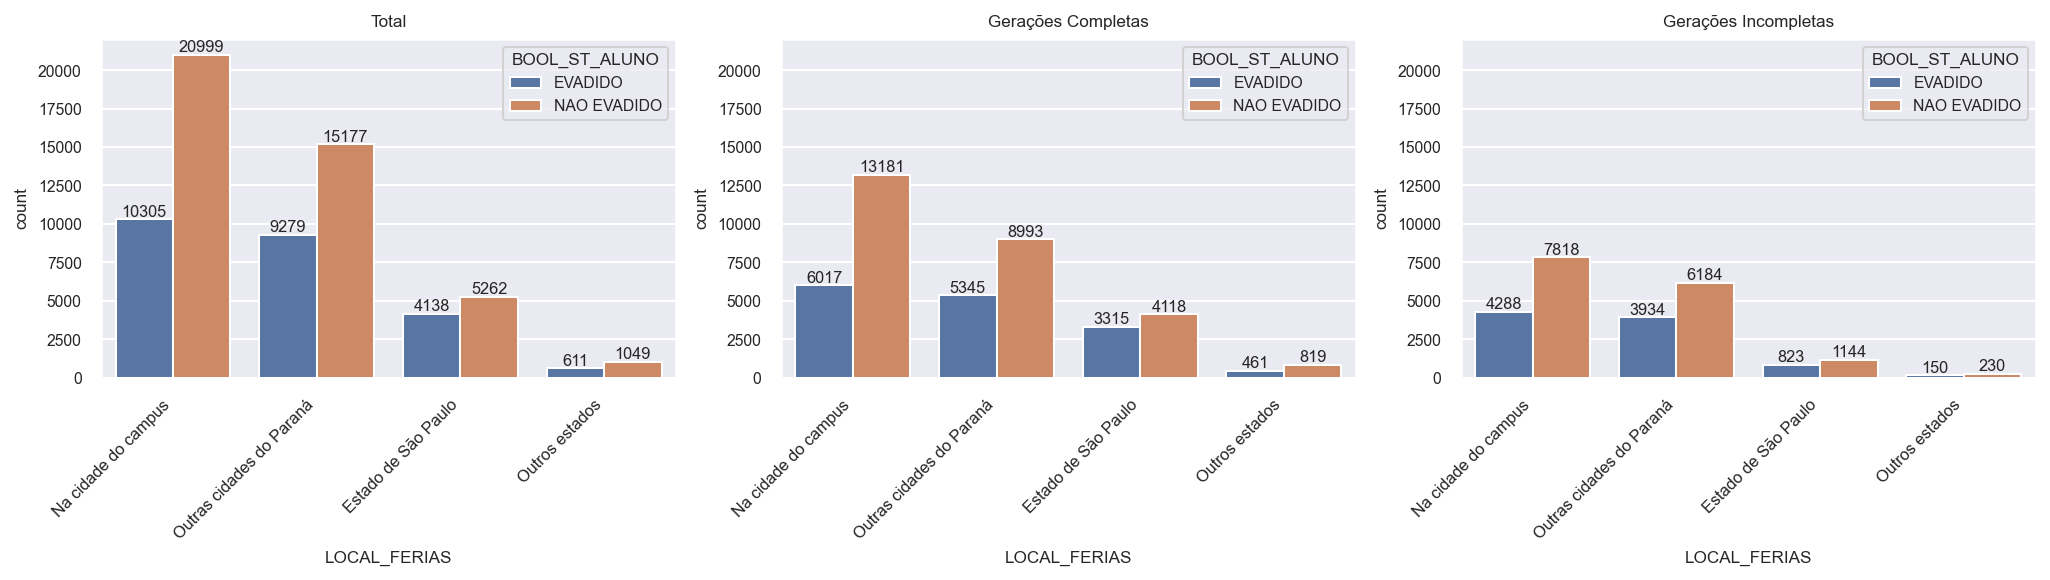

In [70]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, 'LOCAL_FERIAS', overlap=True)

Ver evadidos de SP e outros estados comparando com evadidos do PR

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')


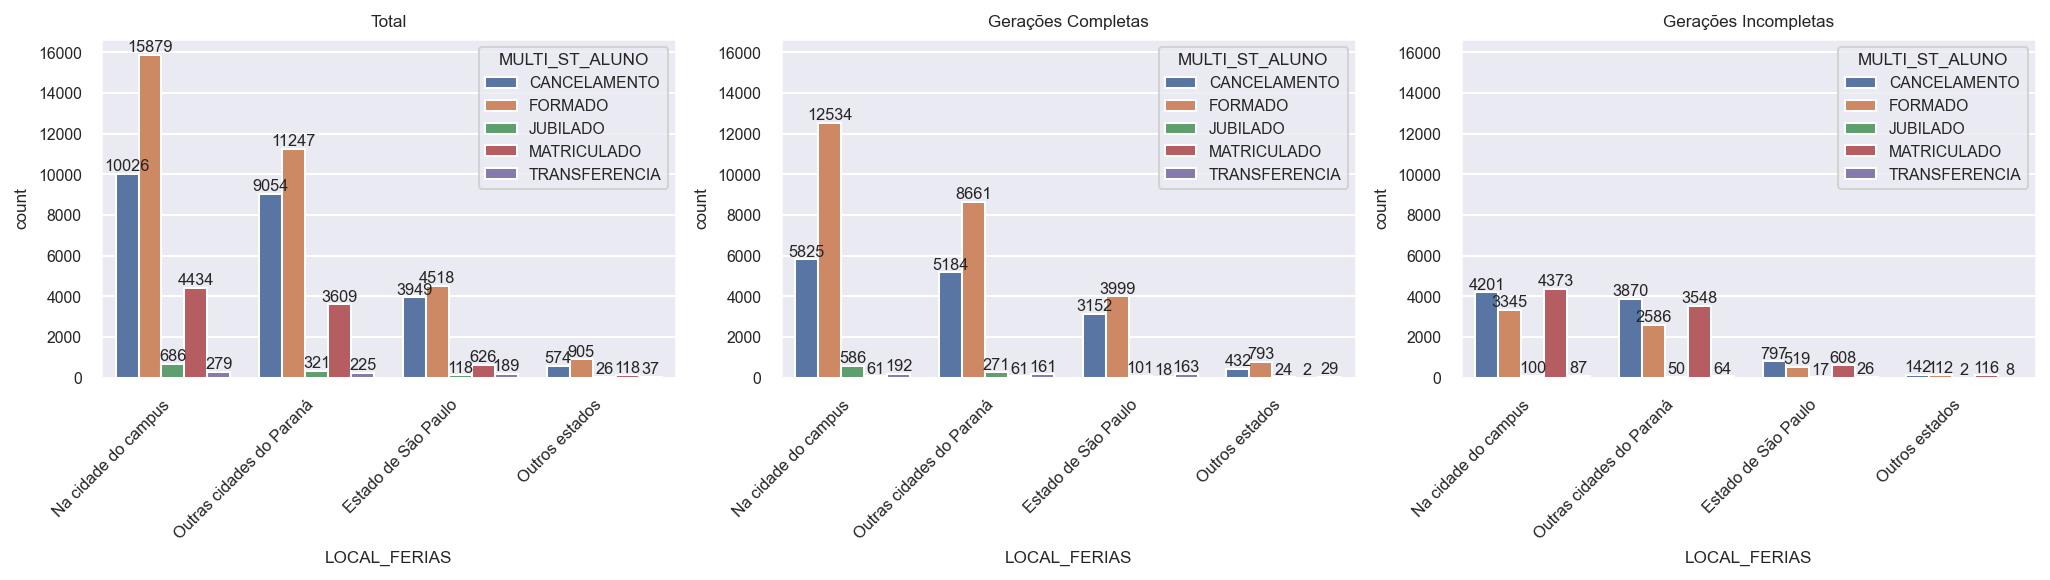

In [71]:
vis_filtro_situacao_multiclasse(df_selecionado, 'LOCAL_FERIAS', overlap=True)

In [212]:
df_selecionado['LOCAL_FERIAS'].value_counts(normalize=True)

LOCAL_FERIAS
Na cidade do campus         0.468482
Outras cidades do Paraná    0.365998
Estado de São Paulo         0.140676
Outros estados              0.024843
Name: proportion, dtype: float64

In [214]:
df_selecionado.groupby('LOCAL_FERIAS')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\1093173583.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('LOCAL_FERIAS')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()


LOCAL_FERIAS              BOOL_ST_ALUNO
Na cidade do campus       EVADIDO          0.329191
                          NAO EVADIDO      0.670809
Outras cidades do Paraná  EVADIDO          0.379416
                          NAO EVADIDO      0.620584
Estado de São Paulo       EVADIDO          0.440213
                          NAO EVADIDO      0.559787
Outros estados            EVADIDO          0.368072
                          NAO EVADIDO      0.631928
Name: proportion, dtype: float64

#### Estado de São Paulo

In [72]:
df_sp = df_selecionado[df_selecionado['LOCAL_FERIAS'] == 'Estado de São Paulo'].copy()

In [73]:
df_sp.shape[0]

9400

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\899012389.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, 'Letras'),
 Text(1, 0, 'Medicina Veterinária - CAU'),
 Text(2, 0, 'Ciências Econômicas'),
 Text(3, 0, 'Direito'),
 Text(4, 0, 'Geografia'),
 Text(5, 0, 'História'),
 Text(6, 0, 'Química'),
 Text(7, 0, 'Engenharia Química'),
 Text(8, 0, 'Matemática'),
 Text(9, 0, 'Administração'),
 Text(10, 0, 'Engenharia Civil'),
 Text(11, 0, 'Educação Física'),
 Text(12, 0, 'Ciências Contábeis'),
 Text(13, 0, 'Pedagogia'),
 Text(14, 0, 'Ciências Biológicas'),
 Text(15, 0, 'Física'),
 Text(16, 0, 'Farmácia'),
 Text(17, 0, 'Zootecnia'),
 Text(18, 0, 'Agronomia'),
 Text(19, 0, 'Psicologia'),
 Text(20, 0, 'Medicina'),
 Text(21, 0, 'Odontologia'),
 Text(22, 0, 'Ciência da Computação'),
 Text(23, 0, 'Engenharia Têxtil - CRG'),
 Text(24, 0, 'Enfermagem'),
 Text(25, 0, 'Informática'),
 Text(26, 0, 'Engenharia Mecânica'),
 Text(27, 0, 'Engenharia de Alimentos'),
 Text(28, 0, 'Engenharia de Produção'),
 Text(29, 0, 'Arquitetura e Urbanismo'),
 Text(30, 0, 'Estatística'),
 Text(31, 0, 'Secretariado E

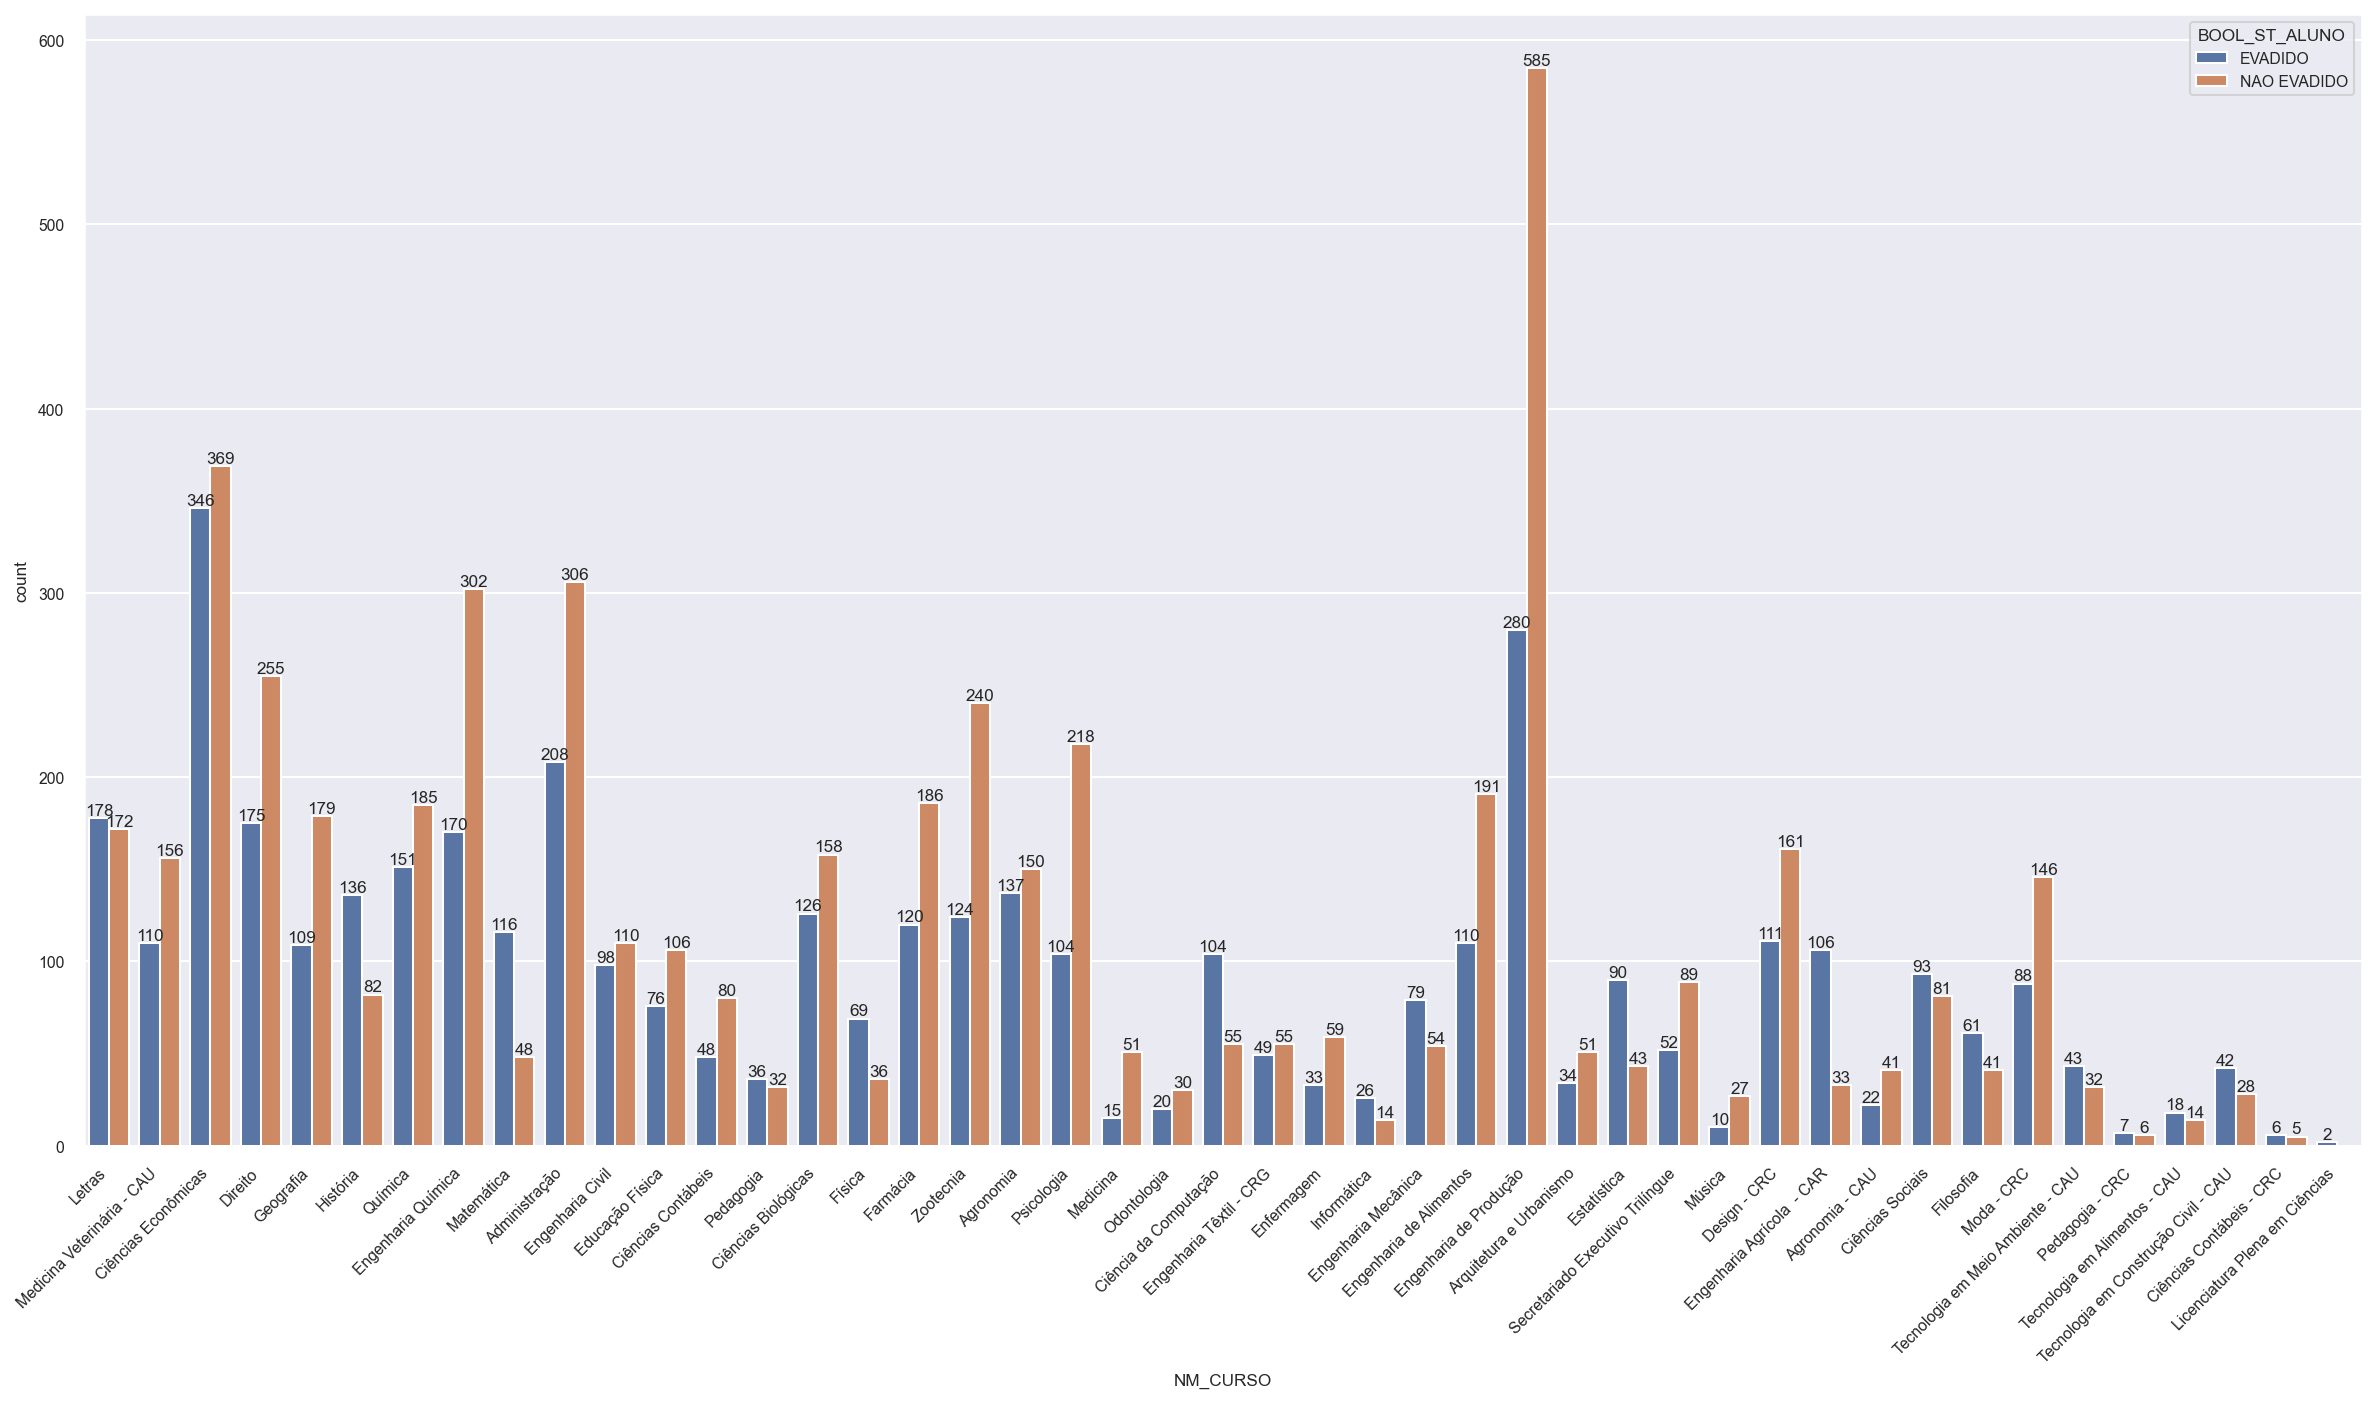

In [74]:
plt.figure(figsize=(20, 10))
grafico = sns.countplot(data=df_sp, x='NM_CURSO', hue='BOOL_ST_ALUNO')
for container in grafico.containers:
    grafico.bar_label(container)
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha='right')

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

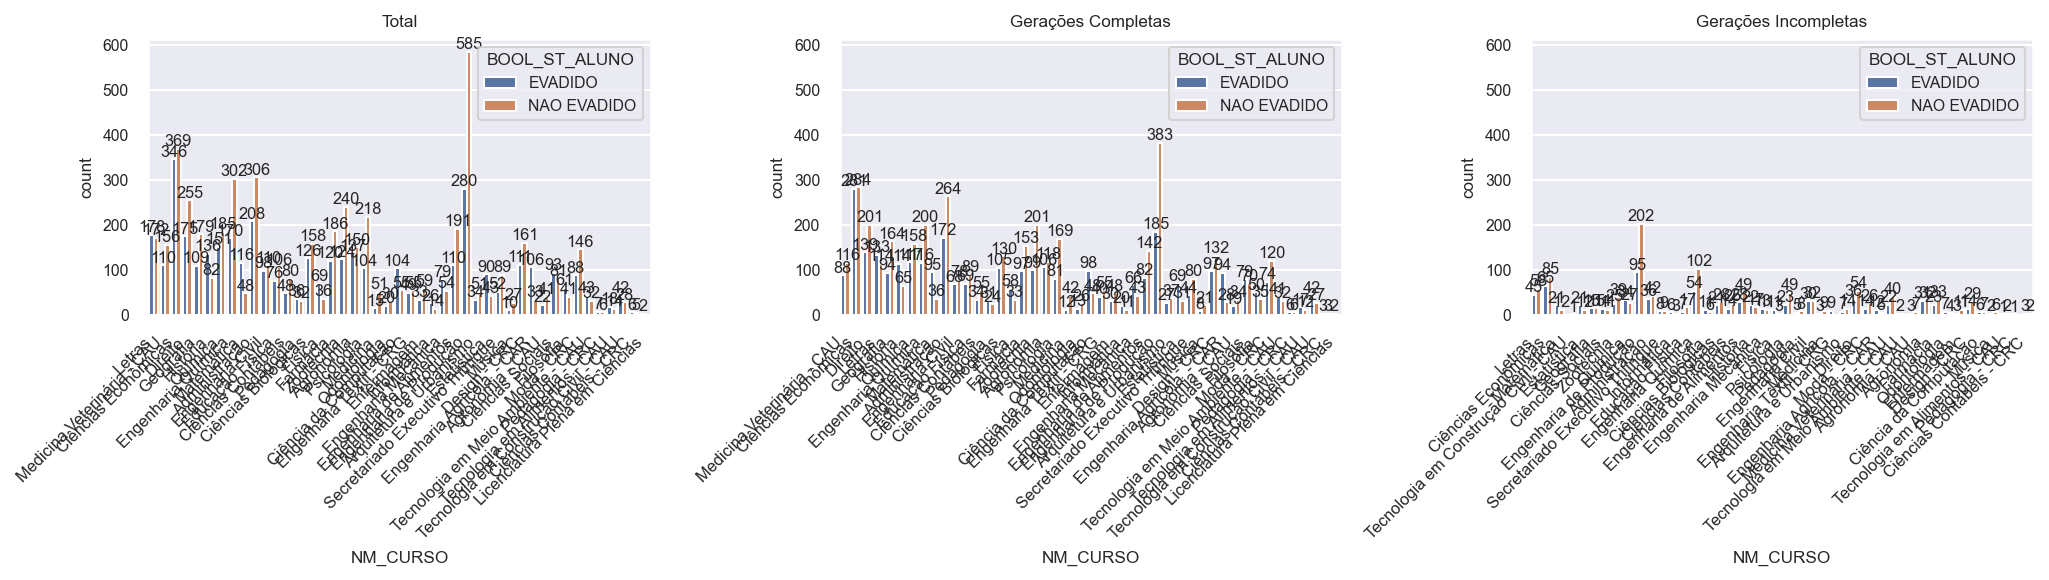

In [75]:
vis_filtro_evadidos_x_nao_evadidos(df_sp, 'NM_CURSO', overlap=True)

### Por cotas

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)


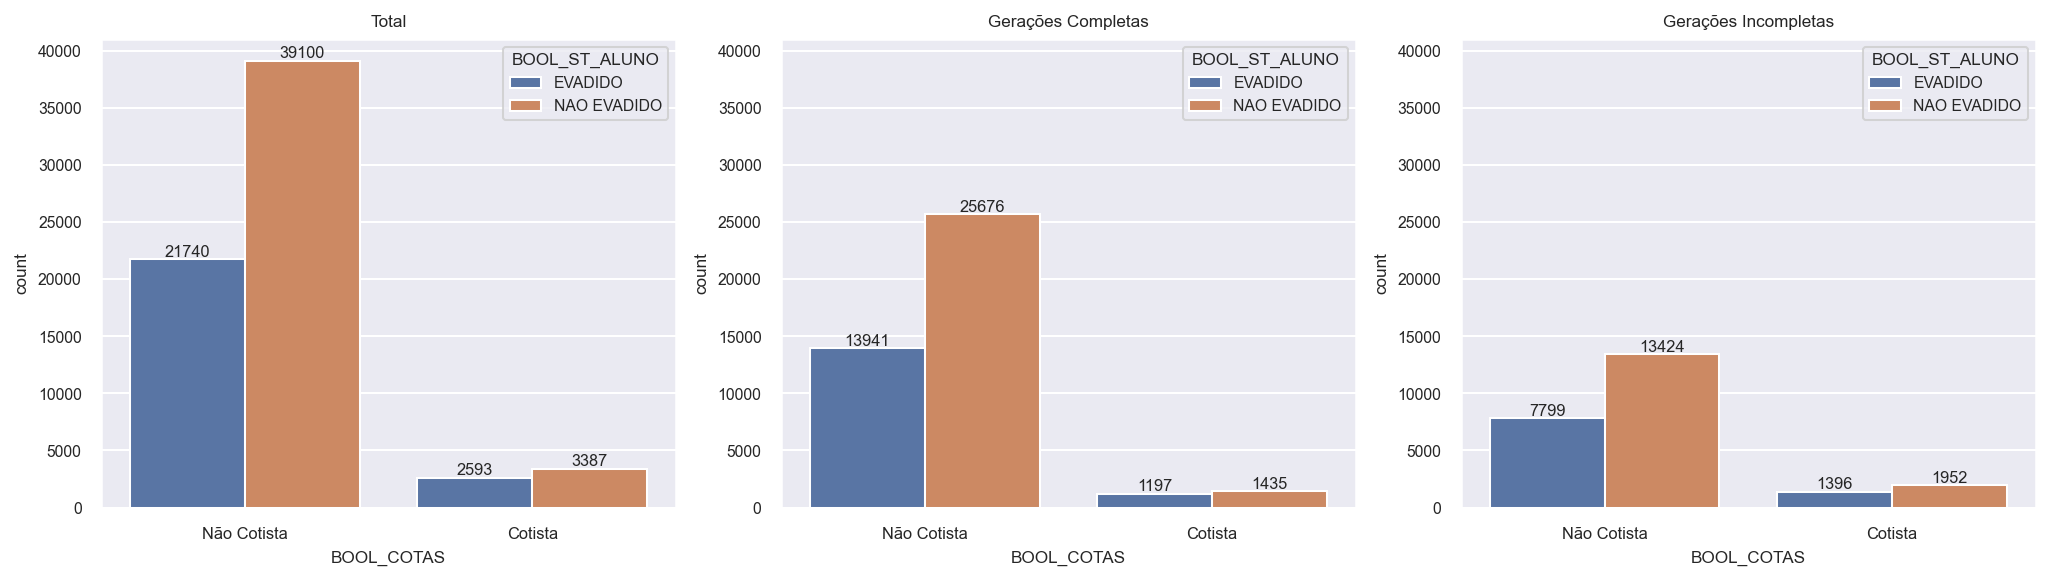

In [76]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, 'BOOL_COTAS')

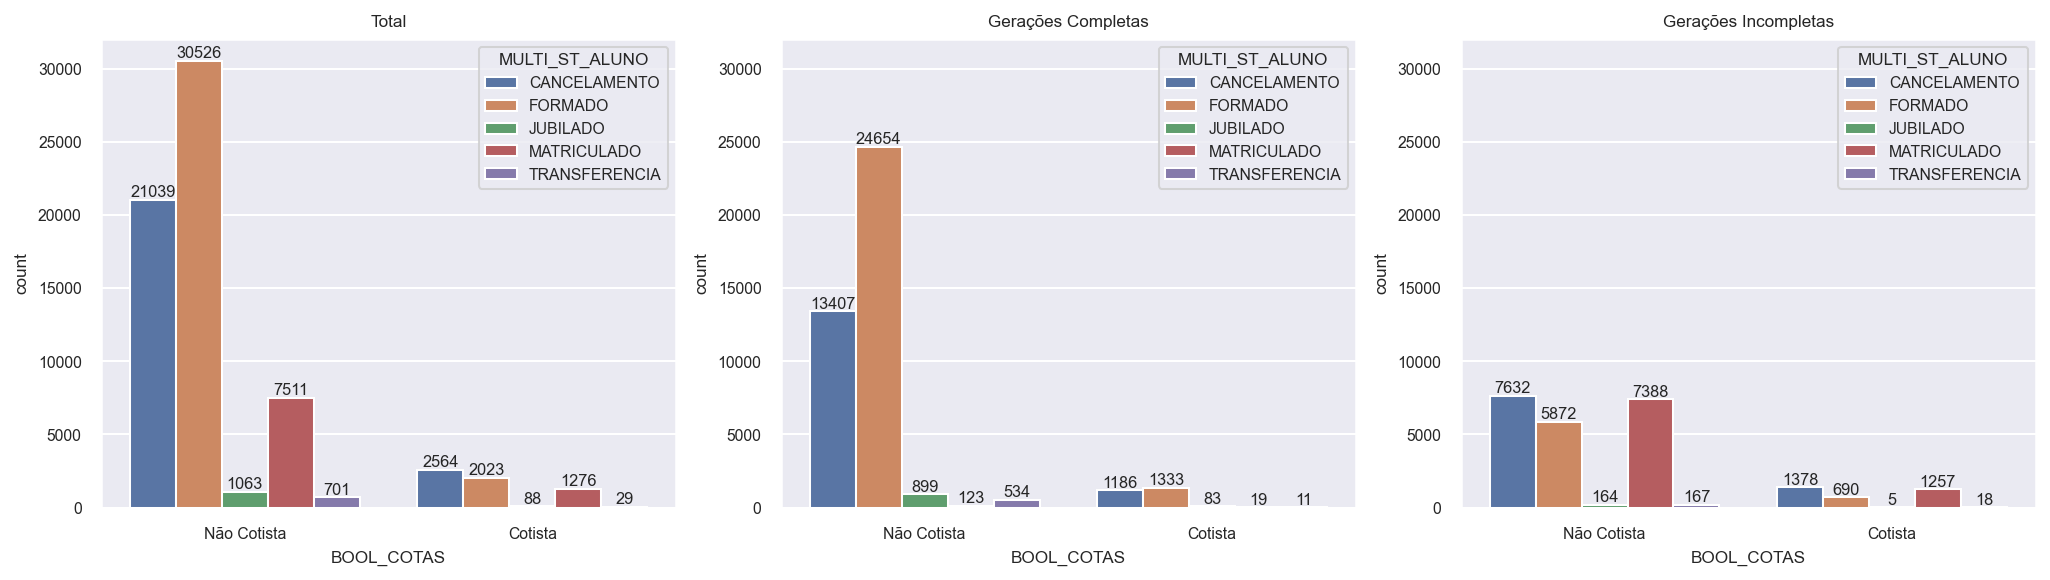

In [77]:
vis_filtro_situacao_multiclasse(df_selecionado, 'BOOL_COTAS')

In [222]:
df_selecionado['BOOL_COTAS'].value_counts()

BOOL_COTAS
Não Cotista    60840
Cotista         5980
Name: count, dtype: int64

In [226]:
df_selecionado.groupby('BOOL_COTAS')['BOOL_ST_ALUNO'].value_counts(normalize=False).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\3581249027.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('BOOL_COTAS')['BOOL_ST_ALUNO'].value_counts(normalize=False).sort_index()


BOOL_COTAS   BOOL_ST_ALUNO
Não Cotista  EVADIDO          21740
             NAO EVADIDO      39100
Cotista      EVADIDO           2593
             NAO EVADIDO       3387
Name: count, dtype: int64

### Por raça

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

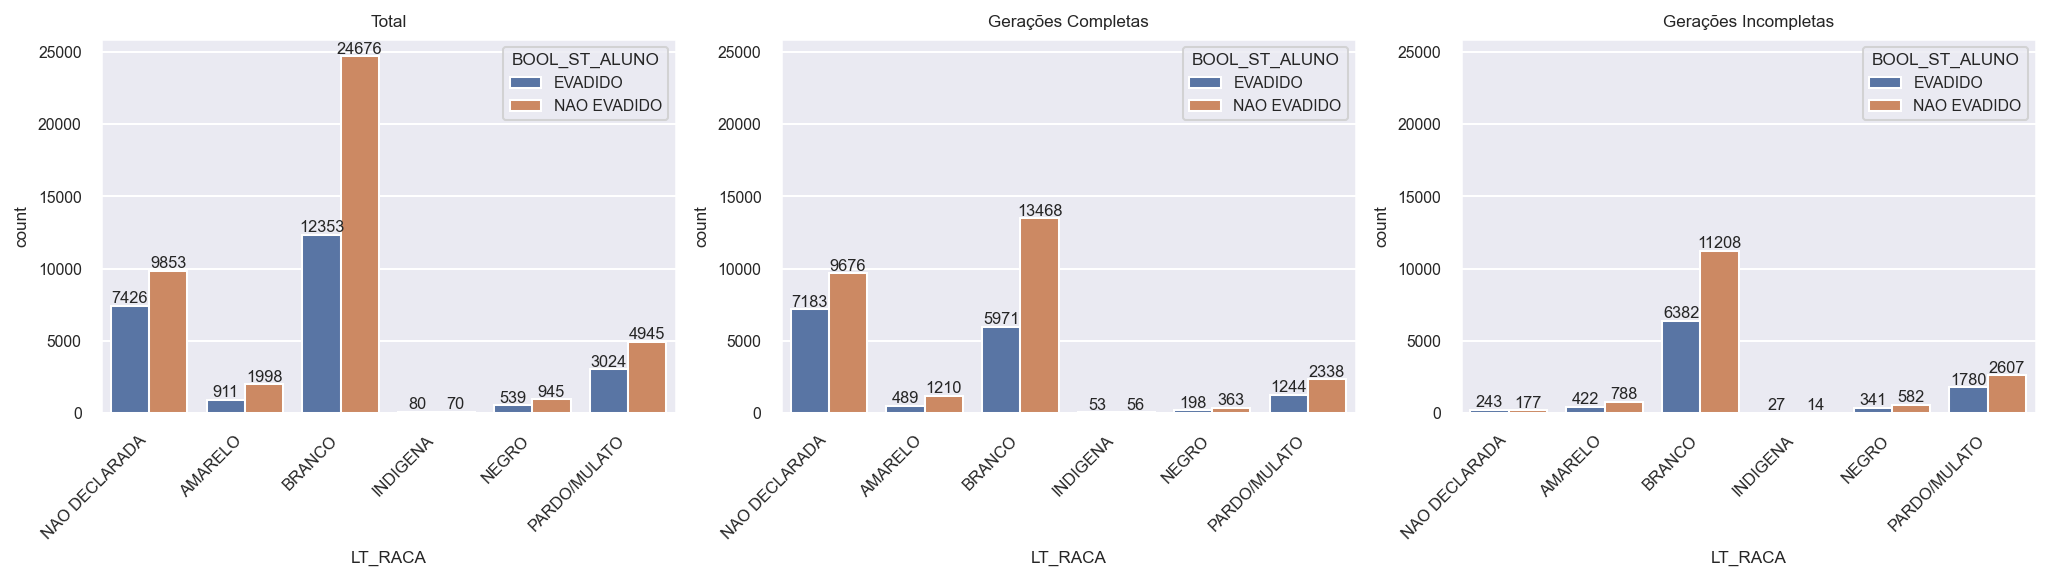

In [202]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, 'LT_RACA', overlap=True)

Indígena e não declarada 

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\30226393.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), fontsize=8, ha='right')


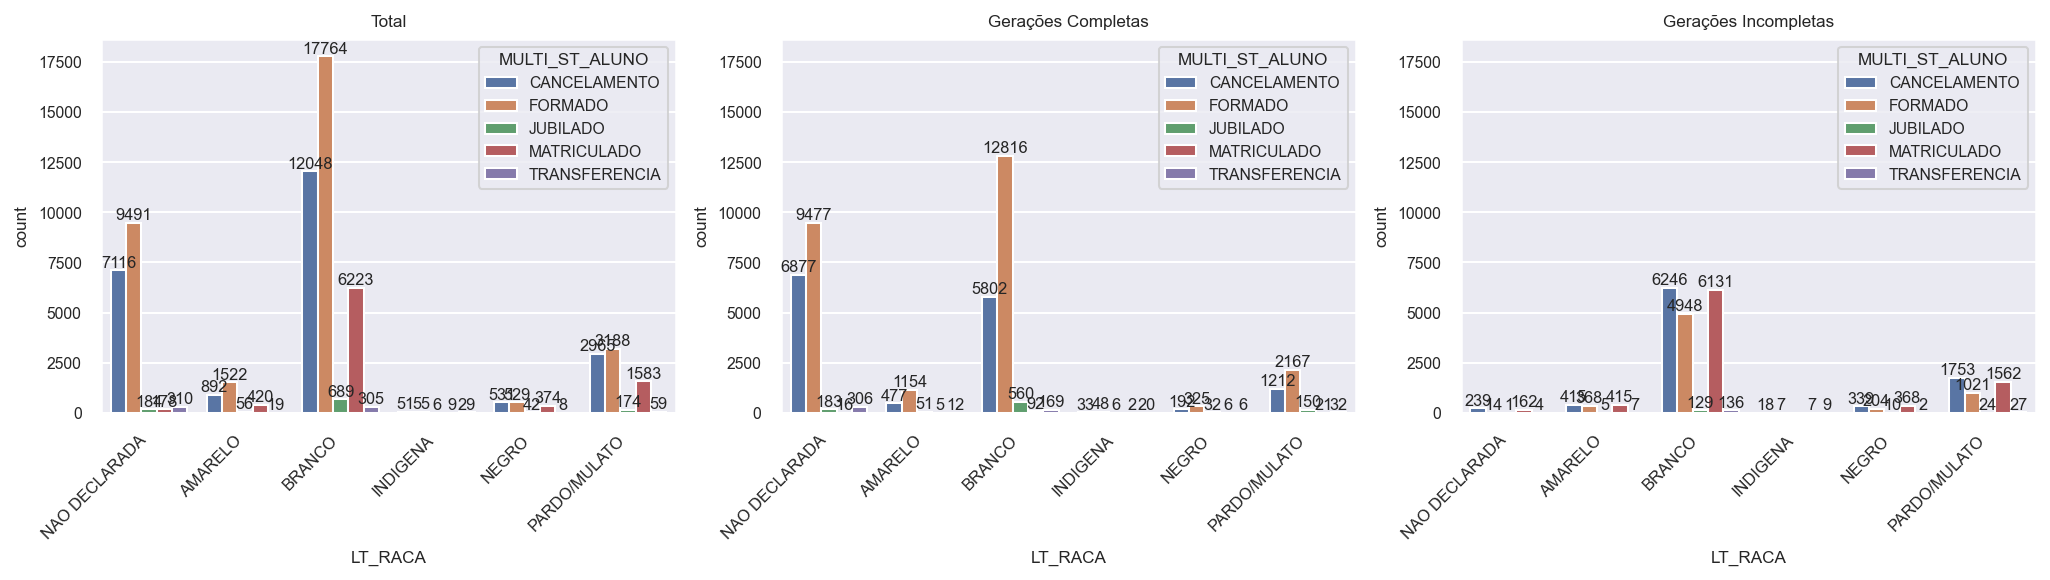

In [206]:
vis_filtro_situacao_multiclasse(df_selecionado, 'LT_RACA', overlap=True)

In [205]:
df_selecionado.groupby('LT_RACA')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\4061943987.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('LT_RACA')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()


LT_RACA        BOOL_ST_ALUNO
NAO DECLARADA  EVADIDO          0.429770
               NAO EVADIDO      0.570230
AMARELO        EVADIDO          0.313166
               NAO EVADIDO      0.686834
BRANCO         EVADIDO          0.333603
               NAO EVADIDO      0.666397
INDIGENA       EVADIDO          0.533333
               NAO EVADIDO      0.466667
NEGRO          EVADIDO          0.363208
               NAO EVADIDO      0.636792
PARDO/MULATO   EVADIDO          0.379470
               NAO EVADIDO      0.620530
Name: proportion, dtype: float64

In [209]:
df_selecionado['LT_RACA'].value_counts(normalize=False)

LT_RACA
BRANCO           37029
NAO DECLARADA    17279
PARDO/MULATO      7969
AMARELO           2909
NEGRO             1484
INDIGENA           150
Name: count, dtype: int64

In [208]:
df_selecionado['LT_RACA'].value_counts(normalize=True)

LT_RACA
BRANCO           0.554160
NAO DECLARADA    0.258590
PARDO/MULATO     0.119261
AMARELO          0.043535
NEGRO            0.022209
INDIGENA         0.002245
Name: proportion, dtype: float64

### Por sexo

In [190]:
df_selecionado['SG_SEXO_ALUNO'].value_counts(normalize=True)

SG_SEXO_ALUNO
Feminino     0.525127
Masculino    0.474873
Name: proportion, dtype: float64

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)


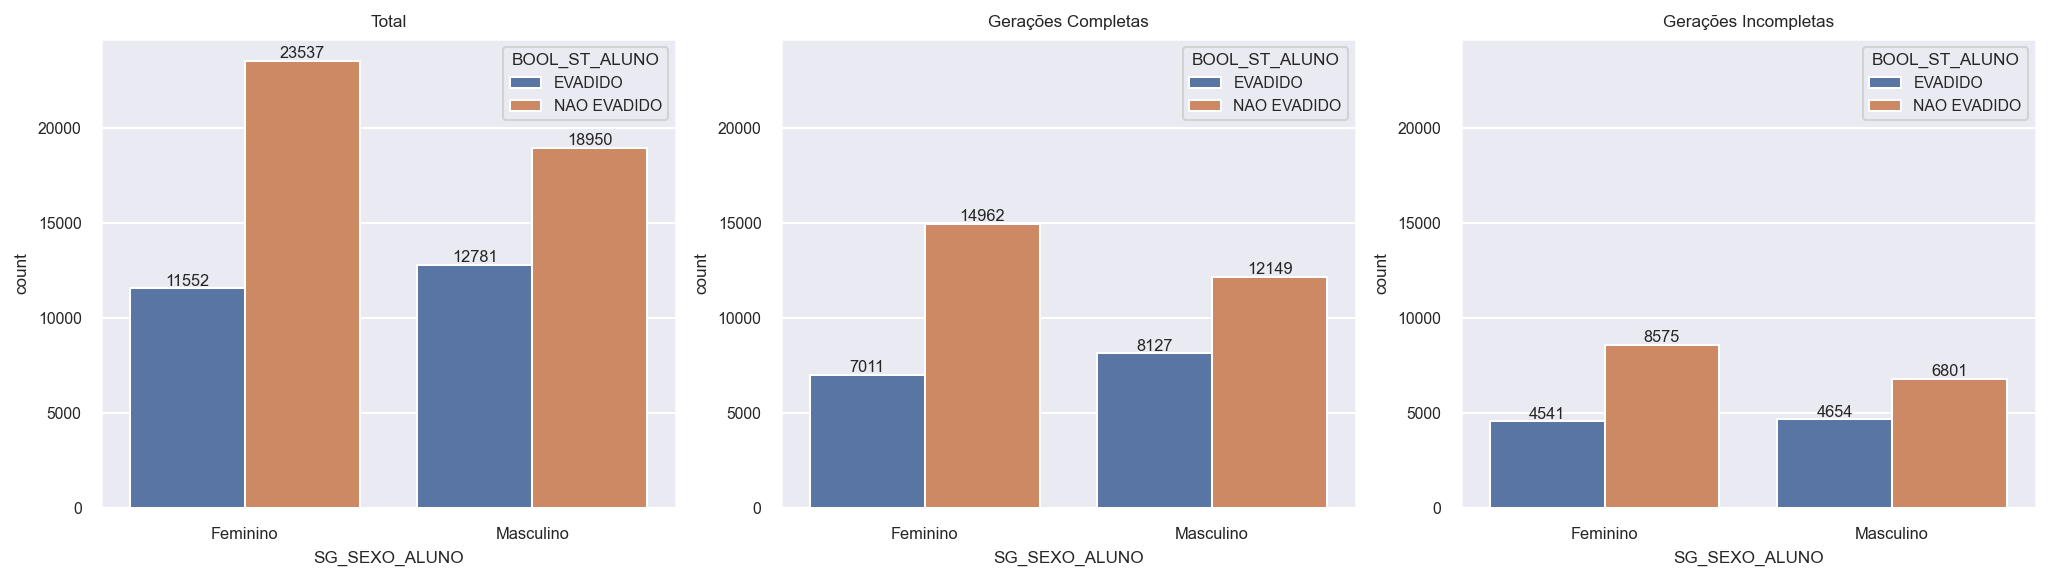

In [79]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, 'SG_SEXO_ALUNO')

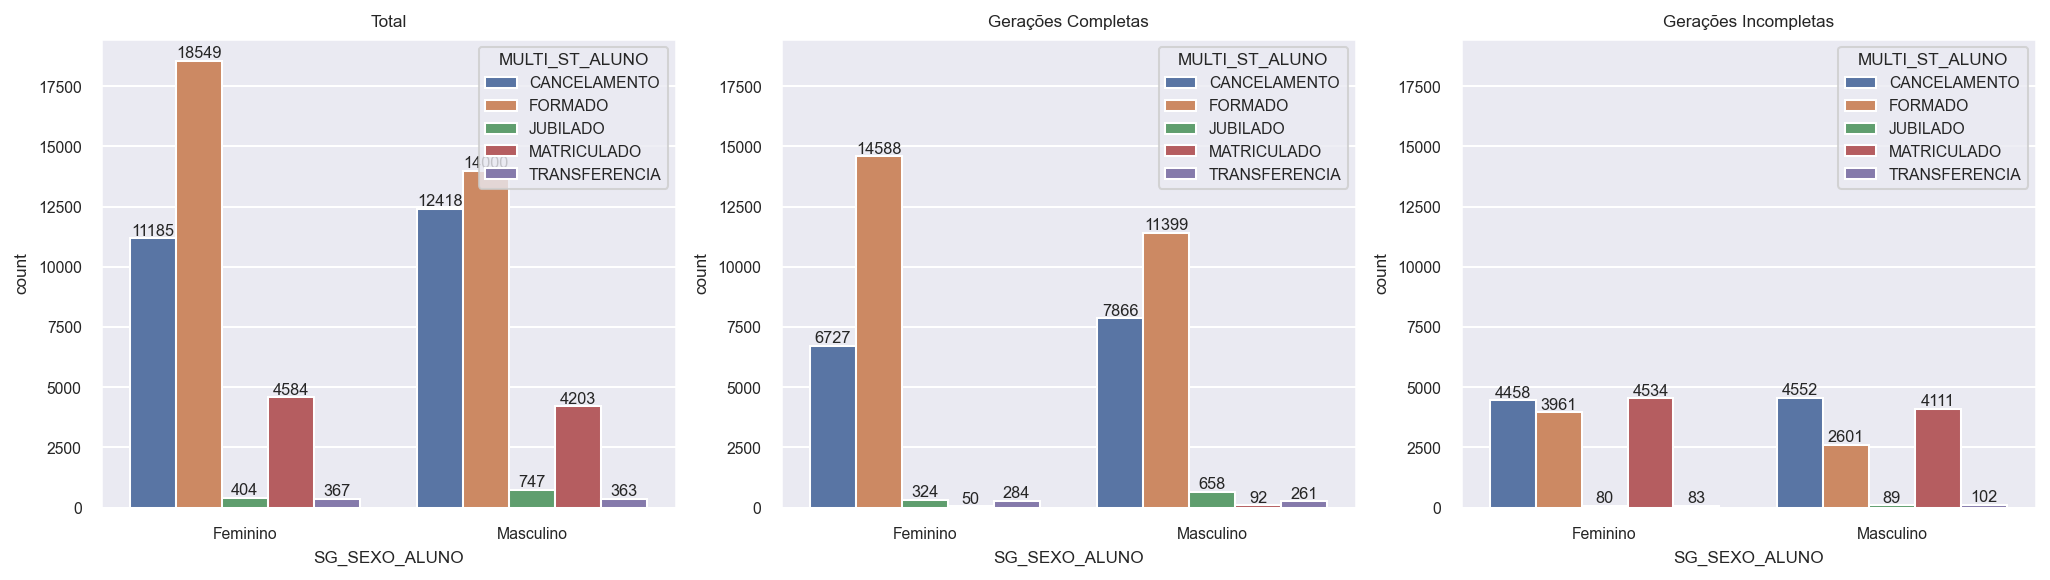

In [80]:
vis_filtro_situacao_multiclasse(df_selecionado, 'SG_SEXO_ALUNO')

In [81]:
df_selecionado.groupby('SG_SEXO_ALUNO')['BOOL_ST_ALUNO'].value_counts(normalize=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\4104119498.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('SG_SEXO_ALUNO')['BOOL_ST_ALUNO'].value_counts(normalize=True)


SG_SEXO_ALUNO  BOOL_ST_ALUNO
Feminino       NAO EVADIDO      0.670780
               EVADIDO          0.329220
Masculino      NAO EVADIDO      0.597208
               EVADIDO          0.402792
Name: proportion, dtype: float64

Homens têm uma tendência maior a evadir

### Por habilitação

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)


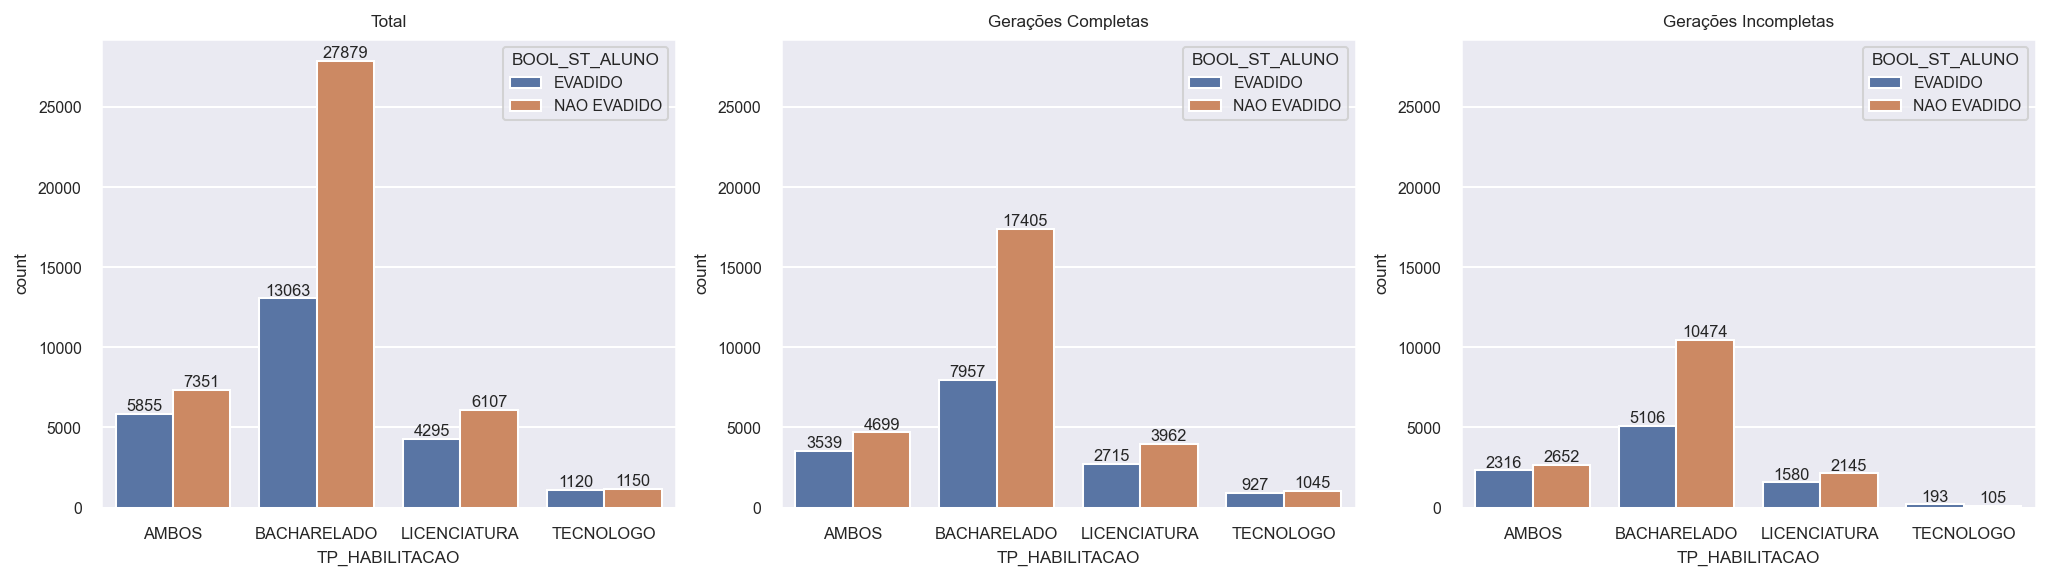

In [82]:
vis_filtro_evadidos_x_nao_evadidos(df_selecionado, 'TP_HABILITACAO')

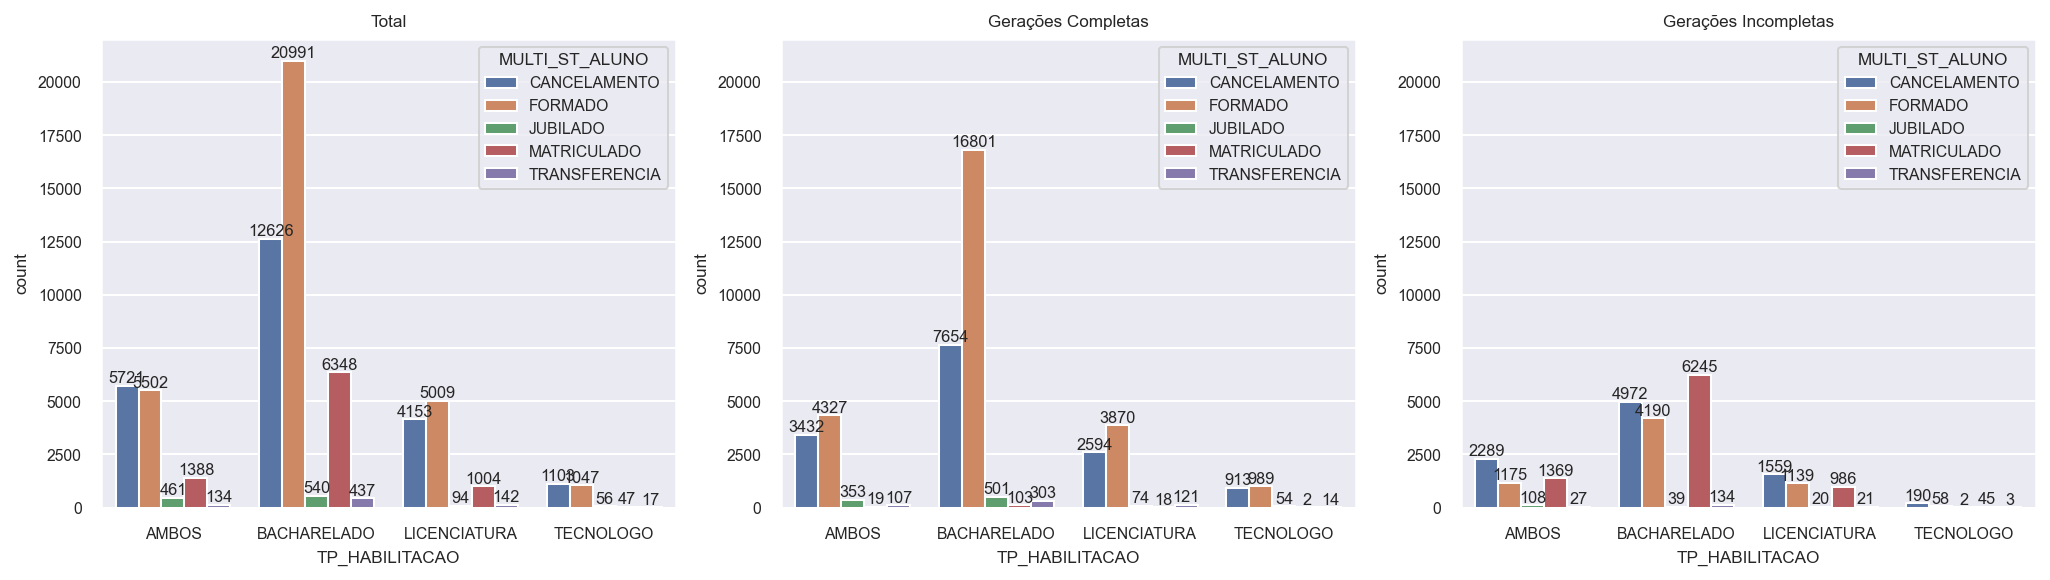

In [83]:
vis_filtro_situacao_multiclasse(df_selecionado, 'TP_HABILITACAO')

In [84]:
df_selecionado.groupby('TP_HABILITACAO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2372911324.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_selecionado.groupby('TP_HABILITACAO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_index()


TP_HABILITACAO  BOOL_ST_ALUNO
AMBOS           EVADIDO          0.443359
                NAO EVADIDO      0.556641
BACHARELADO     EVADIDO          0.319061
                NAO EVADIDO      0.680939
LICENCIATURA    EVADIDO          0.412901
                NAO EVADIDO      0.587099
TECNOLOGO       EVADIDO          0.493392
                NAO EVADIDO      0.506608
Name: proportion, dtype: float64

### Por curso

In [145]:
# df_curso = pd.read_csv('arquivos/cursos.csv')
# df_curso.columns

Index(['CD_CURSO', 'NM_CURSO', 'TP_HABILITACAO', 'SG_CENTRO', 'NM_CAMPUS',
       'MAX_ANOS'],
      dtype='object')

In [155]:
# df_selecionado[['NM_CURSO', 'SG_CENTRO', 'NM_CAMPUS']].value_counts().reset_index().to_excel('arquivos/contagem_cursos.xlsx', index=False)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

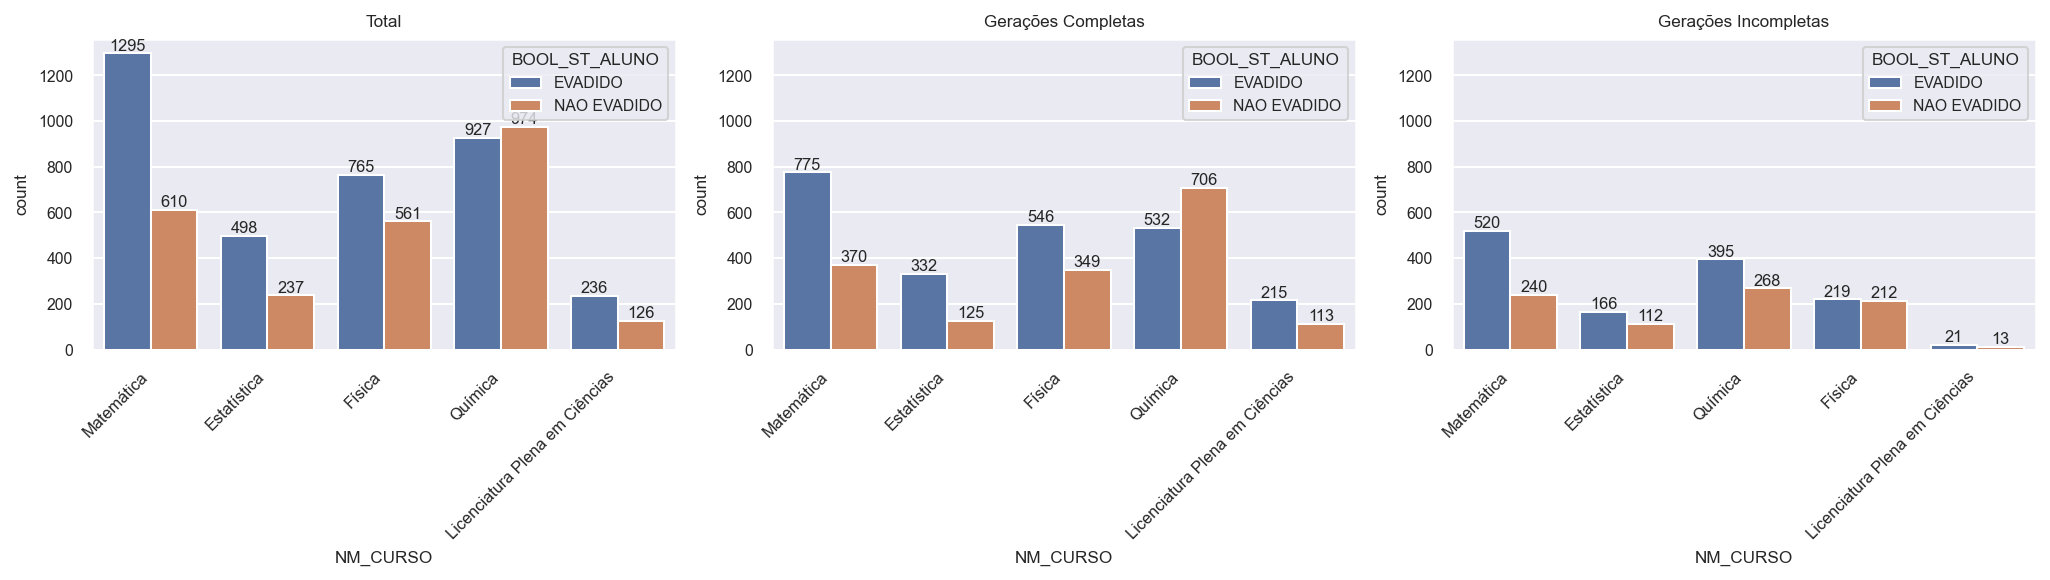

In [185]:
vis_filtro_evadidos_x_nao_evadidos(df_cce, 'NM_CURSO', overlap=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

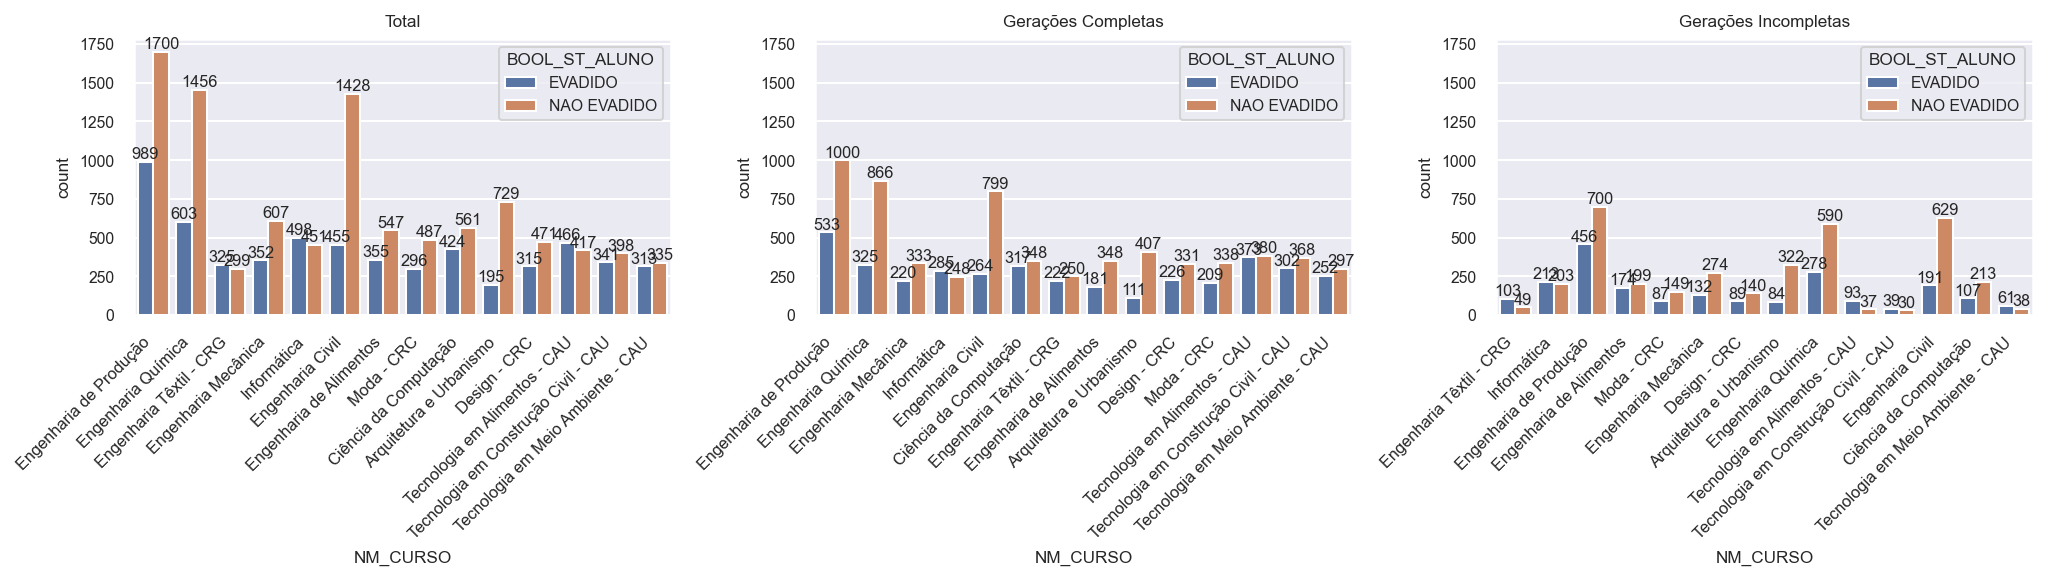

In [86]:
df_ctc = df_selecionado[df_selecionado['SG_CENTRO'] == 'CTC']
vis_filtro_evadidos_x_nao_evadidos(df_ctc, 'NM_CURSO', overlap=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

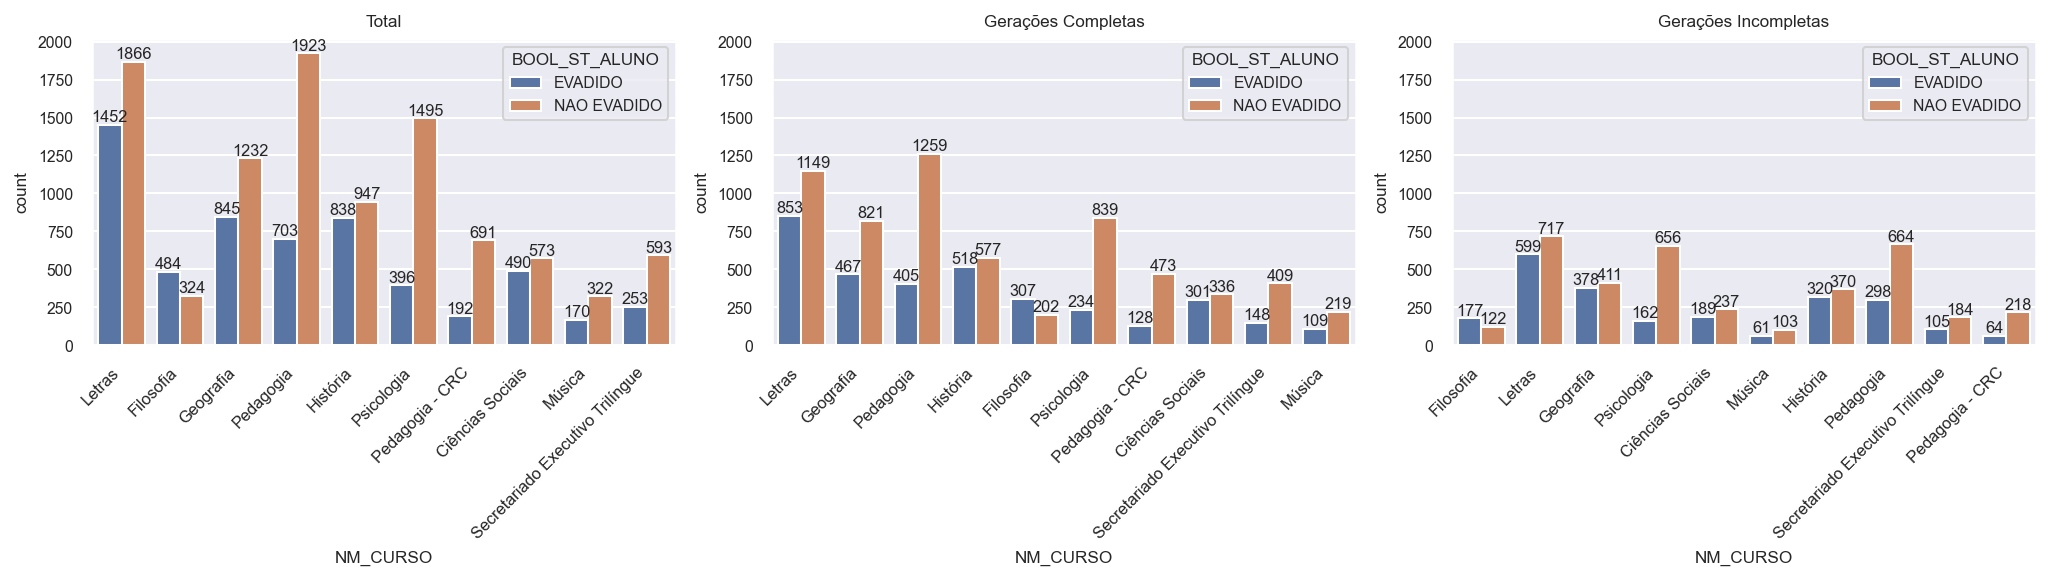

In [178]:
df_cch = df_selecionado[df_selecionado['SG_CENTRO'] == 'CCH']
vis_filtro_evadidos_x_nao_evadidos(df_cch, 'NM_CURSO', overlap=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

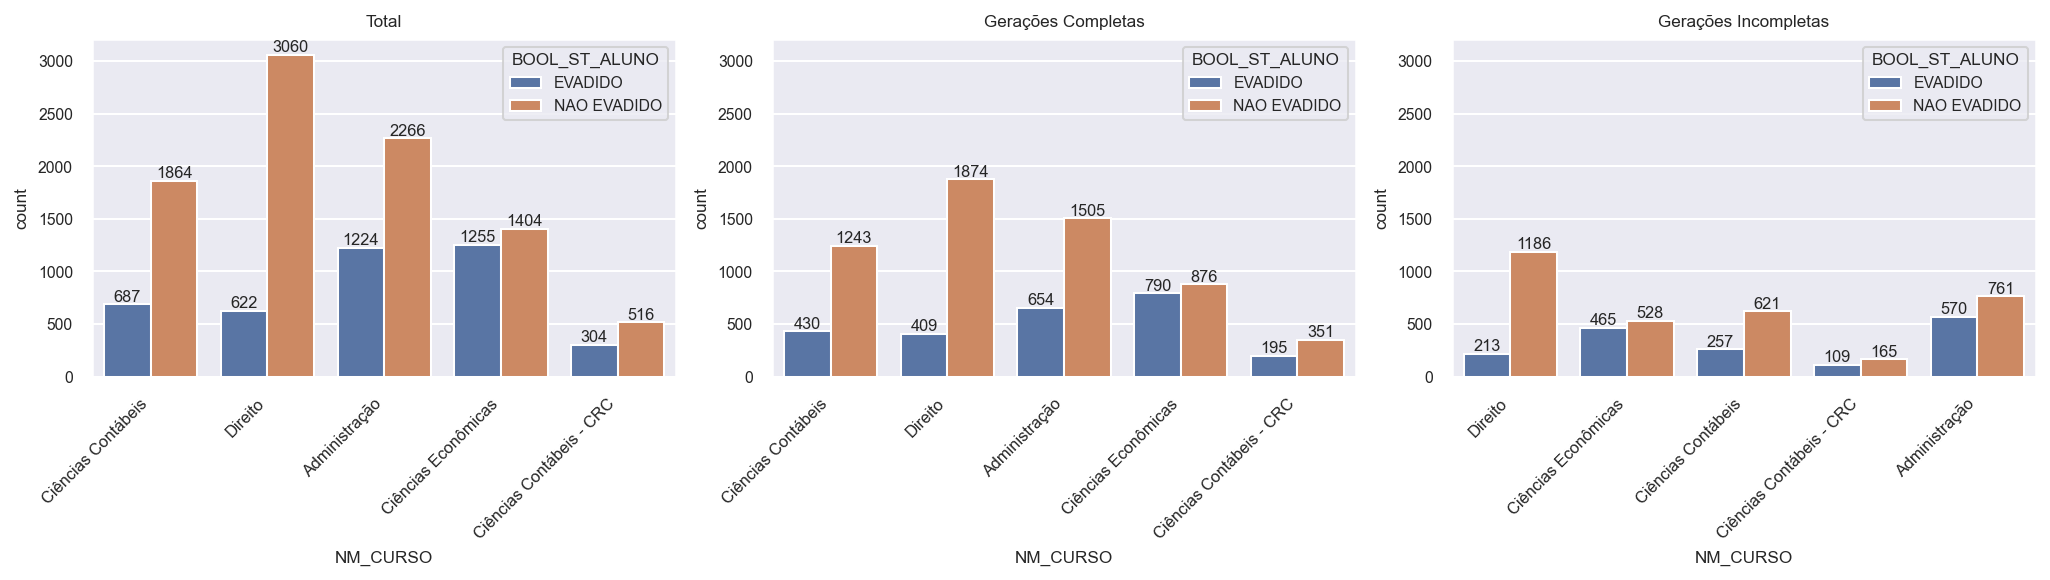

In [88]:
df_csa = df_selecionado[df_selecionado['SG_CENTRO'] == 'CSA']
vis_filtro_evadidos_x_nao_evadidos(df_csa, 'NM_CURSO', overlap=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

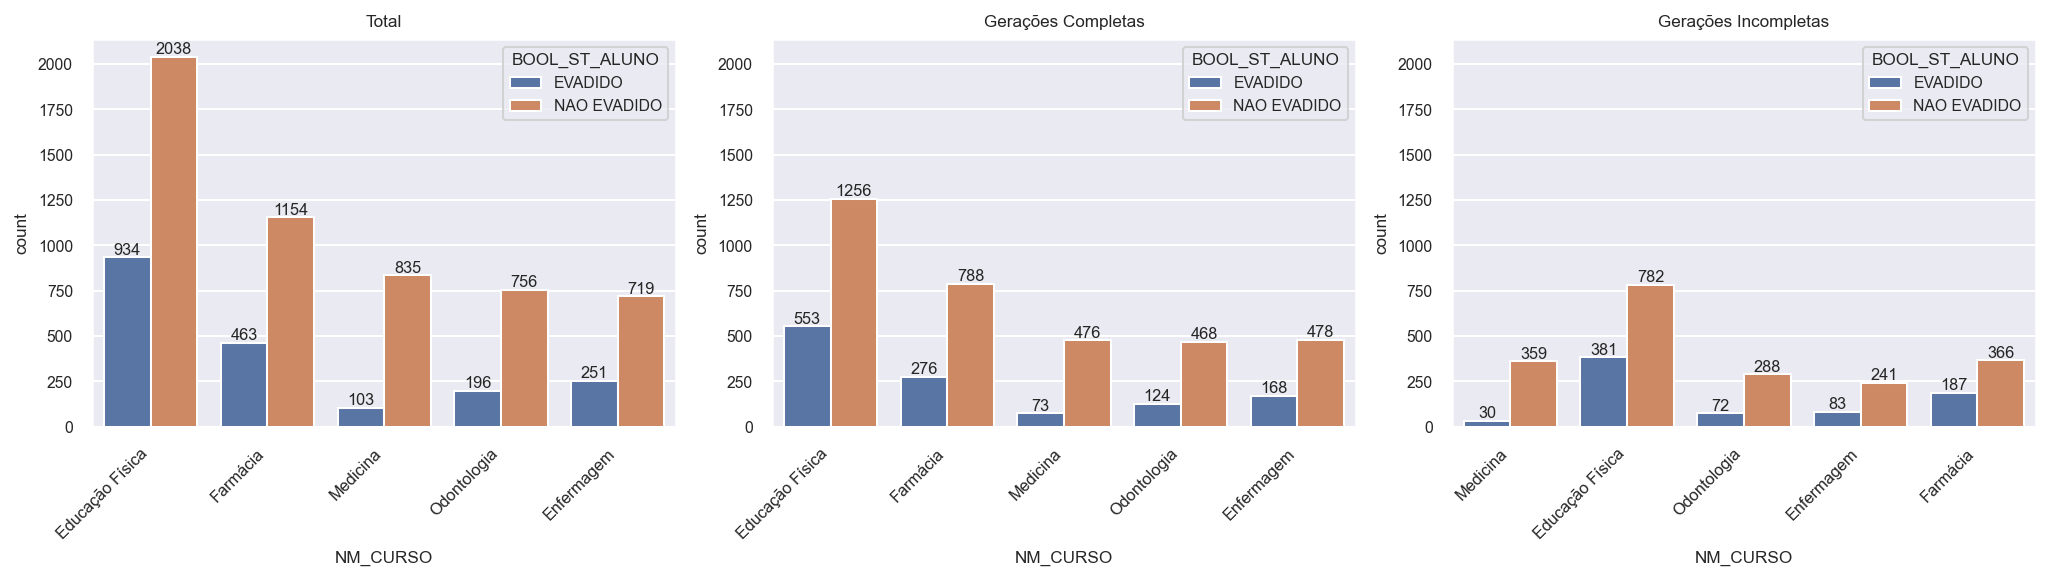

In [89]:
df_ccs = df_selecionado[df_selecionado['SG_CENTRO'] == 'CCS']
vis_filtro_evadidos_x_nao_evadidos(df_ccs, 'NM_CURSO', overlap=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

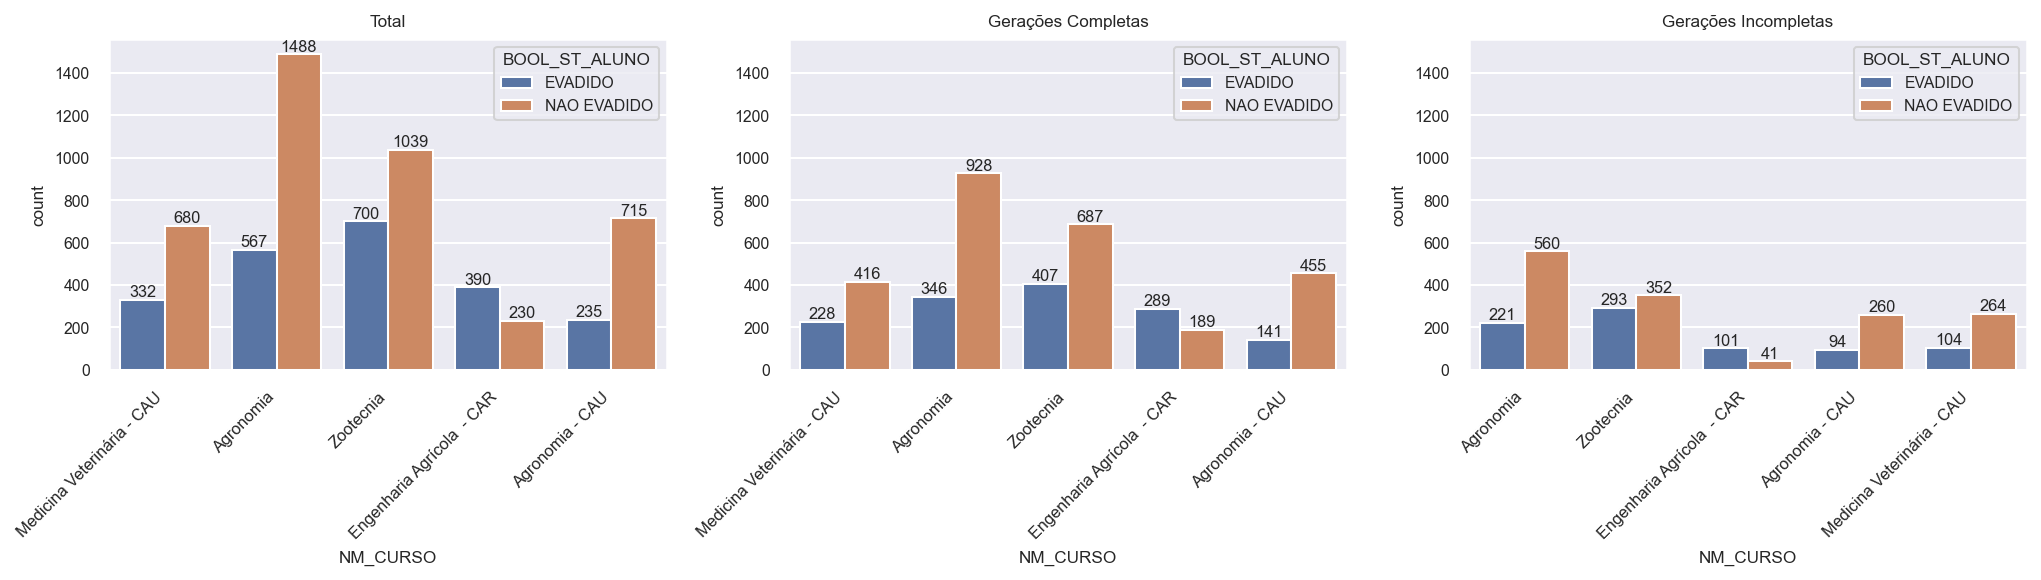

In [90]:
df_cca = df_selecionado[df_selecionado['SG_CENTRO'] == 'CCA']
vis_filtro_evadidos_x_nao_evadidos(df_cca, 'NM_CURSO', overlap=True)

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(ax[2].get_xticklabels(), fontsize=8)
C:\Users\romul\AppData\Local\Temp\ipykernel_14832\2044412201.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico

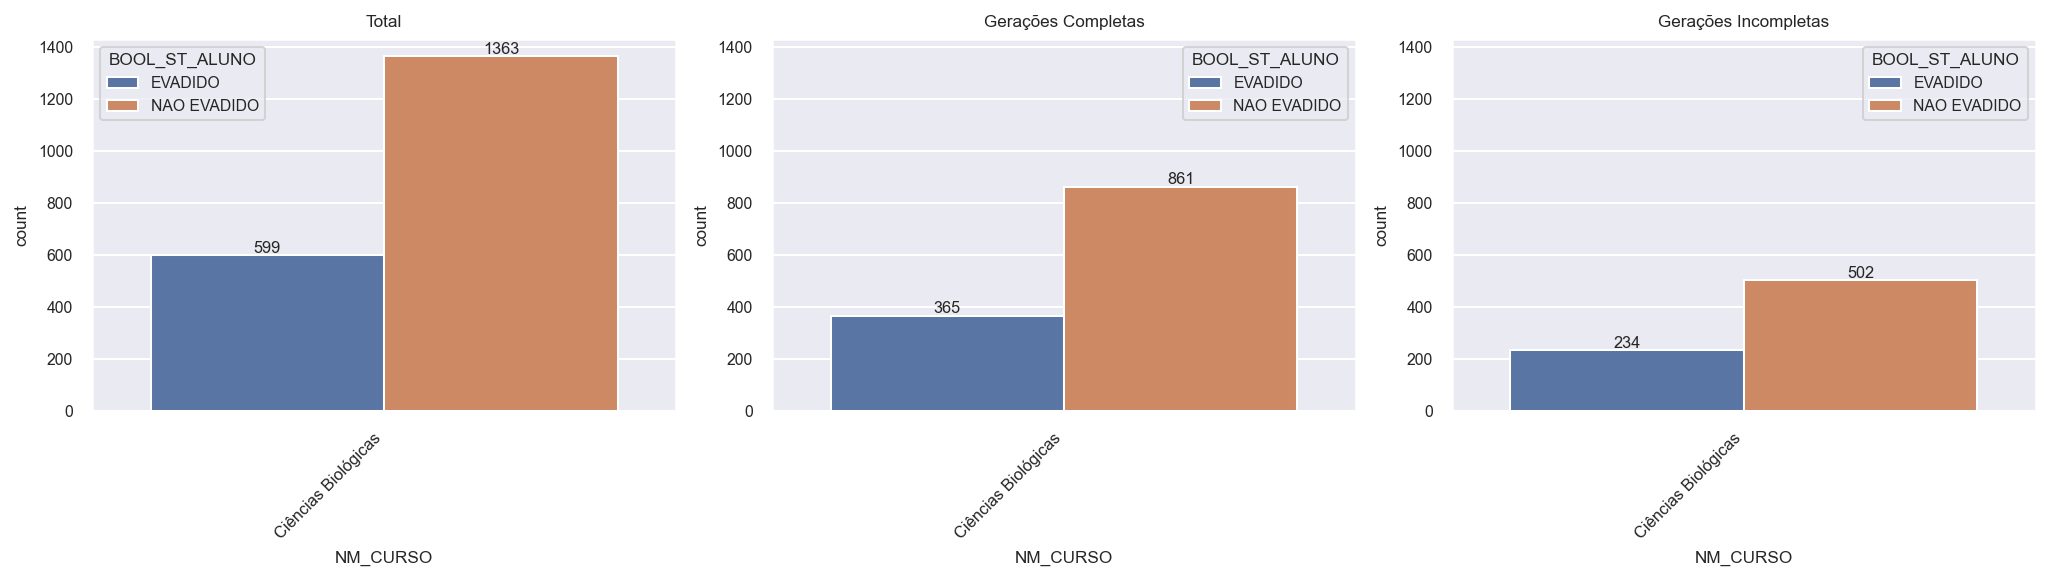

In [91]:
df_ccb = df_selecionado[df_selecionado['SG_CENTRO'] == 'CCB']
vis_filtro_evadidos_x_nao_evadidos(df_ccb, 'NM_CURSO', overlap=True)

In [167]:
df_cursos_pct = df_selecionado.groupby('NM_CURSO')['BOOL_ST_ALUNO'].value_counts(normalize=True).reset_index().rename(columns={'proportion': 'Proporcao'})

In [159]:
df_cursos_pct['Proporcao'] = df_cursos_pct['Proporcao'] * 100
df_cursos_pct['Proporcao'] = df_cursos_pct.apply(lambda x: str(x['Proporcao'])[:4]+'%', axis=1)

In [93]:
df_cursos_pct_2 = df_cursos_pct.pivot_table(index='NM_CURSO', columns='BOOL_ST_ALUNO', values='Proporcao').reset_index()

C:\Users\romul\AppData\Local\Temp\ipykernel_14832\3875220088.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha='right')


[Text(0, 0, 'Administração'),
 Text(1, 0, 'Agronomia'),
 Text(2, 0, 'Agronomia - CAU'),
 Text(3, 0, 'Arquitetura e Urbanismo'),
 Text(4, 0, 'Ciência da Computação'),
 Text(5, 0, 'Ciências Biológicas'),
 Text(6, 0, 'Ciências Contábeis'),
 Text(7, 0, 'Ciências Contábeis - CRC'),
 Text(8, 0, 'Ciências Econômicas'),
 Text(9, 0, 'Ciências Sociais'),
 Text(10, 0, 'Design - CRC'),
 Text(11, 0, 'Direito'),
 Text(12, 0, 'Educação Física'),
 Text(13, 0, 'Enfermagem'),
 Text(14, 0, 'Engenharia Agrícola  - CAR'),
 Text(15, 0, 'Engenharia Civil'),
 Text(16, 0, 'Engenharia Mecânica'),
 Text(17, 0, 'Engenharia Química'),
 Text(18, 0, 'Engenharia Têxtil - CRG'),
 Text(19, 0, 'Engenharia de Alimentos'),
 Text(20, 0, 'Engenharia de Produção'),
 Text(21, 0, 'Estatística'),
 Text(22, 0, 'Farmácia'),
 Text(23, 0, 'Filosofia'),
 Text(24, 0, 'Física'),
 Text(25, 0, 'Geografia'),
 Text(26, 0, 'História'),
 Text(27, 0, 'Informática'),
 Text(28, 0, 'Letras'),
 Text(29, 0, 'Licenciatura Plena em Ciências'),
 Tex

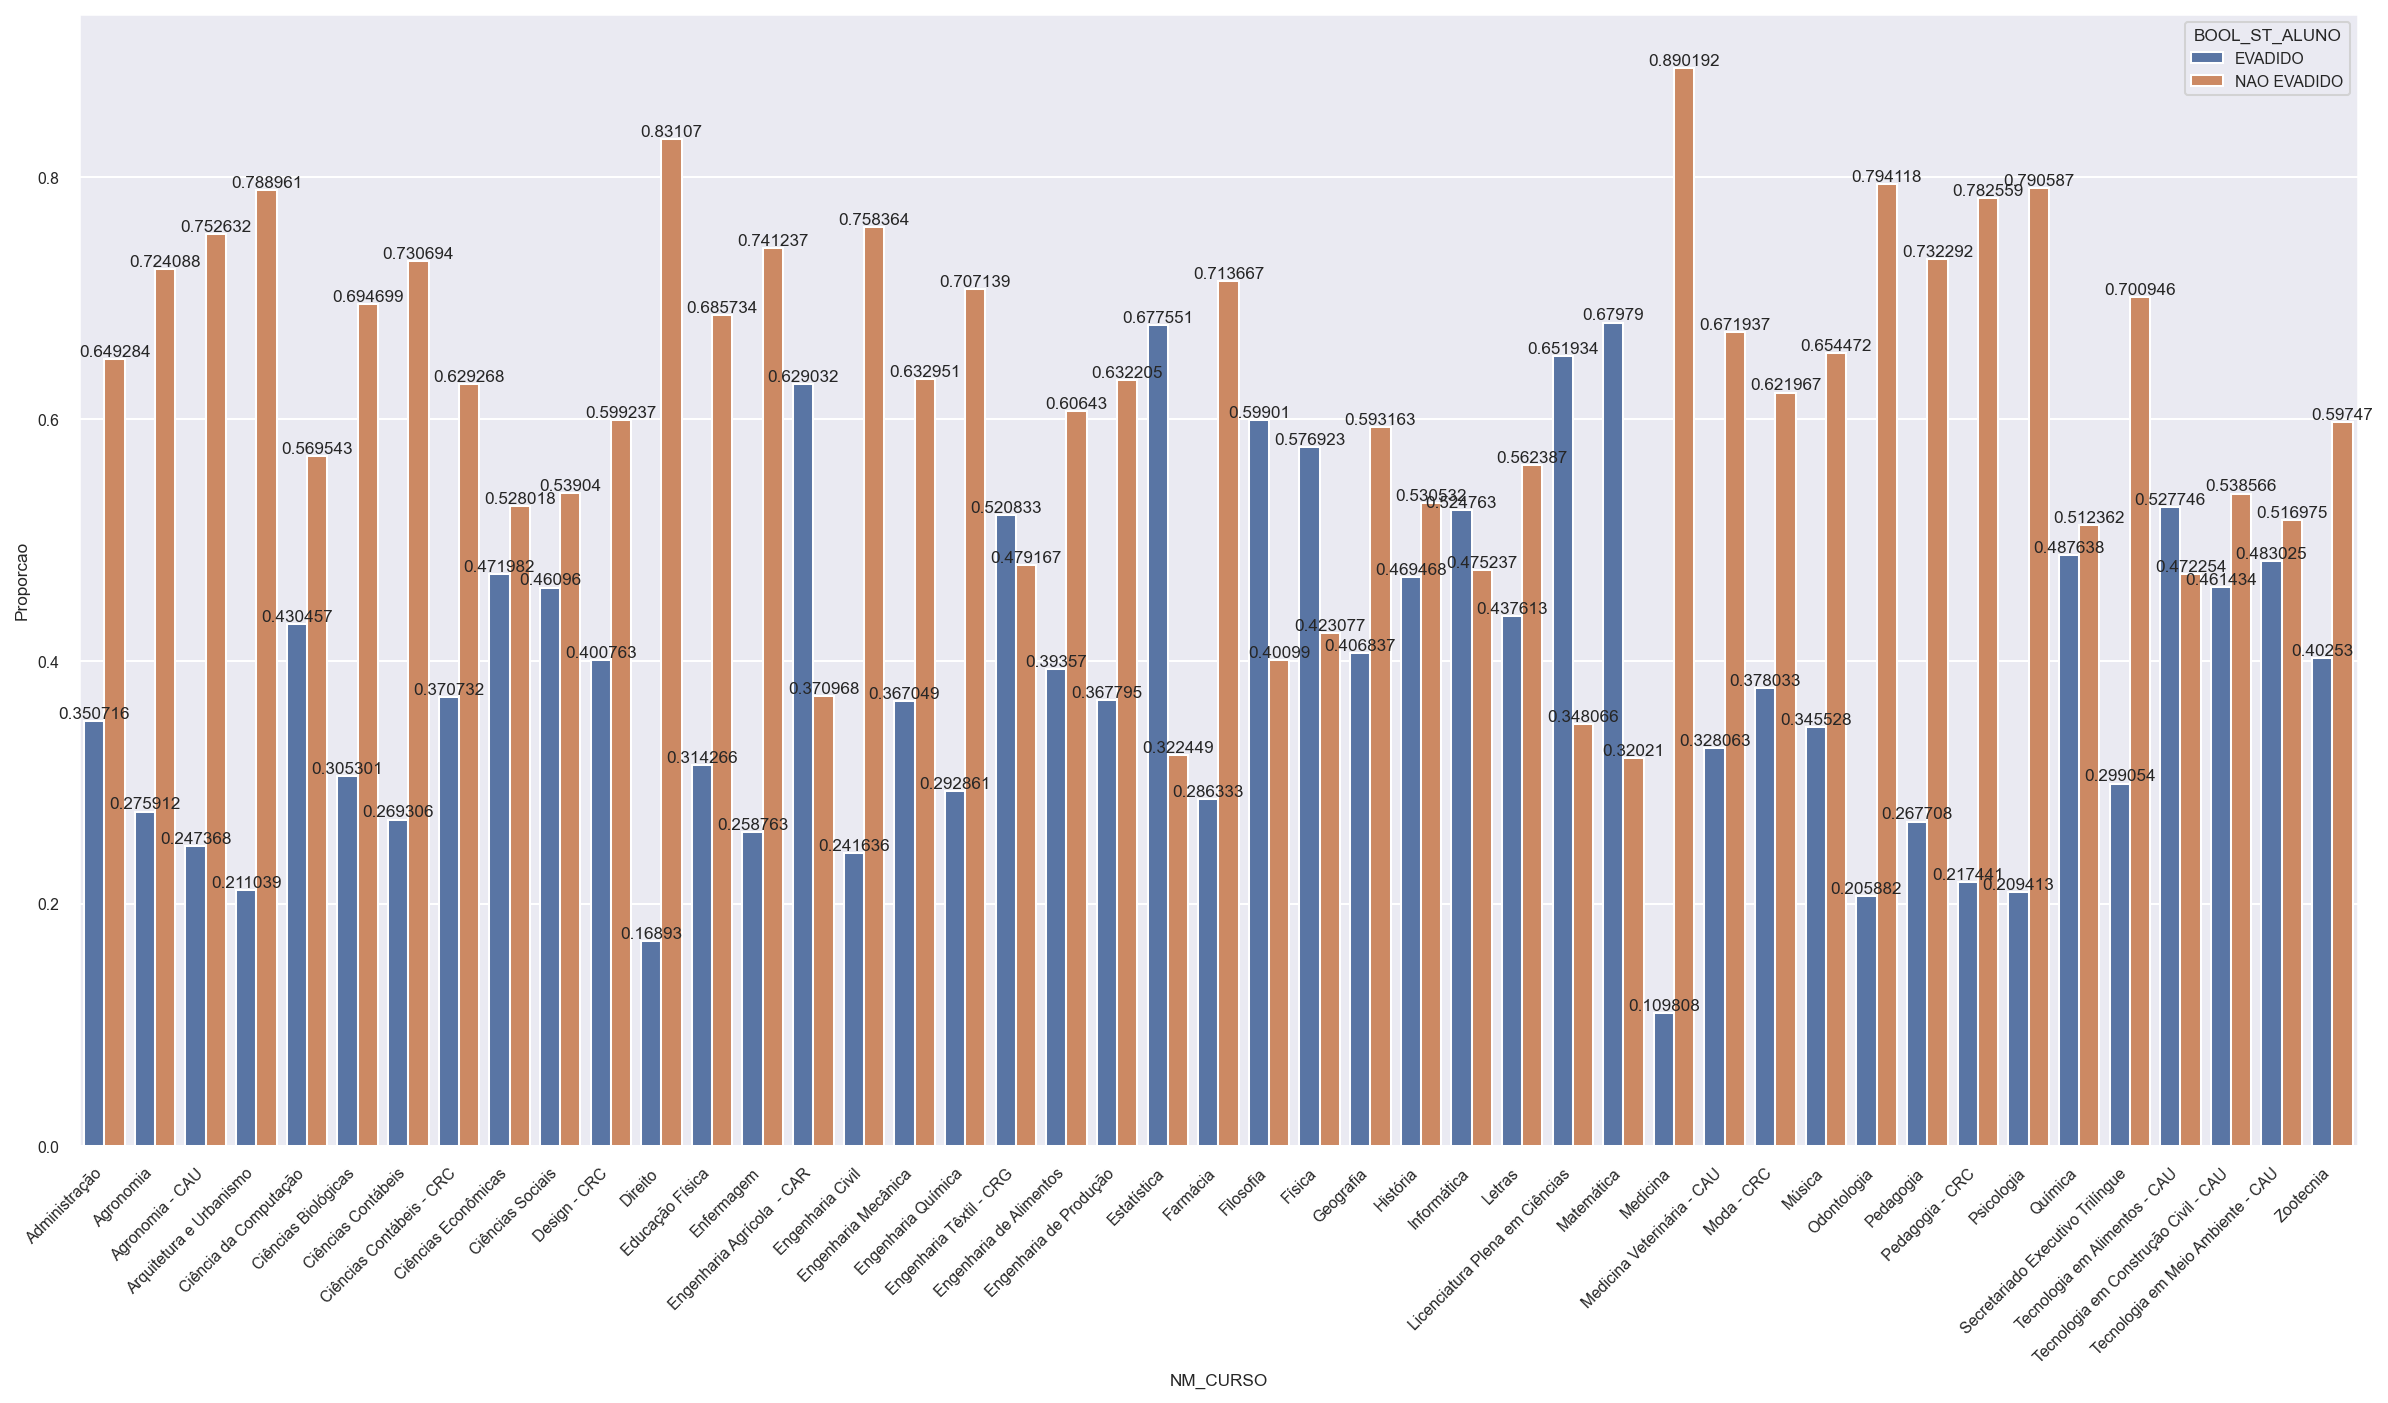

In [168]:
df_cursos_pct = df_selecionado.groupby('NM_CURSO')['BOOL_ST_ALUNO'].value_counts(normalize=True).reset_index().rename(columns={'proportion': 'Proporcao'})

plt.figure(figsize=(20, 10))
grafico = sns.barplot(data=df_cursos_pct, x='NM_CURSO', y='Proporcao', hue='BOOL_ST_ALUNO')
for container in grafico.containers:
    grafico.bar_label(container)
grafico.set_xticklabels(grafico.get_xticklabels(), rotation=45, ha='right')

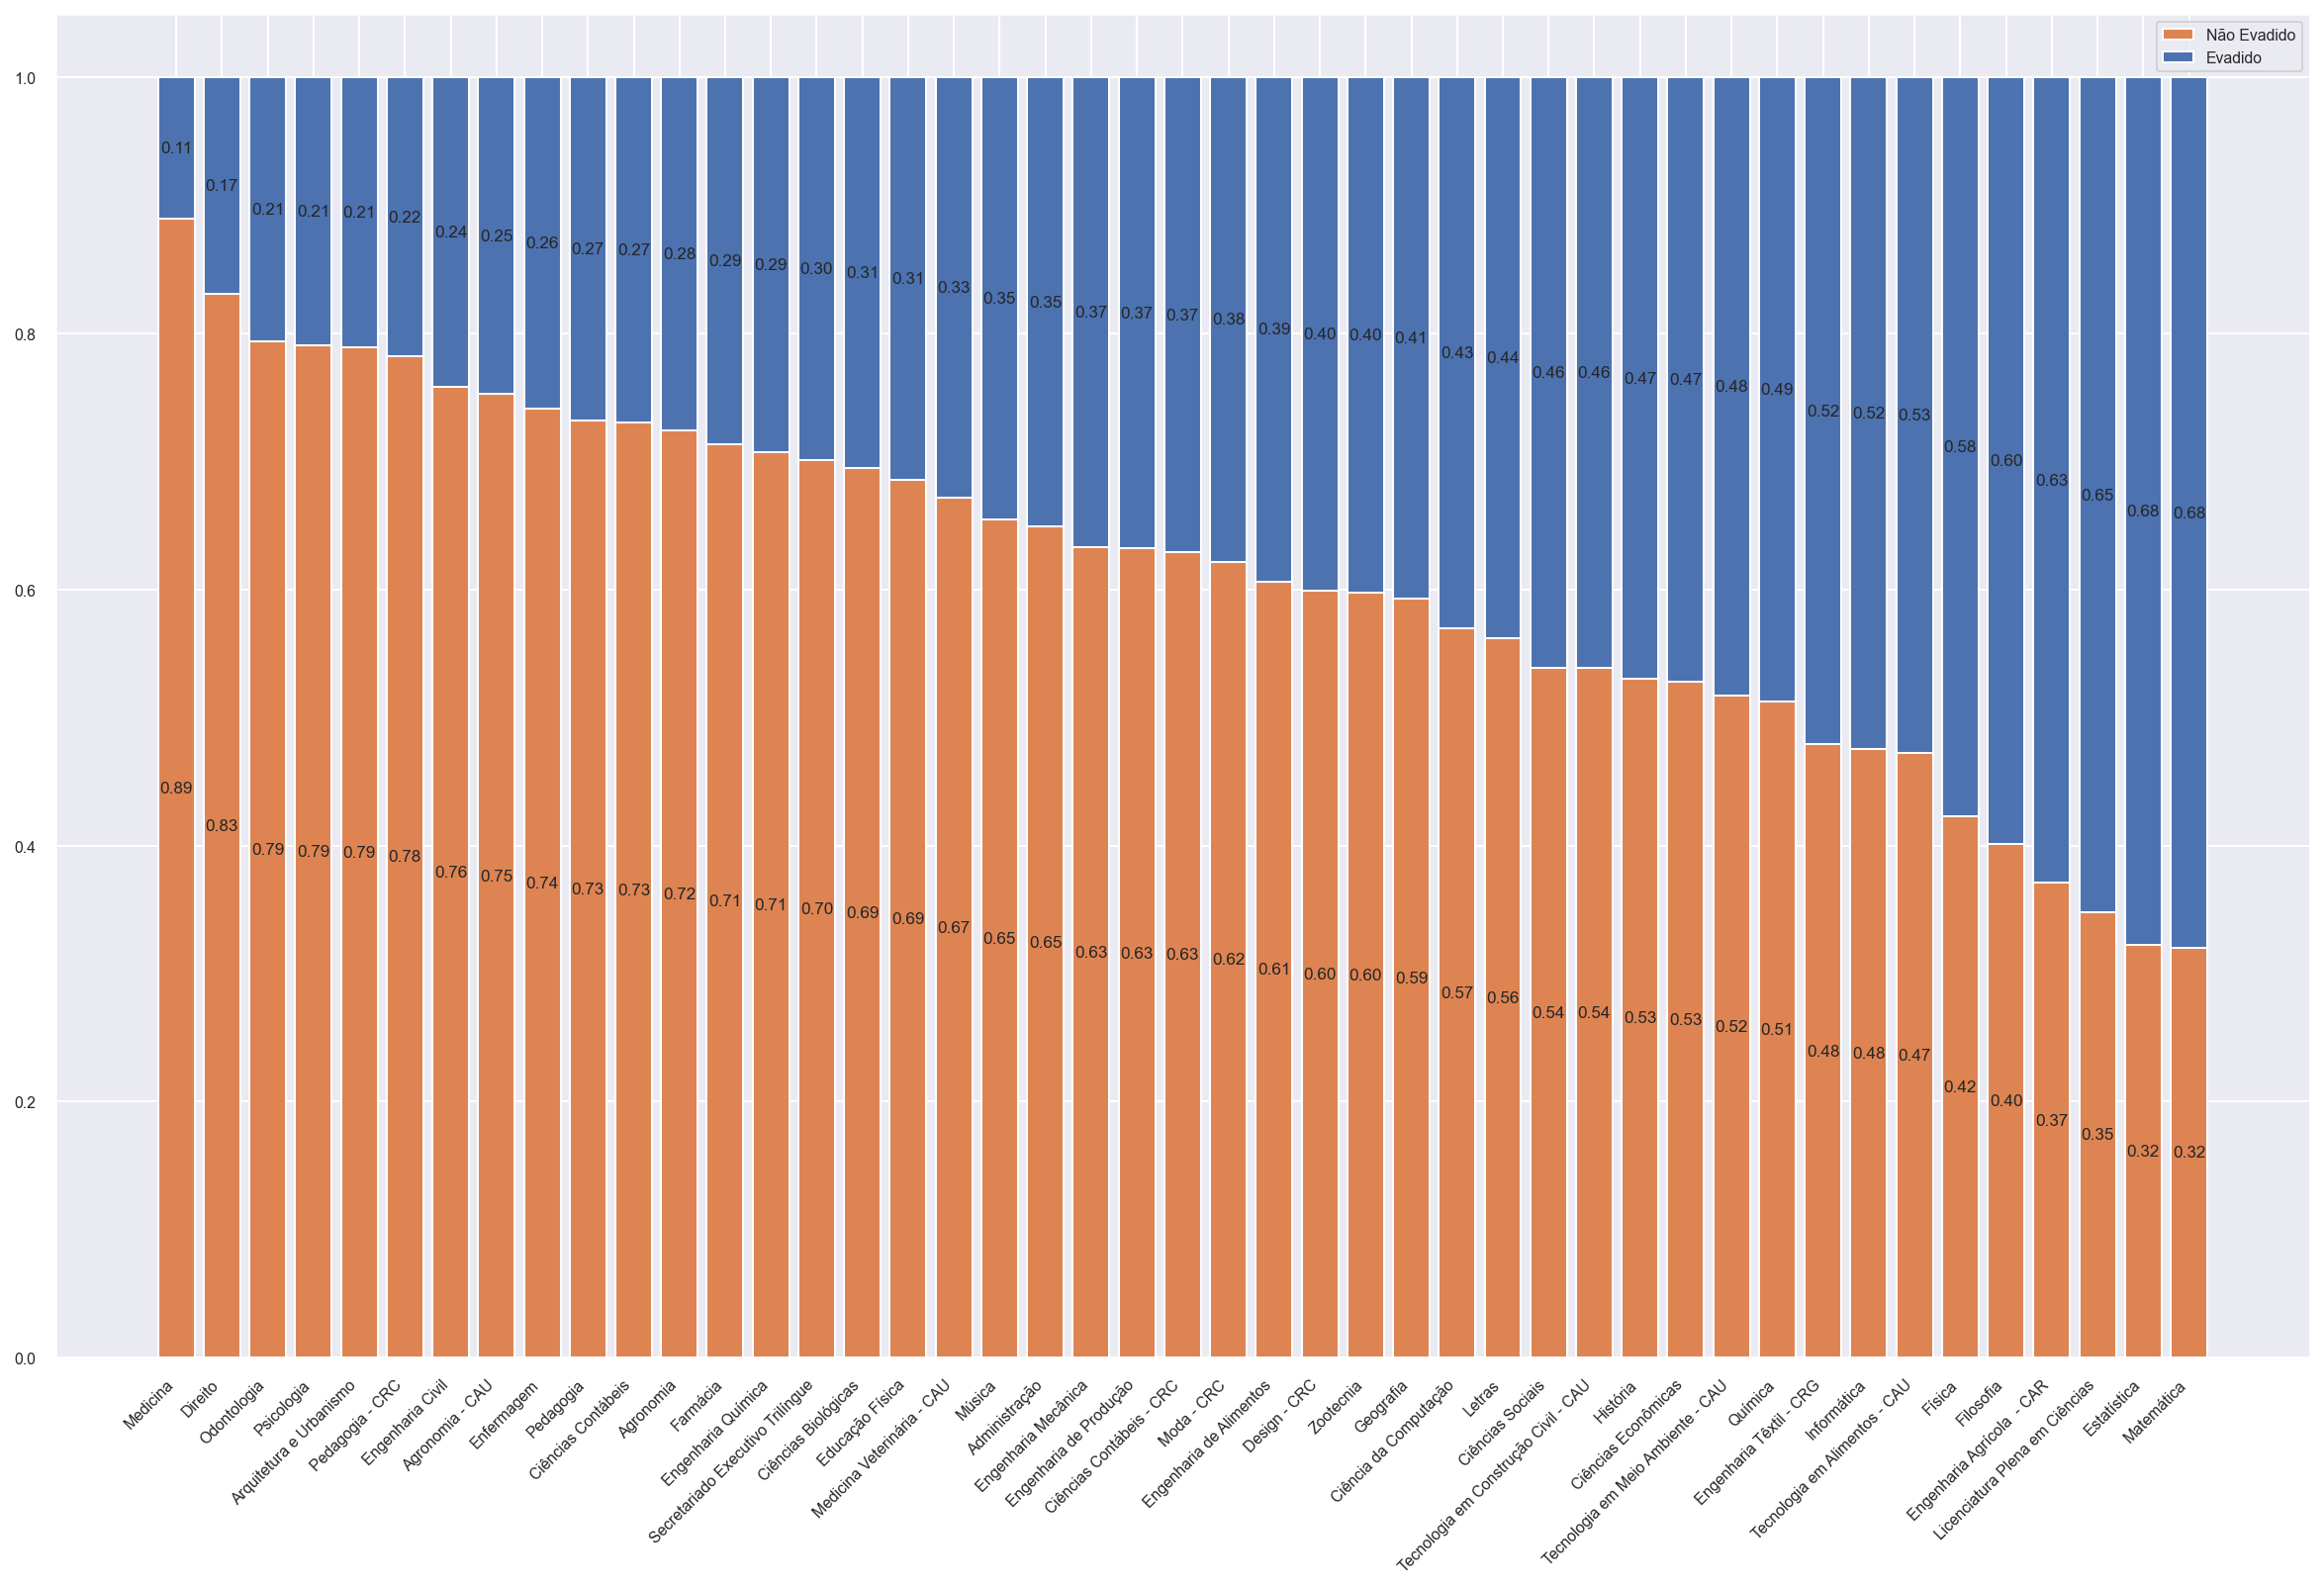

In [184]:
df_cursos_pct = df_selecionado.groupby('NM_CURSO')['BOOL_ST_ALUNO'].value_counts(normalize=True).reset_index().rename(columns={'proportion': 'Proporcao'})
df_cursos_pct_2 = df_cursos_pct.pivot_table(index='NM_CURSO', columns='BOOL_ST_ALUNO', values='Proporcao').reset_index()

# Ordenar o DataFrame com base nos valores de 'NAO EVADIDO' em ordem decrescente
df_cursos_pct_2 = df_cursos_pct_2.sort_values(by='NAO EVADIDO', ascending=False)

# Plotar o gráfico com os dados já ordenados
plt.figure(figsize=(20, 12))

bar1 = plt.bar(df_cursos_pct_2['NM_CURSO'], df_cursos_pct_2['NAO EVADIDO'], 
               label='Não Evadido', color='#dd8452')

bar2 = plt.bar(df_cursos_pct_2['NM_CURSO'], df_cursos_pct_2['EVADIDO'], 
               bottom=df_cursos_pct_2['NAO EVADIDO'], label='Evadido', color='#4c72b0')

# Adicionar os valores nas barras
for rect in bar1 + bar2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, 
             rect.get_y() + height / 2.0, f'{height:.2f}', 
             ha='center', va='center')

# Ajustar as labels no eixo X
plt.xticks(rotation=45, ha='right')

# Exibir a legenda e o gráfico
plt.legend()
plt.show()


In [96]:
df_selecionado.groupby('NM_CURSO')['BOOL_ST_ALUNO'].value_counts(normalize=True)

NM_CURSO                              BOOL_ST_ALUNO
Administração                         NAO EVADIDO      0.649284
                                      EVADIDO          0.350716
Agronomia                             NAO EVADIDO      0.724088
                                      EVADIDO          0.275912
Agronomia - CAU                       NAO EVADIDO      0.752632
                                                         ...   
Tecnologia em Construção Civil - CAU  EVADIDO          0.461434
Tecnologia em Meio Ambiente - CAU     NAO EVADIDO      0.516975
                                      EVADIDO          0.483025
Zootecnia                             NAO EVADIDO      0.597470
                                      EVADIDO          0.402530
Name: proportion, Length: 90, dtype: float64

In [97]:
df_selecionado.groupby('NM_CURSO')['BOOL_ST_ALUNO'].value_counts(normalize=True).sort_values()

NM_CURSO                 BOOL_ST_ALUNO
Medicina                 EVADIDO          0.109808
Direito                  EVADIDO          0.168930
Odontologia              EVADIDO          0.205882
Psicologia               EVADIDO          0.209413
Arquitetura e Urbanismo  EVADIDO          0.211039
                                            ...   
                         NAO EVADIDO      0.788961
Psicologia               NAO EVADIDO      0.790587
Odontologia              NAO EVADIDO      0.794118
Direito                  NAO EVADIDO      0.831070
Medicina                 NAO EVADIDO      0.890192
Name: proportion, Length: 90, dtype: float64

### Mapa de calor

.factorize()

# Colunas

In [98]:
df_selecionado.columns

Index(['CD_ALUNO', 'CD_CURSO', 'CD_TURNO', 'DH_MATRICULA', 'DH_SITUACAO',
       'DT_ANO_INGRES', 'DT_NASC_ALUNO', 'LT_ESTADO_CIVIL', 'LT_RACA',
       'F_NU_SEMESTRE2_VEST', 'TP_INGRES_CURSO', 'SG_SEXO_ALUNO',
       'F_NM_PAIS_NASC', 'F_SG_UF_NASC_ALUNO', 'F_SG_UF_FERIAS',
       'BOOL_TRANCADO', 'BOOL_ST_ALUNO', 'MULTI_ST_ALUNO', 'BOOL_DEFIC_INEP',
       'F_TP_ESCOLA', 'F_TP_OPCAO_COTAS', 'BOOL_COTAS', 'IDADE_MATRICULA',
       'ANO_NASCIMENTO', 'MESES_ATE_ULTIMA_SITUACAO', 'LOCAL_FERIAS',
       'LOCAL_NASC', 'NM_CURSO', 'TP_HABILITACAO', 'SG_CENTRO', 'NM_CAMPUS',
       'MAX_ANOS', 'GERACAO_COMPLETA', 'NUMERO_GERACAO', 'BOOL_SEDE',
       'FORMA_INGRESSO'],
      dtype='object')